#AVISO

Todo aca es practicamente igual que al otro collab solo lo hize para no perder el historial de las epocas, en este fue donde se utilizo la cpu con alta capacidad de ram

#Busqueda de Hiperparametros

##Mlflow

In [ ]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.5 MB/s eta 0:00:00


##Optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.0 MB/s eta 0:00:00


In [ ]:
!pip install mlflow --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 15.0 MB/s eta 0:00:00


In [ ]:
pip install pyarrow==14.0.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 49.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0


In [ ]:
REPO_NAME= "pp_miguel"
REPO_OWNER= "chichastark14"
USER_NAME = "chichastark14"

import mlflow
import os
from getpass import getpass

os.environ['MLFLOW_TRACKING_USERNAME'] = USER_NAME
os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('Enter your DAGsHub access token or password: ')

mlflow.set_tracking_uri(f'https://dagshub.com/{REPO_OWNER}/{REPO_NAME}.mlflow')

Enter your DAGsHub access token or password: ··········


##Preprocesamiento

###Cargar set de datos

Este es el conjunto de datos utilizado.

Contiene alrededor de 28 000 imágenes de animales de calidad media pertenecientes a 10 categorías: perro, gato, caballo, araña, mariposa, pollo, oveja, vaca, ardilla y elefante.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

100%|██████████| 586M/586M [00:03<00:00, 183MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


###visualizar set de datos

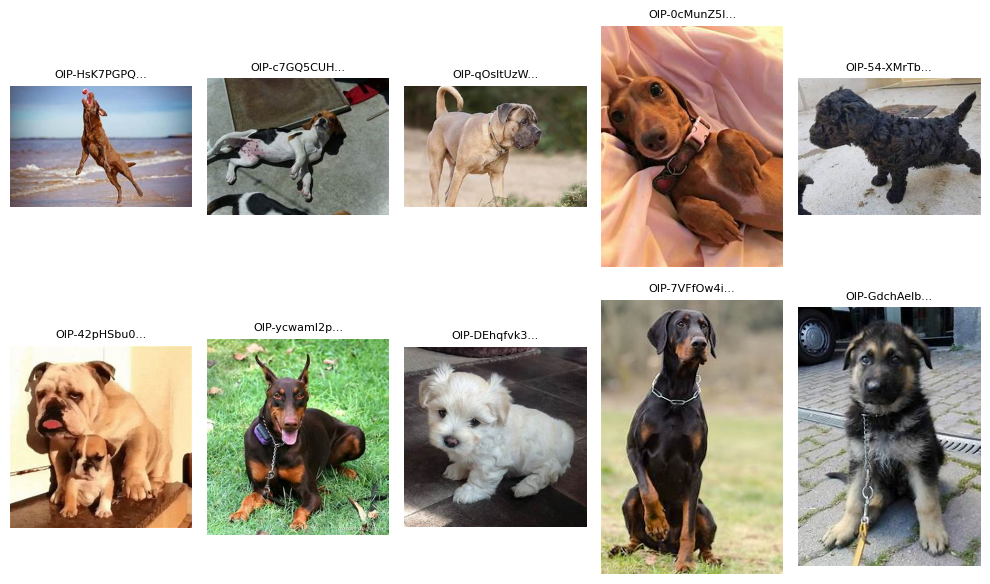

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Ruta al dataset descargado
dataset_path = os.path.join(path, "raw-img")

# Seleccionar la categoría
category = "cane"
category_path = os.path.join(dataset_path, category)

# Verificar si la categoría existe
if os.path.exists(category_path):
    # Lista 10 imágenes
    images = os.listdir(category_path)[:10]

    # Crear una figura para mostrar las imágenes
    fig, axes = plt.subplots(2, 5, figsize=(10, 6))  # 5 columnas, 2 filas
    axes = axes.flatten()

    for ax, img_name in zip(axes, images):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)

        # Mostrar la imagen
        ax.imshow(img)
        ax.axis("off")
        # Truncar nombres largos
        truncated_title = img_name if len(img_name) <= 15 else img_name[:12] + "..."
        ax.set_title(truncated_title, fontsize=8)

    plt.tight_layout()
    plt.show()
else:
    print(f"La categoría '{category}' no se encontró en el dataset.")


In [ ]:
import os

# Ruta al dataset descargado
dataset_path = os.path.join(path, "raw-img")

# Verificar si la carpeta existe
if os.path.exists(dataset_path):
    # Listar los elementos dentro de la carpeta
    elements = os.listdir(dataset_path)
    print("Elementos en la carpeta 'raw-img':")
    for element in elements:
        print(element)
else:
    print(f"La carpeta '{dataset_path}' no existe.")


Elementos en la carpeta 'raw-img':
mucca
ragno
scoiattolo
cane
elefante
cavallo
pecora
farfalla
gatto
gallina


###Renombramos las etiquetas de italiano a Español

In [ ]:
import os

# Mapa de las categorías de italiano a español
category_translation = {
    'scoiattolo': 'ardilla',
    'mucca': 'vaca',
    'gatto': 'gato',
    'gallina': 'gallina',
    'pecora': 'oveja',
    'cavallo': 'caballo',
    'cane': 'perro',
    'ragno': 'araña',
    'elefante': 'elefante',
    'farfalla': 'mariposa'
}

# Ruta al dataset
dataset_path = os.path.join(path, "raw-img")

# Verificar si la carpeta existe
if os.path.exists(dataset_path):
    # Listar las carpetas dentro de 'raw-img'
    elements = os.listdir(dataset_path)

    # Renombrar las carpetas
    for element in elements:
        category_path = os.path.join(dataset_path, element)
        if os.path.isdir(category_path) and element in category_translation:
            new_name = category_translation[element]
            new_path = os.path.join(dataset_path, new_name)
            os.rename(category_path, new_path)
            print(f"Carpeta '{element}' renombrada a '{new_name}'")
else:
    print(f"La carpeta '{dataset_path}' no existe.")


Carpeta 'mucca' renombrada a 'vaca'
Carpeta 'ragno' renombrada a 'araña'
Carpeta 'scoiattolo' renombrada a 'ardilla'
Carpeta 'cane' renombrada a 'perro'
Carpeta 'elefante' renombrada a 'elefante'
Carpeta 'cavallo' renombrada a 'caballo'
Carpeta 'pecora' renombrada a 'oveja'
Carpeta 'farfalla' renombrada a 'mariposa'
Carpeta 'gatto' renombrada a 'gato'
Carpeta 'gallina' renombrada a 'gallina'


###Separar set de datos

%70 de datos en entramiento

%15 de datos en validación

%15 de datos en prueba

In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf

# Definir el tamaño deseado para las imágenes
image_size = (64, 64)

# Estructurar los datos
data = []
categories = os.listdir(dataset_path)

# Crear un mapeo de etiquetas a números
label_mapping = {category: idx for idx, category in enumerate(categories)}

for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for img_file in os.listdir(category_path):
            img_path = os.path.join(category_path, img_file)
            try:
                img = Image.open(img_path).convert("RGB")
                img_resized = img.resize(image_size)
                img_array = np.array(img_resized)
                data.append({
                    'image': img_array,
                    'label': label_mapping[category]
                })
            except Exception as e:
                print(f"Error al procesar la imagen {img_path}: {e}")

# Convertir los datos en un TensorFlow Dataset
def generator():
    for item in data:
        yield item['image'], item['label']

output_signature = (
    tf.TensorSpec(shape=(64, 64, 3), dtype=tf.uint8),
    tf.TensorSpec(shape=(), dtype=tf.int64)
)

dataset = tf.data.Dataset.from_generator(generator, output_signature=output_signature)

# Mezclar y dividir el dataset
dataset = dataset.shuffle(len(data))

train_size = int(0.7 * len(data))
val_size = int(0.15 * len(data))

train_dataset = dataset.take(train_size)
test_val_dataset = dataset.skip(train_size)
val_dataset = test_val_dataset.take(val_size)
test_dataset = test_val_dataset.skip(val_size)

# Preprocesamiento (normalización y one-hot encoding)
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalizar
    label = tf.one_hot(label, depth=10)  # One-hot encoding
    return image, label

train_dataset = train_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Inspeccionar la forma de los datos
for image, label in train_dataset.take(1):
    print("Forma de la imagen en entrenamiento:", image.shape)
    print("Forma de la etiqueta en entrenamiento:", label.shape)

for image, label in val_dataset.take(1):
    print("Forma de la imagen en validación:", image.shape)
    print("Forma de la etiqueta en validación:", label.shape)

for image, label in test_dataset.take(1):
    print("Forma de la imagen en prueba:", image.shape)
    print("Forma de la etiqueta en prueba:", label.shape)




Forma de la imagen en entrenamiento: (32, 64, 64, 3)
Forma de la etiqueta en entrenamiento: (32, 10)
Forma de la imagen en validación: (32, 64, 64, 3)
Forma de la etiqueta en validación: (32, 10)
Forma de la imagen en prueba: (32, 64, 64, 3)
Forma de la etiqueta en prueba: (32, 10)


###Mapeo

In [ ]:
print(label_mapping)


{'oveja': 0, 'vaca': 1, 'gato': 2, 'elefante': 3, 'mariposa': 4, 'ardilla': 5, 'caballo': 6, 'araña': 7, 'perro': 8, 'gallina': 9}


##Red Convolucional

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import optuna
import mlflow
import mlflow.tensorflow

# Configurar MLflow para DAGsHub
mlflow.tensorflow.autolog()  # Esto hace que MLflow registre automáticamente los modelos, métricas y parámetros

# Definición de la función objetivo para Optuna
def objective(trial):
    # Hiperparámetros a optimizar
    n_filters_1 = trial.suggest_int('n_filters_1', 32, 128, step=16)
    n_filters_2 = trial.suggest_int('n_filters_2', 64, 256, step=32)
    n_filters_3 = trial.suggest_int('n_filters_3', 128, 512, step=64)
    dense_units_1 = trial.suggest_int('dense_units_1', 128, 512, step=64)
    dense_units_2 = trial.suggest_int('dense_units_2', 64, 256, step=32)
    dropout_rate = trial.suggest_float('dropout_rate', 0.3, 0.7)
    l2_reg = trial.suggest_float('l2_reg', 1e-5, 1e-2, log=True)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

    # Construcción del modelo con los hiperparámetros sugeridos
    model = Sequential([
        layers.Input(shape=(64, 64, 3)),

        # Primera capa convolucional
        layers.Conv2D(n_filters_1, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Segunda capa convolucional
        layers.Conv2D(n_filters_2, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Tercera capa convolucional
        layers.Conv2D(n_filters_3, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Capa de Flatten
        layers.Flatten(),

        # Primera capa densa
        layers.Dense(dense_units_1, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),

        # Segunda capa densa
        layers.Dense(dense_units_2, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),

        # Capa de salida
        layers.Dense(10, activation='softmax')
    ])

    # Compilación del modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # Cambiar la extensión del archivo
    filepath = f"best_model_trial_{trial.number}.keras"

    # Configurar callbacks para guardar el mejor modelo y detener temprano
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min'
    )
    earlystop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', mode='min', restore_best_weights=True, patience=10, verbose=1
    )

    # Comenzamos el registro de este trial en MLflow
    with mlflow.start_run() as run:
        # Registra los parámetros de este trial
        mlflow.log_params({
            'n_filters_1': n_filters_1,
            'n_filters_2': n_filters_2,
            'n_filters_3': n_filters_3,
            'dense_units_1': dense_units_1,
            'dense_units_2': dense_units_2,
            'dropout_rate': dropout_rate,
            'l2_reg': l2_reg,
            'learning_rate': learning_rate
        })

        # Entrenamiento del modelo
        history = model.fit(
            train_dataset, validation_data=val_dataset, epochs=20,
            callbacks=[checkpoint, earlystop], verbose=0
        )

        # Evaluación del modelo
        val_loss = min(history.history['val_loss'])
        mlflow.log_metric("val_loss", val_loss)

        # Guardar el modelo en el directorio de salida
        mlflow.keras.log_model(model, "model")

    return val_loss

# Crear el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", study.best_params)

# Guardar los resultados del estudio en MLflow
with mlflow.start_run():
    mlflow.log_params(study.best_params)
    mlflow.log_metric("best_val_loss", study.best_value)


[I 2025-01-11 21:18:15,797] A new study created in memory with name: no-name-f5f8de2c-fdfb-4043-b118-1342bf730aff


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: val_loss improved from inf to 3.56876, saving model to best_model_trial_0.keras



Epoch 2: val_loss improved from 3.56876 to 2.65866, saving model to best_model_trial_0.keras



Epoch 3: val_loss improved from 2.65866 to 2.61192, saving model to best_model_trial_0.keras



Epoch 4: val_loss improved from 2.61192 to 2.37680, saving model to best_model_trial_0.keras



Epoch 5: val_loss did not improve from 2.37680

Epoch 6: val_loss did not improve from 2.37680

Epoch 7: val_loss did not improve from 2.37680

Epoch 8: val_loss did not improve from 2.37680

Epoch 9: val_loss did not improve from 2.37680

Epoch 10: val_loss did not improve from 2.37680

Epoch 11: val_loss improved from 2.37680 to 2.09475, saving model to best_model_trial_0.keras



Epoch 12: val_loss did not improve from 2.09475

Epoch 13: val_loss improved from 2.09475 to 2.04123, saving model to best_model_trial_0.keras



Epoch 14: val_loss improved from 2.04123 to 1.85082, saving model to best_model_trial_0.keras



Epoch 15: val_loss did not improve from 1.85082

Epoch 16: val_loss did not improve from 1.85082

Epoch 17: val_loss improved from 1.85082 to 1.78022, saving model to best_model_trial_0.keras



Epoch 18: val_loss improved from 1.78022 to 1.75428, saving model to best_model_trial_0.keras



Epoch 19: val_loss improved from 1.75428 to 1.70118, saving model to best_model_trial_0.keras



Epoch 20: val_loss did not improve from 1.70118
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 21:24:02 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 21:24:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 21:24:17,174] Trial 0 finished with value: 1.7011839151382446 and parameters: {'n_filters_1': 64, 'n_filters_2': 160, 'n_filters_3': 320, 'dense_units_1': 448, 'dense_units_2': 192, 'dropout_rate': 0.46266539257356265, 'l2_reg': 0.0016404315083161218, 'learning_rate': 0.0011913720989529196}. Best is trial 0 with value: 1.7011839151382446.


🏃 View run zealous-mouse-936 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/3ab54db61a174b998cd2a15382870483
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.18447, saving model to best_model_trial_1.keras



Epoch 2: val_loss improved from 2.18447 to 2.16099, saving model to best_model_trial_1.keras



Epoch 3: val_loss did not improve from 2.16099

Epoch 4: val_loss improved from 2.16099 to 2.07407, saving model to best_model_trial_1.keras



Epoch 5: val_loss improved from 2.07407 to 2.05510, saving model to best_model_trial_1.keras



Epoch 6: val_loss improved from 2.05510 to 2.04559, saving model to best_model_trial_1.keras



Epoch 7: val_loss improved from 2.04559 to 1.99270, saving model to best_model_trial_1.keras



Epoch 8: val_loss did not improve from 1.99270

Epoch 9: val_loss improved from 1.99270 to 1.97687, saving model to best_model_trial_1.keras



Epoch 10: val_loss improved from 1.97687 to 1.82664, saving model to best_model_trial_1.keras



Epoch 11: val_loss did not improve from 1.82664

Epoch 12: val_loss did not improve from 1.82664

Epoch 13: val_loss improved from 1.82664 to 1.69487, saving model to best_model_trial_1.keras



Epoch 14: val_loss did not improve from 1.69487

Epoch 15: val_loss improved from 1.69487 to 1.55387, saving model to best_model_trial_1.keras



Epoch 16: val_loss improved from 1.55387 to 1.51180, saving model to best_model_trial_1.keras



Epoch 17: val_loss improved from 1.51180 to 1.44602, saving model to best_model_trial_1.keras



Epoch 18: val_loss did not improve from 1.44602

Epoch 19: val_loss did not improve from 1.44602

Epoch 20: val_loss improved from 1.44602 to 1.34235, saving model to best_model_trial_1.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 21:29:24 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 21:29:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 21:29:35,590] Trial 1 finished with value: 1.3423515558242798 and parameters: {'n_filters_1': 112, 'n_filters_2': 160, 'n_filters_3': 128, 'dense_units_1': 128, 'dense_units_2': 256, 'dropout_rate': 0.6213666858940446, 'l2_reg': 2.33629763048339e-05, 'learning_rate': 0.0008889656050363161}. Best is trial 1 with value: 1.3423515558242798.


🏃 View run casual-asp-947 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/a75fd7d1e9b44d2d8aafd352621b700e
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.00497, saving model to best_model_trial_2.keras



Epoch 2: val_loss improved from 2.00497 to 1.97276, saving model to best_model_trial_2.keras



Epoch 3: val_loss improved from 1.97276 to 1.90857, saving model to best_model_trial_2.keras



Epoch 4: val_loss improved from 1.90857 to 1.77760, saving model to best_model_trial_2.keras



Epoch 5: val_loss improved from 1.77760 to 1.72759, saving model to best_model_trial_2.keras



Epoch 6: val_loss improved from 1.72759 to 1.64867, saving model to best_model_trial_2.keras



Epoch 7: val_loss improved from 1.64867 to 1.59572, saving model to best_model_trial_2.keras



Epoch 8: val_loss improved from 1.59572 to 1.48593, saving model to best_model_trial_2.keras



Epoch 9: val_loss improved from 1.48593 to 1.43691, saving model to best_model_trial_2.keras



Epoch 10: val_loss improved from 1.43691 to 1.42110, saving model to best_model_trial_2.keras



Epoch 11: val_loss improved from 1.42110 to 1.34333, saving model to best_model_trial_2.keras



Epoch 12: val_loss improved from 1.34333 to 1.30537, saving model to best_model_trial_2.keras



Epoch 13: val_loss improved from 1.30537 to 1.27857, saving model to best_model_trial_2.keras



Epoch 14: val_loss improved from 1.27857 to 1.26083, saving model to best_model_trial_2.keras



Epoch 15: val_loss improved from 1.26083 to 1.20903, saving model to best_model_trial_2.keras



Epoch 16: val_loss improved from 1.20903 to 1.14740, saving model to best_model_trial_2.keras



Epoch 17: val_loss improved from 1.14740 to 1.13576, saving model to best_model_trial_2.keras



Epoch 18: val_loss improved from 1.13576 to 1.09088, saving model to best_model_trial_2.keras



Epoch 19: val_loss improved from 1.09088 to 1.06087, saving model to best_model_trial_2.keras



Epoch 20: val_loss improved from 1.06087 to 1.02393, saving model to best_model_trial_2.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 21:36:42 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 21:36:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 21:36:58,769] Trial 2 finished with value: 1.0239346027374268 and parameters: {'n_filters_1': 32, 'n_filters_2': 160, 'n_filters_3': 448, 'dense_units_1': 512, 'dense_units_2': 256, 'dropout_rate': 0.5932642927102967, 'l2_reg': 1.0209876852896646e-05, 'learning_rate': 1.052722505203383e-05}. Best is trial 2 with value: 1.0239346027374268.


🏃 View run bittersweet-shad-311 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/2903e811e2564e56a99896af51d49fd9
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.49088, saving model to best_model_trial_3.keras



Epoch 2: val_loss improved from 2.49088 to 2.46894, saving model to best_model_trial_3.keras



Epoch 3: val_loss did not improve from 2.46894

Epoch 4: val_loss improved from 2.46894 to 2.37275, saving model to best_model_trial_3.keras



Epoch 5: val_loss did not improve from 2.37275

Epoch 6: val_loss improved from 2.37275 to 2.33641, saving model to best_model_trial_3.keras



Epoch 7: val_loss improved from 2.33641 to 2.30727, saving model to best_model_trial_3.keras



Epoch 8: val_loss improved from 2.30727 to 2.25697, saving model to best_model_trial_3.keras



Epoch 9: val_loss did not improve from 2.25697

Epoch 10: val_loss improved from 2.25697 to 2.24673, saving model to best_model_trial_3.keras



Epoch 11: val_loss improved from 2.24673 to 2.22789, saving model to best_model_trial_3.keras



Epoch 12: val_loss did not improve from 2.22789

Epoch 13: val_loss did not improve from 2.22789

Epoch 14: val_loss improved from 2.22789 to 2.22058, saving model to best_model_trial_3.keras



Epoch 15: val_loss improved from 2.22058 to 2.20518, saving model to best_model_trial_3.keras



Epoch 16: val_loss did not improve from 2.20518

Epoch 17: val_loss did not improve from 2.20518

Epoch 18: val_loss did not improve from 2.20518

Epoch 19: val_loss did not improve from 2.20518

Epoch 20: val_loss improved from 2.20518 to 2.20497, saving model to best_model_trial_3.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 21:42:12 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 21:42:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 21:42:26,487] Trial 3 finished with value: 2.204970121383667 and parameters: {'n_filters_1': 48, 'n_filters_2': 256, 'n_filters_3': 384, 'dense_units_1': 192, 'dense_units_2': 256, 'dropout_rate': 0.5327823243933318, 'l2_reg': 0.0002677169248419592, 'learning_rate': 0.0008713832331535469}. Best is trial 2 with value: 1.0239346027374268.


🏃 View run glamorous-slug-671 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/894fbd70bd854d5eae52446b23e8cb93
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 9.23507, saving model to best_model_trial_4.keras



Epoch 2: val_loss improved from 9.23507 to 7.62196, saving model to best_model_trial_4.keras



Epoch 3: val_loss improved from 7.62196 to 6.43810, saving model to best_model_trial_4.keras



Epoch 4: val_loss improved from 6.43810 to 5.46377, saving model to best_model_trial_4.keras



Epoch 5: val_loss improved from 5.46377 to 4.64638, saving model to best_model_trial_4.keras



Epoch 6: val_loss improved from 4.64638 to 3.99053, saving model to best_model_trial_4.keras



Epoch 7: val_loss improved from 3.99053 to 3.57380, saving model to best_model_trial_4.keras



Epoch 8: val_loss improved from 3.57380 to 3.10626, saving model to best_model_trial_4.keras



Epoch 9: val_loss improved from 3.10626 to 2.76333, saving model to best_model_trial_4.keras



Epoch 10: val_loss improved from 2.76333 to 2.52155, saving model to best_model_trial_4.keras



Epoch 11: val_loss improved from 2.52155 to 2.24518, saving model to best_model_trial_4.keras



Epoch 12: val_loss improved from 2.24518 to 2.03279, saving model to best_model_trial_4.keras



Epoch 13: val_loss improved from 2.03279 to 1.88336, saving model to best_model_trial_4.keras



Epoch 14: val_loss improved from 1.88336 to 1.80617, saving model to best_model_trial_4.keras



Epoch 15: val_loss improved from 1.80617 to 1.62052, saving model to best_model_trial_4.keras



Epoch 16: val_loss improved from 1.62052 to 1.51726, saving model to best_model_trial_4.keras



Epoch 17: val_loss improved from 1.51726 to 1.42243, saving model to best_model_trial_4.keras



Epoch 18: val_loss improved from 1.42243 to 1.36655, saving model to best_model_trial_4.keras



Epoch 19: val_loss did not improve from 1.36655

Epoch 20: val_loss improved from 1.36655 to 1.22175, saving model to best_model_trial_4.keras


Restoring model weights from the end of the best epoch: 20.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step


2025/01/11 21:49:19 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 21:49:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 21:49:34,843] Trial 4 finished with value: 1.2217525243759155 and parameters: {'n_filters_1': 112, 'n_filters_2': 192, 'n_filters_3': 384, 'dense_units_1': 512, 'dense_units_2': 256, 'dropout_rate': 0.33680540042673646, 'l2_reg': 0.004919225578496392, 'learning_rate': 7.017294730145171e-05}. Best is trial 2 with value: 1.0239346027374268.


🏃 View run clean-dog-388 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/c0db0f436bb743bab65e93537b3a1d49
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.86446, saving model to best_model_trial_5.keras



Epoch 2: val_loss improved from 3.86446 to 3.83517, saving model to best_model_trial_5.keras



Epoch 3: val_loss improved from 3.83517 to 3.74697, saving model to best_model_trial_5.keras



Epoch 4: val_loss improved from 3.74697 to 3.69239, saving model to best_model_trial_5.keras



Epoch 5: val_loss improved from 3.69239 to 3.59497, saving model to best_model_trial_5.keras



Epoch 6: val_loss improved from 3.59497 to 3.50688, saving model to best_model_trial_5.keras



Epoch 7: val_loss improved from 3.50688 to 3.40904, saving model to best_model_trial_5.keras



Epoch 8: val_loss improved from 3.40904 to 3.36501, saving model to best_model_trial_5.keras



Epoch 9: val_loss improved from 3.36501 to 3.27653, saving model to best_model_trial_5.keras



Epoch 10: val_loss improved from 3.27653 to 3.15977, saving model to best_model_trial_5.keras



Epoch 11: val_loss improved from 3.15977 to 3.08338, saving model to best_model_trial_5.keras



Epoch 12: val_loss improved from 3.08338 to 3.01312, saving model to best_model_trial_5.keras



Epoch 13: val_loss improved from 3.01312 to 2.91494, saving model to best_model_trial_5.keras



Epoch 14: val_loss improved from 2.91494 to 2.79416, saving model to best_model_trial_5.keras



Epoch 15: val_loss improved from 2.79416 to 2.72757, saving model to best_model_trial_5.keras



Epoch 16: val_loss improved from 2.72757 to 2.69225, saving model to best_model_trial_5.keras



Epoch 17: val_loss improved from 2.69225 to 2.54852, saving model to best_model_trial_5.keras



Epoch 18: val_loss improved from 2.54852 to 2.50754, saving model to best_model_trial_5.keras



Epoch 19: val_loss improved from 2.50754 to 2.39022, saving model to best_model_trial_5.keras



Epoch 20: val_loss improved from 2.39022 to 2.32492, saving model to best_model_trial_5.keras


Restoring model weights from the end of the best epoch: 20.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 21:56:01 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 21:56:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 21:56:15,787] Trial 5 finished with value: 2.324922800064087 and parameters: {'n_filters_1': 112, 'n_filters_2': 64, 'n_filters_3': 512, 'dense_units_1': 320, 'dense_units_2': 96, 'dropout_rate': 0.6489317972213278, 'l2_reg': 0.0017834020673770355, 'learning_rate': 1.8501456440118616e-05}. Best is trial 2 with value: 1.0239346027374268.


🏃 View run sneaky-ape-964 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/214be8d6bf17410d8b6f374de45c370e
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.58376, saving model to best_model_trial_6.keras



Epoch 2: val_loss improved from 3.58376 to 2.35656, saving model to best_model_trial_6.keras



Epoch 3: val_loss improved from 2.35656 to 1.75527, saving model to best_model_trial_6.keras



Epoch 4: val_loss did not improve from 1.75527

Epoch 5: val_loss improved from 1.75527 to 1.69901, saving model to best_model_trial_6.keras



Epoch 6: val_loss improved from 1.69901 to 1.58256, saving model to best_model_trial_6.keras



Epoch 7: val_loss improved from 1.58256 to 1.48857, saving model to best_model_trial_6.keras



Epoch 8: val_loss did not improve from 1.48857

Epoch 9: val_loss did not improve from 1.48857

Epoch 10: val_loss did not improve from 1.48857

Epoch 11: val_loss did not improve from 1.48857

Epoch 12: val_loss did not improve from 1.48857

Epoch 13: val_loss did not improve from 1.48857

Epoch 14: val_loss improved from 1.48857 to 1.41693, saving model to best_model_trial_6.keras



Epoch 15: val_loss did not improve from 1.41693

Epoch 16: val_loss did not improve from 1.41693

Epoch 17: val_loss did not improve from 1.41693

Epoch 18: val_loss did not improve from 1.41693

Epoch 19: val_loss did not improve from 1.41693

Epoch 20: val_loss did not improve from 1.41693
Restoring model weights from the end of the best epoch: 14.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step


2025/01/11 22:01:05 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 22:01:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 22:01:17,900] Trial 6 finished with value: 1.4169316291809082 and parameters: {'n_filters_1': 32, 'n_filters_2': 128, 'n_filters_3': 192, 'dense_units_1': 448, 'dense_units_2': 192, 'dropout_rate': 0.4159345003793462, 'l2_reg': 0.000218527884514978, 'learning_rate': 0.0010359798604334342}. Best is trial 2 with value: 1.0239346027374268.


🏃 View run incongruous-yak-622 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/6a9766b6bd704241bd372501f2d70ff9
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.81428, saving model to best_model_trial_7.keras



Epoch 2: val_loss improved from 1.81428 to 1.50273, saving model to best_model_trial_7.keras



Epoch 3: val_loss improved from 1.50273 to 1.33162, saving model to best_model_trial_7.keras



Epoch 4: val_loss improved from 1.33162 to 1.23225, saving model to best_model_trial_7.keras



Epoch 5: val_loss improved from 1.23225 to 1.11714, saving model to best_model_trial_7.keras



Epoch 6: val_loss improved from 1.11714 to 1.05681, saving model to best_model_trial_7.keras



Epoch 7: val_loss improved from 1.05681 to 0.95167, saving model to best_model_trial_7.keras



Epoch 8: val_loss improved from 0.95167 to 0.89922, saving model to best_model_trial_7.keras



Epoch 9: val_loss improved from 0.89922 to 0.85437, saving model to best_model_trial_7.keras



Epoch 10: val_loss improved from 0.85437 to 0.73173, saving model to best_model_trial_7.keras



Epoch 11: val_loss improved from 0.73173 to 0.70307, saving model to best_model_trial_7.keras



Epoch 12: val_loss improved from 0.70307 to 0.62739, saving model to best_model_trial_7.keras



Epoch 13: val_loss improved from 0.62739 to 0.56821, saving model to best_model_trial_7.keras



Epoch 14: val_loss improved from 0.56821 to 0.53453, saving model to best_model_trial_7.keras



Epoch 15: val_loss improved from 0.53453 to 0.48452, saving model to best_model_trial_7.keras



Epoch 16: val_loss improved from 0.48452 to 0.41950, saving model to best_model_trial_7.keras



Epoch 17: val_loss improved from 0.41950 to 0.35321, saving model to best_model_trial_7.keras



Epoch 18: val_loss did not improve from 0.35321

Epoch 19: val_loss improved from 0.35321 to 0.30013, saving model to best_model_trial_7.keras



Epoch 20: val_loss improved from 0.30013 to 0.24438, saving model to best_model_trial_7.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 22:08:59 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 22:09:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 22:09:17,454] Trial 7 finished with value: 0.24438250064849854 and parameters: {'n_filters_1': 112, 'n_filters_2': 224, 'n_filters_3': 512, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.3687868839681529, 'l2_reg': 1.3248925515266908e-05, 'learning_rate': 1.4486331337045298e-05}. Best is trial 7 with value: 0.24438250064849854.


🏃 View run victorious-turtle-49 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/e15ff11c8bfa492faf700001196e7100
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.40305, saving model to best_model_trial_8.keras



Epoch 2: val_loss improved from 3.40305 to 3.00521, saving model to best_model_trial_8.keras



Epoch 3: val_loss improved from 3.00521 to 2.59074, saving model to best_model_trial_8.keras



Epoch 4: val_loss improved from 2.59074 to 2.56958, saving model to best_model_trial_8.keras



Epoch 5: val_loss improved from 2.56958 to 2.41276, saving model to best_model_trial_8.keras



Epoch 6: val_loss did not improve from 2.41276

Epoch 7: val_loss did not improve from 2.41276

Epoch 8: val_loss improved from 2.41276 to 2.30217, saving model to best_model_trial_8.keras



Epoch 9: val_loss improved from 2.30217 to 2.09770, saving model to best_model_trial_8.keras



Epoch 10: val_loss improved from 2.09770 to 1.82988, saving model to best_model_trial_8.keras



Epoch 11: val_loss did not improve from 1.82988

Epoch 12: val_loss did not improve from 1.82988

Epoch 13: val_loss improved from 1.82988 to 1.67131, saving model to best_model_trial_8.keras



Epoch 14: val_loss did not improve from 1.67131

Epoch 15: val_loss improved from 1.67131 to 1.65548, saving model to best_model_trial_8.keras



Epoch 16: val_loss did not improve from 1.65548

Epoch 17: val_loss did not improve from 1.65548

Epoch 18: val_loss did not improve from 1.65548

Epoch 19: val_loss improved from 1.65548 to 1.49541, saving model to best_model_trial_8.keras



Epoch 20: val_loss improved from 1.49541 to 1.46164, saving model to best_model_trial_8.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 22:14:53 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 22:14:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 22:15:06,104] Trial 8 finished with value: 1.4616410732269287 and parameters: {'n_filters_1': 96, 'n_filters_2': 224, 'n_filters_3': 448, 'dense_units_1': 192, 'dense_units_2': 224, 'dropout_rate': 0.484886677107213, 'l2_reg': 0.005317220578741067, 'learning_rate': 0.0015046992157650252}. Best is trial 7 with value: 0.24438250064849854.


🏃 View run treasured-owl-65 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/882485b056d347e7b85a674ee3e79c72
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 4.30816, saving model to best_model_trial_9.keras



Epoch 2: val_loss improved from 4.30816 to 3.20449, saving model to best_model_trial_9.keras



Epoch 3: val_loss improved from 3.20449 to 2.94348, saving model to best_model_trial_9.keras



Epoch 4: val_loss improved from 2.94348 to 2.76525, saving model to best_model_trial_9.keras



Epoch 5: val_loss improved from 2.76525 to 2.73937, saving model to best_model_trial_9.keras



Epoch 6: val_loss improved from 2.73937 to 2.57180, saving model to best_model_trial_9.keras



Epoch 7: val_loss did not improve from 2.57180

Epoch 8: val_loss improved from 2.57180 to 2.42269, saving model to best_model_trial_9.keras



Epoch 9: val_loss did not improve from 2.42269

Epoch 10: val_loss improved from 2.42269 to 2.24560, saving model to best_model_trial_9.keras



Epoch 11: val_loss did not improve from 2.24560

Epoch 12: val_loss did not improve from 2.24560

Epoch 13: val_loss improved from 2.24560 to 2.10575, saving model to best_model_trial_9.keras



Epoch 14: val_loss did not improve from 2.10575

Epoch 15: val_loss improved from 2.10575 to 1.92727, saving model to best_model_trial_9.keras



Epoch 16: val_loss did not improve from 1.92727

Epoch 17: val_loss did not improve from 1.92727

Epoch 18: val_loss improved from 1.92727 to 1.76921, saving model to best_model_trial_9.keras



Epoch 19: val_loss did not improve from 1.76921

Epoch 20: val_loss did not improve from 1.76921
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 22:20:54 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 22:21:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 22:21:09,254] Trial 9 finished with value: 1.7692073583602905 and parameters: {'n_filters_1': 48, 'n_filters_2': 64, 'n_filters_3': 512, 'dense_units_1': 384, 'dense_units_2': 96, 'dropout_rate': 0.6036612403646839, 'l2_reg': 0.002877781354223743, 'learning_rate': 0.0008000604069439626}. Best is trial 7 with value: 0.24438250064849854.


🏃 View run luxuriant-frog-430 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/be2d0e6e30e642d19387e57919011970
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.56880, saving model to best_model_trial_10.keras



Epoch 2: val_loss improved from 2.56880 to 2.36263, saving model to best_model_trial_10.keras



Epoch 3: val_loss improved from 2.36263 to 2.32987, saving model to best_model_trial_10.keras



Epoch 4: val_loss improved from 2.32987 to 2.24505, saving model to best_model_trial_10.keras



Epoch 5: val_loss did not improve from 2.24505

Epoch 6: val_loss did not improve from 2.24505

Epoch 7: val_loss improved from 2.24505 to 2.23808, saving model to best_model_trial_10.keras



Epoch 8: val_loss did not improve from 2.23808

Epoch 9: val_loss improved from 2.23808 to 2.21925, saving model to best_model_trial_10.keras



Epoch 10: val_loss did not improve from 2.21925

Epoch 11: val_loss improved from 2.21925 to 2.21277, saving model to best_model_trial_10.keras



Epoch 12: val_loss improved from 2.21277 to 2.21029, saving model to best_model_trial_10.keras



Epoch 13: val_loss did not improve from 2.21029

Epoch 14: val_loss improved from 2.21029 to 2.20819, saving model to best_model_trial_10.keras



Epoch 15: val_loss did not improve from 2.20819

Epoch 16: val_loss did not improve from 2.20819

Epoch 17: val_loss improved from 2.20819 to 2.20660, saving model to best_model_trial_10.keras



Epoch 18: val_loss improved from 2.20660 to 2.20229, saving model to best_model_trial_10.keras



Epoch 19: val_loss did not improve from 2.20229

Epoch 20: val_loss did not improve from 2.20229
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 22:26:38 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 22:26:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 22:26:51,702] Trial 10 finished with value: 2.2022922039031982 and parameters: {'n_filters_1': 128, 'n_filters_2': 256, 'n_filters_3': 256, 'dense_units_1': 320, 'dense_units_2': 128, 'dropout_rate': 0.33791426316098283, 'l2_reg': 7.938349105331331e-05, 'learning_rate': 0.006909990107954545}. Best is trial 7 with value: 0.24438250064849854.


🏃 View run trusting-rat-111 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/831ae8f0505e42159d2ba8d23a948ae5
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.98177, saving model to best_model_trial_11.keras



Epoch 2: val_loss improved from 1.98177 to 1.88064, saving model to best_model_trial_11.keras



Epoch 3: val_loss improved from 1.88064 to 1.77865, saving model to best_model_trial_11.keras



Epoch 4: val_loss improved from 1.77865 to 1.67002, saving model to best_model_trial_11.keras



Epoch 5: val_loss improved from 1.67002 to 1.59109, saving model to best_model_trial_11.keras



Epoch 6: val_loss improved from 1.59109 to 1.52962, saving model to best_model_trial_11.keras



Epoch 7: val_loss improved from 1.52962 to 1.46663, saving model to best_model_trial_11.keras



Epoch 8: val_loss improved from 1.46663 to 1.38887, saving model to best_model_trial_11.keras



Epoch 9: val_loss improved from 1.38887 to 1.34419, saving model to best_model_trial_11.keras



Epoch 10: val_loss improved from 1.34419 to 1.27016, saving model to best_model_trial_11.keras



Epoch 11: val_loss improved from 1.27016 to 1.20631, saving model to best_model_trial_11.keras



Epoch 12: val_loss improved from 1.20631 to 1.18940, saving model to best_model_trial_11.keras



Epoch 13: val_loss improved from 1.18940 to 1.12310, saving model to best_model_trial_11.keras



Epoch 14: val_loss improved from 1.12310 to 1.08936, saving model to best_model_trial_11.keras



Epoch 15: val_loss improved from 1.08936 to 1.05118, saving model to best_model_trial_11.keras



Epoch 16: val_loss improved from 1.05118 to 1.00782, saving model to best_model_trial_11.keras



Epoch 17: val_loss improved from 1.00782 to 0.96402, saving model to best_model_trial_11.keras



Epoch 18: val_loss improved from 0.96402 to 0.90961, saving model to best_model_trial_11.keras



Epoch 19: val_loss did not improve from 0.90961

Epoch 20: val_loss improved from 0.90961 to 0.87058, saving model to best_model_trial_11.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 22:33:48 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 22:33:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 22:34:04,814] Trial 11 finished with value: 0.8705796003341675 and parameters: {'n_filters_1': 80, 'n_filters_2': 128, 'n_filters_3': 448, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.5300545562566212, 'l2_reg': 1.0482519465358384e-05, 'learning_rate': 1.0983600075446977e-05}. Best is trial 7 with value: 0.24438250064849854.


🏃 View run flawless-moth-600 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/9507b115d8d9498db91f9d475e5a6ad1
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.81170, saving model to best_model_trial_12.keras



Epoch 2: val_loss improved from 1.81170 to 1.43059, saving model to best_model_trial_12.keras



Epoch 3: val_loss improved from 1.43059 to 1.25516, saving model to best_model_trial_12.keras



Epoch 4: val_loss improved from 1.25516 to 1.12778, saving model to best_model_trial_12.keras



Epoch 5: val_loss improved from 1.12778 to 1.05065, saving model to best_model_trial_12.keras



Epoch 6: val_loss improved from 1.05065 to 0.94678, saving model to best_model_trial_12.keras



Epoch 7: val_loss improved from 0.94678 to 0.84008, saving model to best_model_trial_12.keras



Epoch 8: val_loss improved from 0.84008 to 0.73168, saving model to best_model_trial_12.keras



Epoch 9: val_loss improved from 0.73168 to 0.60643, saving model to best_model_trial_12.keras



Epoch 10: val_loss improved from 0.60643 to 0.55255, saving model to best_model_trial_12.keras



Epoch 11: val_loss improved from 0.55255 to 0.51049, saving model to best_model_trial_12.keras



Epoch 12: val_loss improved from 0.51049 to 0.50110, saving model to best_model_trial_12.keras



Epoch 13: val_loss improved from 0.50110 to 0.36420, saving model to best_model_trial_12.keras



Epoch 14: val_loss improved from 0.36420 to 0.31858, saving model to best_model_trial_12.keras



Epoch 15: val_loss improved from 0.31858 to 0.23498, saving model to best_model_trial_12.keras



Epoch 16: val_loss improved from 0.23498 to 0.19346, saving model to best_model_trial_12.keras



Epoch 17: val_loss improved from 0.19346 to 0.16851, saving model to best_model_trial_12.keras



Epoch 18: val_loss improved from 0.16851 to 0.13868, saving model to best_model_trial_12.keras



Epoch 19: val_loss improved from 0.13868 to 0.13688, saving model to best_model_trial_12.keras



Epoch 20: val_loss improved from 0.13688 to 0.12166, saving model to best_model_trial_12.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


2025/01/11 22:41:12 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 22:41:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 22:41:29,312] Trial 12 finished with value: 0.1216609925031662 and parameters: {'n_filters_1': 80, 'n_filters_2': 96, 'n_filters_3': 512, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.3918002796238629, 'l2_reg': 3.2081996400239925e-05, 'learning_rate': 5.4916029272979644e-05}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run sedate-swan-255 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/cd97426b55934f92bd7e1ab17a70fdd6
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.88581, saving model to best_model_trial_13.keras



Epoch 2: val_loss improved from 1.88581 to 1.61326, saving model to best_model_trial_13.keras



Epoch 3: val_loss improved from 1.61326 to 1.38970, saving model to best_model_trial_13.keras



Epoch 4: val_loss improved from 1.38970 to 1.25897, saving model to best_model_trial_13.keras



Epoch 5: val_loss improved from 1.25897 to 1.21522, saving model to best_model_trial_13.keras



Epoch 6: val_loss improved from 1.21522 to 1.09208, saving model to best_model_trial_13.keras



Epoch 7: val_loss improved from 1.09208 to 0.98293, saving model to best_model_trial_13.keras



Epoch 8: val_loss improved from 0.98293 to 0.88650, saving model to best_model_trial_13.keras



Epoch 9: val_loss improved from 0.88650 to 0.79158, saving model to best_model_trial_13.keras



Epoch 10: val_loss improved from 0.79158 to 0.71262, saving model to best_model_trial_13.keras



Epoch 11: val_loss improved from 0.71262 to 0.63508, saving model to best_model_trial_13.keras



Epoch 12: val_loss improved from 0.63508 to 0.56624, saving model to best_model_trial_13.keras



Epoch 13: val_loss improved from 0.56624 to 0.48577, saving model to best_model_trial_13.keras



Epoch 14: val_loss did not improve from 0.48577

Epoch 15: val_loss improved from 0.48577 to 0.40429, saving model to best_model_trial_13.keras



Epoch 16: val_loss improved from 0.40429 to 0.32238, saving model to best_model_trial_13.keras



Epoch 17: val_loss improved from 0.32238 to 0.29107, saving model to best_model_trial_13.keras



Epoch 18: val_loss improved from 0.29107 to 0.26290, saving model to best_model_trial_13.keras



Epoch 19: val_loss improved from 0.26290 to 0.23697, saving model to best_model_trial_13.keras



Epoch 20: val_loss did not improve from 0.23697
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 22:48:00 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 22:48:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 22:48:14,993] Trial 13 finished with value: 0.23697105050086975 and parameters: {'n_filters_1': 80, 'n_filters_2': 96, 'n_filters_3': 512, 'dense_units_1': 384, 'dense_units_2': 64, 'dropout_rate': 0.4006053470894425, 'l2_reg': 4.982853153671704e-05, 'learning_rate': 6.521843047022155e-05}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run resilient-turtle-742 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/e1d5a41a6444410a8234de263bf64157
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.97122, saving model to best_model_trial_14.keras



Epoch 2: val_loss improved from 1.97122 to 1.64744, saving model to best_model_trial_14.keras



Epoch 3: val_loss improved from 1.64744 to 1.48440, saving model to best_model_trial_14.keras



Epoch 4: val_loss improved from 1.48440 to 1.34654, saving model to best_model_trial_14.keras



Epoch 5: val_loss improved from 1.34654 to 1.21055, saving model to best_model_trial_14.keras



Epoch 6: val_loss improved from 1.21055 to 1.12476, saving model to best_model_trial_14.keras



Epoch 7: val_loss improved from 1.12476 to 1.02120, saving model to best_model_trial_14.keras



Epoch 8: val_loss improved from 1.02120 to 0.98753, saving model to best_model_trial_14.keras



Epoch 9: val_loss improved from 0.98753 to 0.87874, saving model to best_model_trial_14.keras



Epoch 10: val_loss improved from 0.87874 to 0.84263, saving model to best_model_trial_14.keras



Epoch 11: val_loss improved from 0.84263 to 0.78496, saving model to best_model_trial_14.keras



Epoch 12: val_loss improved from 0.78496 to 0.74378, saving model to best_model_trial_14.keras



Epoch 13: val_loss improved from 0.74378 to 0.60899, saving model to best_model_trial_14.keras



Epoch 14: val_loss improved from 0.60899 to 0.57335, saving model to best_model_trial_14.keras



Epoch 15: val_loss improved from 0.57335 to 0.48621, saving model to best_model_trial_14.keras



Epoch 16: val_loss improved from 0.48621 to 0.40815, saving model to best_model_trial_14.keras



Epoch 17: val_loss improved from 0.40815 to 0.34435, saving model to best_model_trial_14.keras



Epoch 18: val_loss improved from 0.34435 to 0.31627, saving model to best_model_trial_14.keras



Epoch 19: val_loss improved from 0.31627 to 0.30921, saving model to best_model_trial_14.keras



Epoch 20: val_loss did not improve from 0.30921
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


2025/01/11 22:54:15 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 22:54:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 22:54:29,383] Trial 14 finished with value: 0.30921265482902527 and parameters: {'n_filters_1': 80, 'n_filters_2': 96, 'n_filters_3': 384, 'dense_units_1': 384, 'dense_units_2': 64, 'dropout_rate': 0.42127428967388464, 'l2_reg': 5.5863060357139124e-05, 'learning_rate': 9.025537190742408e-05}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run bald-rook-934 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/3c59015be33e4a4f94fb6e509912a7e8
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.89049, saving model to best_model_trial_15.keras



Epoch 2: val_loss improved from 1.89049 to 1.55751, saving model to best_model_trial_15.keras



Epoch 3: val_loss improved from 1.55751 to 1.38566, saving model to best_model_trial_15.keras



Epoch 4: val_loss improved from 1.38566 to 1.20860, saving model to best_model_trial_15.keras



Epoch 5: val_loss improved from 1.20860 to 1.19675, saving model to best_model_trial_15.keras



Epoch 6: val_loss improved from 1.19675 to 0.96636, saving model to best_model_trial_15.keras



Epoch 7: val_loss did not improve from 0.96636

Epoch 8: val_loss improved from 0.96636 to 0.90078, saving model to best_model_trial_15.keras



Epoch 9: val_loss improved from 0.90078 to 0.83445, saving model to best_model_trial_15.keras



Epoch 10: val_loss improved from 0.83445 to 0.74379, saving model to best_model_trial_15.keras



Epoch 11: val_loss improved from 0.74379 to 0.64584, saving model to best_model_trial_15.keras



Epoch 12: val_loss did not improve from 0.64584

Epoch 13: val_loss improved from 0.64584 to 0.50390, saving model to best_model_trial_15.keras



Epoch 14: val_loss improved from 0.50390 to 0.49896, saving model to best_model_trial_15.keras



Epoch 15: val_loss improved from 0.49896 to 0.38789, saving model to best_model_trial_15.keras



Epoch 16: val_loss improved from 0.38789 to 0.37098, saving model to best_model_trial_15.keras



Epoch 17: val_loss improved from 0.37098 to 0.32634, saving model to best_model_trial_15.keras



Epoch 18: val_loss improved from 0.32634 to 0.28355, saving model to best_model_trial_15.keras



Epoch 19: val_loss improved from 0.28355 to 0.25258, saving model to best_model_trial_15.keras



Epoch 20: val_loss improved from 0.25258 to 0.20377, saving model to best_model_trial_15.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


2025/01/11 23:00:10 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 23:00:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 23:00:23,824] Trial 15 finished with value: 0.20377445220947266 and parameters: {'n_filters_1': 64, 'n_filters_2': 96, 'n_filters_3': 320, 'dense_units_1': 384, 'dense_units_2': 64, 'dropout_rate': 0.39399357490807835, 'l2_reg': 7.309061659425968e-05, 'learning_rate': 7.912868629246111e-05}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run unruly-hog-595 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/9ec55bc89807445c8229e14c1829584f
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.13346, saving model to best_model_trial_16.keras



Epoch 2: val_loss improved from 2.13346 to 1.44711, saving model to best_model_trial_16.keras



Epoch 3: val_loss improved from 1.44711 to 1.28426, saving model to best_model_trial_16.keras



Epoch 4: val_loss improved from 1.28426 to 1.15032, saving model to best_model_trial_16.keras



Epoch 5: val_loss improved from 1.15032 to 1.01927, saving model to best_model_trial_16.keras



Epoch 6: val_loss improved from 1.01927 to 0.89679, saving model to best_model_trial_16.keras



Epoch 7: val_loss did not improve from 0.89679

Epoch 8: val_loss improved from 0.89679 to 0.83537, saving model to best_model_trial_16.keras



Epoch 9: val_loss improved from 0.83537 to 0.61517, saving model to best_model_trial_16.keras



Epoch 10: val_loss improved from 0.61517 to 0.59876, saving model to best_model_trial_16.keras



Epoch 11: val_loss improved from 0.59876 to 0.45826, saving model to best_model_trial_16.keras



Epoch 12: val_loss improved from 0.45826 to 0.41671, saving model to best_model_trial_16.keras



Epoch 13: val_loss improved from 0.41671 to 0.38908, saving model to best_model_trial_16.keras



Epoch 14: val_loss improved from 0.38908 to 0.37129, saving model to best_model_trial_16.keras



Epoch 15: val_loss did not improve from 0.37129

Epoch 16: val_loss improved from 0.37129 to 0.30020, saving model to best_model_trial_16.keras



Epoch 17: val_loss did not improve from 0.30020

Epoch 18: val_loss improved from 0.30020 to 0.27318, saving model to best_model_trial_16.keras



Epoch 19: val_loss did not improve from 0.27318

Epoch 20: val_loss improved from 0.27318 to 0.26483, saving model to best_model_trial_16.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 23:05:40 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 23:05:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 23:05:52,422] Trial 16 finished with value: 0.2648281753063202 and parameters: {'n_filters_1': 64, 'n_filters_2': 96, 'n_filters_3': 256, 'dense_units_1': 256, 'dense_units_2': 160, 'dropout_rate': 0.30108395424457385, 'l2_reg': 0.00012203583898375774, 'learning_rate': 0.0002350538416456244}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run treasured-sponge-116 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/10d6dab3af6d4635935105f40a7d1ae5
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.76163, saving model to best_model_trial_17.keras



Epoch 2: val_loss improved from 2.76163 to 2.48238, saving model to best_model_trial_17.keras



Epoch 3: val_loss improved from 2.48238 to 2.32457, saving model to best_model_trial_17.keras



Epoch 4: val_loss improved from 2.32457 to 2.20622, saving model to best_model_trial_17.keras



Epoch 5: val_loss improved from 2.20622 to 2.09989, saving model to best_model_trial_17.keras



Epoch 6: val_loss improved from 2.09989 to 2.00199, saving model to best_model_trial_17.keras



Epoch 7: val_loss improved from 2.00199 to 1.87347, saving model to best_model_trial_17.keras



Epoch 8: val_loss improved from 1.87347 to 1.78039, saving model to best_model_trial_17.keras



Epoch 9: val_loss improved from 1.78039 to 1.71944, saving model to best_model_trial_17.keras



Epoch 10: val_loss improved from 1.71944 to 1.61787, saving model to best_model_trial_17.keras



Epoch 11: val_loss improved from 1.61787 to 1.57078, saving model to best_model_trial_17.keras



Epoch 12: val_loss improved from 1.57078 to 1.50637, saving model to best_model_trial_17.keras



Epoch 13: val_loss improved from 1.50637 to 1.39816, saving model to best_model_trial_17.keras



Epoch 14: val_loss improved from 1.39816 to 1.32668, saving model to best_model_trial_17.keras



Epoch 15: val_loss improved from 1.32668 to 1.26934, saving model to best_model_trial_17.keras



Epoch 16: val_loss improved from 1.26934 to 1.19617, saving model to best_model_trial_17.keras



Epoch 17: val_loss improved from 1.19617 to 1.12412, saving model to best_model_trial_17.keras



Epoch 18: val_loss did not improve from 1.12412

Epoch 19: val_loss improved from 1.12412 to 1.03833, saving model to best_model_trial_17.keras



Epoch 20: val_loss improved from 1.03833 to 0.97877, saving model to best_model_trial_17.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 23:11:57 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 23:12:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 23:12:11,050] Trial 17 finished with value: 0.9787735939025879 and parameters: {'n_filters_1': 64, 'n_filters_2': 128, 'n_filters_3': 320, 'dense_units_1': 448, 'dense_units_2': 96, 'dropout_rate': 0.45256509844538556, 'l2_reg': 0.0006797690286288392, 'learning_rate': 3.6886966530735715e-05}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run judicious-rook-324 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/0766cdaf4a8d4f0fbce37d640f4a0db8
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.75247, saving model to best_model_trial_18.keras



Epoch 2: val_loss improved from 1.75247 to 1.38620, saving model to best_model_trial_18.keras



Epoch 3: val_loss did not improve from 1.38620

Epoch 4: val_loss did not improve from 1.38620

Epoch 5: val_loss improved from 1.38620 to 1.19342, saving model to best_model_trial_18.keras



Epoch 6: val_loss improved from 1.19342 to 1.08403, saving model to best_model_trial_18.keras



Epoch 7: val_loss did not improve from 1.08403

Epoch 8: val_loss improved from 1.08403 to 0.77776, saving model to best_model_trial_18.keras



Epoch 9: val_loss did not improve from 0.77776

Epoch 10: val_loss improved from 0.77776 to 0.68197, saving model to best_model_trial_18.keras



Epoch 11: val_loss improved from 0.68197 to 0.59253, saving model to best_model_trial_18.keras



Epoch 12: val_loss improved from 0.59253 to 0.49805, saving model to best_model_trial_18.keras



Epoch 13: val_loss did not improve from 0.49805

Epoch 14: val_loss improved from 0.49805 to 0.46621, saving model to best_model_trial_18.keras



Epoch 15: val_loss improved from 0.46621 to 0.42075, saving model to best_model_trial_18.keras



Epoch 16: val_loss improved from 0.42075 to 0.26336, saving model to best_model_trial_18.keras



Epoch 17: val_loss did not improve from 0.26336

Epoch 18: val_loss did not improve from 0.26336

Epoch 19: val_loss improved from 0.26336 to 0.23335, saving model to best_model_trial_18.keras



Epoch 20: val_loss did not improve from 0.23335
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 23:17:17 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 23:17:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 23:17:30,097] Trial 18 finished with value: 0.23334860801696777 and parameters: {'n_filters_1': 96, 'n_filters_2': 64, 'n_filters_3': 256, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.37328498432074586, 'l2_reg': 2.90865041922118e-05, 'learning_rate': 0.0001940171896716917}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run handsome-pug-896 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/00441b8286884b4aa9e32e7081fbe7f5
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.05494, saving model to best_model_trial_19.keras



Epoch 2: val_loss improved from 2.05494 to 1.87236, saving model to best_model_trial_19.keras



Epoch 3: val_loss improved from 1.87236 to 1.76574, saving model to best_model_trial_19.keras



Epoch 4: val_loss improved from 1.76574 to 1.63610, saving model to best_model_trial_19.keras



Epoch 5: val_loss improved from 1.63610 to 1.55853, saving model to best_model_trial_19.keras



Epoch 6: val_loss improved from 1.55853 to 1.45078, saving model to best_model_trial_19.keras



Epoch 7: val_loss improved from 1.45078 to 1.35241, saving model to best_model_trial_19.keras



Epoch 8: val_loss improved from 1.35241 to 1.32104, saving model to best_model_trial_19.keras



Epoch 9: val_loss improved from 1.32104 to 1.24424, saving model to best_model_trial_19.keras



Epoch 10: val_loss improved from 1.24424 to 1.19120, saving model to best_model_trial_19.keras



Epoch 11: val_loss improved from 1.19120 to 1.13091, saving model to best_model_trial_19.keras



Epoch 12: val_loss improved from 1.13091 to 1.07565, saving model to best_model_trial_19.keras



Epoch 13: val_loss improved from 1.07565 to 0.99894, saving model to best_model_trial_19.keras



Epoch 14: val_loss improved from 0.99894 to 0.95893, saving model to best_model_trial_19.keras



Epoch 15: val_loss improved from 0.95893 to 0.91675, saving model to best_model_trial_19.keras



Epoch 16: val_loss improved from 0.91675 to 0.85729, saving model to best_model_trial_19.keras



Epoch 17: val_loss improved from 0.85729 to 0.83242, saving model to best_model_trial_19.keras



Epoch 18: val_loss improved from 0.83242 to 0.75680, saving model to best_model_trial_19.keras



Epoch 19: val_loss improved from 0.75680 to 0.73052, saving model to best_model_trial_19.keras



Epoch 20: val_loss improved from 0.73052 to 0.68917, saving model to best_model_trial_19.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 23:23:22 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 23:23:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 23:23:35,250] Trial 19 finished with value: 0.6891726851463318 and parameters: {'n_filters_1': 48, 'n_filters_2': 96, 'n_filters_3': 320, 'dense_units_1': 320, 'dense_units_2': 192, 'dropout_rate': 0.5234713765748732, 'l2_reg': 0.000123879193209364, 'learning_rate': 3.1264822962477696e-05}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run masked-goose-240 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/c77c921e090e48829add96d84d6c44cf
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.11428, saving model to best_model_trial_20.keras



Epoch 2: val_loss improved from 3.11428 to 2.98345, saving model to best_model_trial_20.keras



Epoch 3: val_loss improved from 2.98345 to 2.79319, saving model to best_model_trial_20.keras



Epoch 4: val_loss improved from 2.79319 to 2.62075, saving model to best_model_trial_20.keras



Epoch 5: val_loss improved from 2.62075 to 2.45439, saving model to best_model_trial_20.keras



Epoch 6: val_loss improved from 2.45439 to 2.26304, saving model to best_model_trial_20.keras



Epoch 7: val_loss improved from 2.26304 to 2.21220, saving model to best_model_trial_20.keras



Epoch 8: val_loss improved from 2.21220 to 2.00763, saving model to best_model_trial_20.keras



Epoch 9: val_loss did not improve from 2.00763

Epoch 10: val_loss improved from 2.00763 to 1.86484, saving model to best_model_trial_20.keras



Epoch 11: val_loss did not improve from 1.86484

Epoch 12: val_loss did not improve from 1.86484

Epoch 13: val_loss did not improve from 1.86484

Epoch 14: val_loss improved from 1.86484 to 1.78078, saving model to best_model_trial_20.keras



Epoch 15: val_loss did not improve from 1.78078

Epoch 16: val_loss did not improve from 1.78078

Epoch 17: val_loss improved from 1.78078 to 1.70072, saving model to best_model_trial_20.keras



Epoch 18: val_loss improved from 1.70072 to 1.68490, saving model to best_model_trial_20.keras



Epoch 19: val_loss did not improve from 1.68490

Epoch 20: val_loss did not improve from 1.68490
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 23:28:55 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 23:29:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run illustrious-ant-16 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/383297be01f543bba9fbd39f641e7234
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0


[I 2025-01-11 23:29:08,374] Trial 20 finished with value: 1.684895396232605 and parameters: {'n_filters_1': 96, 'n_filters_2': 128, 'n_filters_3': 192, 'dense_units_1': 448, 'dense_units_2': 64, 'dropout_rate': 0.6858597145284092, 'l2_reg': 0.0007609739650436028, 'learning_rate': 0.0004444621737008868}. Best is trial 12 with value: 0.1216609925031662.



Epoch 1: val_loss improved from inf to 1.79443, saving model to best_model_trial_21.keras



Epoch 2: val_loss improved from 1.79443 to 1.58199, saving model to best_model_trial_21.keras



Epoch 3: val_loss improved from 1.58199 to 1.29288, saving model to best_model_trial_21.keras



Epoch 4: val_loss improved from 1.29288 to 1.10096, saving model to best_model_trial_21.keras



Epoch 5: val_loss improved from 1.10096 to 1.08349, saving model to best_model_trial_21.keras



Epoch 6: val_loss improved from 1.08349 to 0.93896, saving model to best_model_trial_21.keras



Epoch 7: val_loss improved from 0.93896 to 0.91196, saving model to best_model_trial_21.keras



Epoch 8: val_loss improved from 0.91196 to 0.86716, saving model to best_model_trial_21.keras



Epoch 9: val_loss improved from 0.86716 to 0.71578, saving model to best_model_trial_21.keras



Epoch 10: val_loss did not improve from 0.71578

Epoch 11: val_loss improved from 0.71578 to 0.60928, saving model to best_model_trial_21.keras



Epoch 12: val_loss improved from 0.60928 to 0.53598, saving model to best_model_trial_21.keras



Epoch 13: val_loss improved from 0.53598 to 0.51592, saving model to best_model_trial_21.keras



Epoch 14: val_loss improved from 0.51592 to 0.46760, saving model to best_model_trial_21.keras



Epoch 15: val_loss improved from 0.46760 to 0.40548, saving model to best_model_trial_21.keras



Epoch 16: val_loss improved from 0.40548 to 0.28637, saving model to best_model_trial_21.keras



Epoch 17: val_loss did not improve from 0.28637

Epoch 18: val_loss improved from 0.28637 to 0.25770, saving model to best_model_trial_21.keras



Epoch 19: val_loss improved from 0.25770 to 0.25751, saving model to best_model_trial_21.keras



Epoch 20: val_loss improved from 0.25751 to 0.19525, saving model to best_model_trial_21.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


2025/01/11 23:34:21 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 23:34:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 23:34:33,107] Trial 21 finished with value: 0.19525261223316193 and parameters: {'n_filters_1': 96, 'n_filters_2': 64, 'n_filters_3': 192, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.3762801535761587, 'l2_reg': 3.083250394659989e-05, 'learning_rate': 0.0001866528459160587}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run charming-hog-727 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/8ef72b22d36c4cbba8bcf71ba53e9de2
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.71934, saving model to best_model_trial_22.keras



Epoch 2: val_loss improved from 1.71934 to 1.44418, saving model to best_model_trial_22.keras



Epoch 3: val_loss improved from 1.44418 to 1.23703, saving model to best_model_trial_22.keras



Epoch 4: val_loss improved from 1.23703 to 1.04782, saving model to best_model_trial_22.keras



Epoch 5: val_loss improved from 1.04782 to 0.98637, saving model to best_model_trial_22.keras



Epoch 6: val_loss did not improve from 0.98637

Epoch 7: val_loss improved from 0.98637 to 0.78534, saving model to best_model_trial_22.keras



Epoch 8: val_loss improved from 0.78534 to 0.74862, saving model to best_model_trial_22.keras



Epoch 9: val_loss improved from 0.74862 to 0.67290, saving model to best_model_trial_22.keras



Epoch 10: val_loss improved from 0.67290 to 0.60027, saving model to best_model_trial_22.keras



Epoch 11: val_loss did not improve from 0.60027

Epoch 12: val_loss did not improve from 0.60027

Epoch 13: val_loss improved from 0.60027 to 0.34332, saving model to best_model_trial_22.keras



Epoch 14: val_loss did not improve from 0.34332

Epoch 15: val_loss did not improve from 0.34332

Epoch 16: val_loss did not improve from 0.34332

Epoch 17: val_loss improved from 0.34332 to 0.22503, saving model to best_model_trial_22.keras



Epoch 18: val_loss improved from 0.22503 to 0.19874, saving model to best_model_trial_22.keras



Epoch 19: val_loss improved from 0.19874 to 0.13889, saving model to best_model_trial_22.keras



Epoch 20: val_loss did not improve from 0.13889
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


2025/01/11 23:39:25 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 23:39:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 23:39:36,177] Trial 22 finished with value: 0.13889147341251373 and parameters: {'n_filters_1': 80, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.30062152337030046, 'l2_reg': 2.9139826221886067e-05, 'learning_rate': 0.0001258834589692743}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run orderly-ray-182 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/665028f1358644639eefd06e5f3310ec
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.70467, saving model to best_model_trial_23.keras



Epoch 2: val_loss improved from 1.70467 to 1.33507, saving model to best_model_trial_23.keras



Epoch 3: val_loss improved from 1.33507 to 1.16018, saving model to best_model_trial_23.keras



Epoch 4: val_loss improved from 1.16018 to 1.06350, saving model to best_model_trial_23.keras



Epoch 5: val_loss improved from 1.06350 to 1.02349, saving model to best_model_trial_23.keras



Epoch 6: val_loss did not improve from 1.02349

Epoch 7: val_loss improved from 1.02349 to 0.85902, saving model to best_model_trial_23.keras



Epoch 8: val_loss did not improve from 0.85902

Epoch 9: val_loss improved from 0.85902 to 0.64338, saving model to best_model_trial_23.keras



Epoch 10: val_loss did not improve from 0.64338

Epoch 11: val_loss improved from 0.64338 to 0.56399, saving model to best_model_trial_23.keras



Epoch 12: val_loss improved from 0.56399 to 0.44088, saving model to best_model_trial_23.keras



Epoch 13: val_loss improved from 0.44088 to 0.38911, saving model to best_model_trial_23.keras



Epoch 14: val_loss improved from 0.38911 to 0.28645, saving model to best_model_trial_23.keras



Epoch 15: val_loss did not improve from 0.28645

Epoch 16: val_loss improved from 0.28645 to 0.24088, saving model to best_model_trial_23.keras



Epoch 17: val_loss improved from 0.24088 to 0.19786, saving model to best_model_trial_23.keras



Epoch 18: val_loss did not improve from 0.19786

Epoch 19: val_loss improved from 0.19786 to 0.16059, saving model to best_model_trial_23.keras



Epoch 20: val_loss did not improve from 0.16059
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


2025/01/11 23:44:30 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 23:44:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 23:44:41,751] Trial 23 finished with value: 0.16058829426765442 and parameters: {'n_filters_1': 96, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.31204613125942504, 'l2_reg': 2.5938019907635017e-05, 'learning_rate': 0.00015318257462084898}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run auspicious-crow-437 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/b3d27656e8aa4fe7ba09a62e9809b38a
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.77356, saving model to best_model_trial_24.keras



Epoch 2: val_loss improved from 1.77356 to 1.32488, saving model to best_model_trial_24.keras



Epoch 3: val_loss improved from 1.32488 to 1.21268, saving model to best_model_trial_24.keras



Epoch 4: val_loss improved from 1.21268 to 1.03862, saving model to best_model_trial_24.keras



Epoch 5: val_loss improved from 1.03862 to 0.98791, saving model to best_model_trial_24.keras



Epoch 6: val_loss improved from 0.98791 to 0.82902, saving model to best_model_trial_24.keras



Epoch 7: val_loss improved from 0.82902 to 0.82719, saving model to best_model_trial_24.keras



Epoch 8: val_loss improved from 0.82719 to 0.73708, saving model to best_model_trial_24.keras



Epoch 9: val_loss improved from 0.73708 to 0.72968, saving model to best_model_trial_24.keras



Epoch 10: val_loss improved from 0.72968 to 0.54553, saving model to best_model_trial_24.keras



Epoch 11: val_loss improved from 0.54553 to 0.47272, saving model to best_model_trial_24.keras



Epoch 12: val_loss improved from 0.47272 to 0.45297, saving model to best_model_trial_24.keras



Epoch 13: val_loss improved from 0.45297 to 0.38575, saving model to best_model_trial_24.keras



Epoch 14: val_loss improved from 0.38575 to 0.31944, saving model to best_model_trial_24.keras



Epoch 15: val_loss improved from 0.31944 to 0.29367, saving model to best_model_trial_24.keras



Epoch 16: val_loss improved from 0.29367 to 0.28841, saving model to best_model_trial_24.keras



Epoch 17: val_loss improved from 0.28841 to 0.26632, saving model to best_model_trial_24.keras



Epoch 18: val_loss improved from 0.26632 to 0.21282, saving model to best_model_trial_24.keras



Epoch 19: val_loss improved from 0.21282 to 0.19571, saving model to best_model_trial_24.keras



Epoch 20: val_loss improved from 0.19571 to 0.15827, saving model to best_model_trial_24.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/11 23:49:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 23:49:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 23:49:58,405] Trial 24 finished with value: 0.15826694667339325 and parameters: {'n_filters_1': 80, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 192, 'dense_units_2': 160, 'dropout_rate': 0.30188875801606674, 'l2_reg': 1.9445516870319407e-05, 'learning_rate': 0.00013931169457556463}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run judicious-jay-385 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/495e75c586b345cb8004ca88cf7ded2d
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.74029, saving model to best_model_trial_25.keras



Epoch 2: val_loss improved from 1.74029 to 1.54745, saving model to best_model_trial_25.keras



Epoch 3: val_loss improved from 1.54745 to 1.40134, saving model to best_model_trial_25.keras



Epoch 4: val_loss improved from 1.40134 to 1.20014, saving model to best_model_trial_25.keras



Epoch 5: val_loss improved from 1.20014 to 1.19558, saving model to best_model_trial_25.keras



Epoch 6: val_loss did not improve from 1.19558

Epoch 7: val_loss improved from 1.19558 to 0.88839, saving model to best_model_trial_25.keras



Epoch 8: val_loss improved from 0.88839 to 0.82058, saving model to best_model_trial_25.keras



Epoch 9: val_loss improved from 0.82058 to 0.80141, saving model to best_model_trial_25.keras



Epoch 10: val_loss improved from 0.80141 to 0.63688, saving model to best_model_trial_25.keras



Epoch 11: val_loss did not improve from 0.63688

Epoch 12: val_loss improved from 0.63688 to 0.63460, saving model to best_model_trial_25.keras



Epoch 13: val_loss did not improve from 0.63460

Epoch 14: val_loss improved from 0.63460 to 0.37270, saving model to best_model_trial_25.keras



Epoch 15: val_loss improved from 0.37270 to 0.33867, saving model to best_model_trial_25.keras



Epoch 16: val_loss improved from 0.33867 to 0.32004, saving model to best_model_trial_25.keras



Epoch 17: val_loss improved from 0.32004 to 0.31150, saving model to best_model_trial_25.keras



Epoch 18: val_loss improved from 0.31150 to 0.26556, saving model to best_model_trial_25.keras



Epoch 19: val_loss improved from 0.26556 to 0.23613, saving model to best_model_trial_25.keras



Epoch 20: val_loss did not improve from 0.23613
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


2025/01/11 23:54:56 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/11 23:55:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-11 23:55:07,443] Trial 25 finished with value: 0.23613448441028595 and parameters: {'n_filters_1': 80, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 192, 'dense_units_2': 160, 'dropout_rate': 0.3364803460841044, 'l2_reg': 2.2482470889559763e-05, 'learning_rate': 0.00044979299852672595}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run masked-crab-373 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/9e8d218559554b27bc1e022c7c2eb4fc
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.88422, saving model to best_model_trial_26.keras



Epoch 2: val_loss improved from 1.88422 to 1.52374, saving model to best_model_trial_26.keras



Epoch 3: val_loss improved from 1.52374 to 1.35153, saving model to best_model_trial_26.keras



Epoch 4: val_loss improved from 1.35153 to 1.25621, saving model to best_model_trial_26.keras



Epoch 5: val_loss improved from 1.25621 to 1.15250, saving model to best_model_trial_26.keras



Epoch 6: val_loss improved from 1.15250 to 1.10642, saving model to best_model_trial_26.keras



Epoch 7: val_loss improved from 1.10642 to 1.04649, saving model to best_model_trial_26.keras



Epoch 8: val_loss improved from 1.04649 to 0.96254, saving model to best_model_trial_26.keras



Epoch 9: val_loss improved from 0.96254 to 0.87339, saving model to best_model_trial_26.keras



Epoch 10: val_loss improved from 0.87339 to 0.83786, saving model to best_model_trial_26.keras



Epoch 11: val_loss improved from 0.83786 to 0.77014, saving model to best_model_trial_26.keras



Epoch 12: val_loss improved from 0.77014 to 0.69727, saving model to best_model_trial_26.keras



Epoch 13: val_loss improved from 0.69727 to 0.67661, saving model to best_model_trial_26.keras



Epoch 14: val_loss improved from 0.67661 to 0.59472, saving model to best_model_trial_26.keras



Epoch 15: val_loss improved from 0.59472 to 0.57817, saving model to best_model_trial_26.keras



Epoch 16: val_loss improved from 0.57817 to 0.52347, saving model to best_model_trial_26.keras



Epoch 17: val_loss improved from 0.52347 to 0.45970, saving model to best_model_trial_26.keras



Epoch 18: val_loss did not improve from 0.45970

Epoch 19: val_loss improved from 0.45970 to 0.40107, saving model to best_model_trial_26.keras



Epoch 20: val_loss improved from 0.40107 to 0.38826, saving model to best_model_trial_26.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2025/01/12 00:00:16 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 00:00:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 00:00:27,873] Trial 26 finished with value: 0.3882576525211334 and parameters: {'n_filters_1': 80, 'n_filters_2': 96, 'n_filters_3': 192, 'dense_units_1': 128, 'dense_units_2': 160, 'dropout_rate': 0.3021094138924941, 'l2_reg': 4.232041008575273e-05, 'learning_rate': 3.744618859640348e-05}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run hilarious-shoat-297 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/2d48459310ea41749bfc6bd2b945480d
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.74914, saving model to best_model_trial_27.keras



Epoch 2: val_loss improved from 1.74914 to 1.46516, saving model to best_model_trial_27.keras



Epoch 3: val_loss improved from 1.46516 to 1.27319, saving model to best_model_trial_27.keras



Epoch 4: val_loss improved from 1.27319 to 1.18787, saving model to best_model_trial_27.keras



Epoch 5: val_loss improved from 1.18787 to 1.00428, saving model to best_model_trial_27.keras



Epoch 6: val_loss improved from 1.00428 to 0.90761, saving model to best_model_trial_27.keras



Epoch 7: val_loss improved from 0.90761 to 0.84097, saving model to best_model_trial_27.keras



Epoch 8: val_loss improved from 0.84097 to 0.77415, saving model to best_model_trial_27.keras



Epoch 9: val_loss improved from 0.77415 to 0.69738, saving model to best_model_trial_27.keras



Epoch 10: val_loss did not improve from 0.69738

Epoch 11: val_loss did not improve from 0.69738

Epoch 12: val_loss improved from 0.69738 to 0.57601, saving model to best_model_trial_27.keras



Epoch 13: val_loss improved from 0.57601 to 0.47263, saving model to best_model_trial_27.keras



Epoch 14: val_loss improved from 0.47263 to 0.39290, saving model to best_model_trial_27.keras



Epoch 15: val_loss did not improve from 0.39290

Epoch 16: val_loss improved from 0.39290 to 0.36548, saving model to best_model_trial_27.keras



Epoch 17: val_loss improved from 0.36548 to 0.35892, saving model to best_model_trial_27.keras



Epoch 18: val_loss improved from 0.35892 to 0.29956, saving model to best_model_trial_27.keras



Epoch 19: val_loss improved from 0.29956 to 0.20554, saving model to best_model_trial_27.keras



Epoch 20: val_loss did not improve from 0.20554
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 00:05:20 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 00:05:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 00:05:32,819] Trial 27 finished with value: 0.20553900301456451 and parameters: {'n_filters_1': 64, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 192, 'dense_units_2': 192, 'dropout_rate': 0.35403620605660535, 'l2_reg': 1.8187653342201684e-05, 'learning_rate': 0.00011537181738152139}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run masked-finch-639 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/90eaf82790c94749a9b5c4160dc4cc99
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.05689, saving model to best_model_trial_28.keras



Epoch 2: val_loss improved from 2.05689 to 1.96253, saving model to best_model_trial_28.keras



Epoch 3: val_loss improved from 1.96253 to 1.76243, saving model to best_model_trial_28.keras



Epoch 4: val_loss improved from 1.76243 to 1.69958, saving model to best_model_trial_28.keras



Epoch 5: val_loss improved from 1.69958 to 1.53366, saving model to best_model_trial_28.keras



Epoch 6: val_loss did not improve from 1.53366

Epoch 7: val_loss did not improve from 1.53366

Epoch 8: val_loss improved from 1.53366 to 1.44977, saving model to best_model_trial_28.keras



Epoch 9: val_loss improved from 1.44977 to 1.21394, saving model to best_model_trial_28.keras



Epoch 10: val_loss improved from 1.21394 to 1.16303, saving model to best_model_trial_28.keras



Epoch 11: val_loss improved from 1.16303 to 1.15113, saving model to best_model_trial_28.keras



Epoch 12: val_loss improved from 1.15113 to 1.05889, saving model to best_model_trial_28.keras



Epoch 13: val_loss improved from 1.05889 to 0.99872, saving model to best_model_trial_28.keras



Epoch 14: val_loss improved from 0.99872 to 0.92407, saving model to best_model_trial_28.keras



Epoch 15: val_loss improved from 0.92407 to 0.78774, saving model to best_model_trial_28.keras



Epoch 16: val_loss improved from 0.78774 to 0.75389, saving model to best_model_trial_28.keras



Epoch 17: val_loss improved from 0.75389 to 0.64523, saving model to best_model_trial_28.keras



Epoch 18: val_loss did not improve from 0.64523

Epoch 19: val_loss improved from 0.64523 to 0.62943, saving model to best_model_trial_28.keras



Epoch 20: val_loss improved from 0.62943 to 0.62767, saving model to best_model_trial_28.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


2025/01/12 00:10:37 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 00:10:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 00:10:48,656] Trial 28 finished with value: 0.6276653409004211 and parameters: {'n_filters_1': 80, 'n_filters_2': 96, 'n_filters_3': 192, 'dense_units_1': 128, 'dense_units_2': 160, 'dropout_rate': 0.44178596269932113, 'l2_reg': 0.00012640114136066422, 'learning_rate': 0.0003499610817538631}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run glamorous-kit-809 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/7841fdffebe2482e91a3819660d156a8
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.26971, saving model to best_model_trial_29.keras



Epoch 2: val_loss improved from 2.26971 to 1.84814, saving model to best_model_trial_29.keras



Epoch 3: val_loss improved from 1.84814 to 1.67953, saving model to best_model_trial_29.keras



Epoch 4: val_loss improved from 1.67953 to 1.56678, saving model to best_model_trial_29.keras



Epoch 5: val_loss improved from 1.56678 to 1.45497, saving model to best_model_trial_29.keras



Epoch 6: val_loss improved from 1.45497 to 1.35546, saving model to best_model_trial_29.keras



Epoch 7: val_loss improved from 1.35546 to 1.26691, saving model to best_model_trial_29.keras



Epoch 8: val_loss improved from 1.26691 to 1.21125, saving model to best_model_trial_29.keras



Epoch 9: val_loss improved from 1.21125 to 1.09163, saving model to best_model_trial_29.keras



Epoch 10: val_loss improved from 1.09163 to 1.00947, saving model to best_model_trial_29.keras



Epoch 11: val_loss improved from 1.00947 to 0.94042, saving model to best_model_trial_29.keras



Epoch 12: val_loss improved from 0.94042 to 0.86691, saving model to best_model_trial_29.keras



Epoch 13: val_loss improved from 0.86691 to 0.80467, saving model to best_model_trial_29.keras



Epoch 14: val_loss improved from 0.80467 to 0.75142, saving model to best_model_trial_29.keras



Epoch 15: val_loss improved from 0.75142 to 0.67853, saving model to best_model_trial_29.keras



Epoch 16: val_loss improved from 0.67853 to 0.62883, saving model to best_model_trial_29.keras



Epoch 17: val_loss improved from 0.62883 to 0.59981, saving model to best_model_trial_29.keras



Epoch 18: val_loss improved from 0.59981 to 0.56461, saving model to best_model_trial_29.keras



Epoch 19: val_loss improved from 0.56461 to 0.55717, saving model to best_model_trial_29.keras



Epoch 20: val_loss improved from 0.55717 to 0.53265, saving model to best_model_trial_29.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 00:16:14 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 00:16:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 00:16:26,439] Trial 29 finished with value: 0.5326530337333679 and parameters: {'n_filters_1': 64, 'n_filters_2': 128, 'n_filters_3': 256, 'dense_units_1': 256, 'dense_units_2': 192, 'dropout_rate': 0.32968232211209253, 'l2_reg': 0.0005201117581861959, 'learning_rate': 5.06571653524225e-05}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run skittish-tern-857 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/5550fedf96d14353ac9866645f801ea1
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.03022, saving model to best_model_trial_30.keras



Epoch 2: val_loss improved from 2.03022 to 1.89105, saving model to best_model_trial_30.keras



Epoch 3: val_loss improved from 1.89105 to 1.76556, saving model to best_model_trial_30.keras



Epoch 4: val_loss improved from 1.76556 to 1.65891, saving model to best_model_trial_30.keras



Epoch 5: val_loss improved from 1.65891 to 1.53450, saving model to best_model_trial_30.keras



Epoch 6: val_loss improved from 1.53450 to 1.48001, saving model to best_model_trial_30.keras



Epoch 7: val_loss improved from 1.48001 to 1.40119, saving model to best_model_trial_30.keras



Epoch 8: val_loss improved from 1.40119 to 1.34293, saving model to best_model_trial_30.keras



Epoch 9: val_loss improved from 1.34293 to 1.31170, saving model to best_model_trial_30.keras



Epoch 10: val_loss improved from 1.31170 to 1.26486, saving model to best_model_trial_30.keras



Epoch 11: val_loss improved from 1.26486 to 1.18734, saving model to best_model_trial_30.keras



Epoch 12: val_loss improved from 1.18734 to 1.13632, saving model to best_model_trial_30.keras



Epoch 13: val_loss improved from 1.13632 to 1.09864, saving model to best_model_trial_30.keras



Epoch 14: val_loss improved from 1.09864 to 1.03634, saving model to best_model_trial_30.keras



Epoch 15: val_loss improved from 1.03634 to 1.02685, saving model to best_model_trial_30.keras



Epoch 16: val_loss improved from 1.02685 to 0.98617, saving model to best_model_trial_30.keras



Epoch 17: val_loss improved from 0.98617 to 0.93882, saving model to best_model_trial_30.keras



Epoch 18: val_loss did not improve from 0.93882

Epoch 19: val_loss improved from 0.93882 to 0.89575, saving model to best_model_trial_30.keras



Epoch 20: val_loss improved from 0.89575 to 0.84774, saving model to best_model_trial_30.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 00:21:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 00:21:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 00:21:56,173] Trial 30 finished with value: 0.8477367162704468 and parameters: {'n_filters_1': 96, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 320, 'dense_units_2': 224, 'dropout_rate': 0.48539606456846135, 'l2_reg': 1.567443034645613e-05, 'learning_rate': 2.3820087262177172e-05}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run big-panda-189 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/060a850217524e7bb1f672ee1b52821b
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.85441, saving model to best_model_trial_31.keras



Epoch 2: val_loss improved from 1.85441 to 1.36311, saving model to best_model_trial_31.keras



Epoch 3: val_loss improved from 1.36311 to 1.25374, saving model to best_model_trial_31.keras



Epoch 4: val_loss improved from 1.25374 to 1.10349, saving model to best_model_trial_31.keras



Epoch 5: val_loss improved from 1.10349 to 1.02574, saving model to best_model_trial_31.keras



Epoch 6: val_loss improved from 1.02574 to 0.92866, saving model to best_model_trial_31.keras



Epoch 7: val_loss improved from 0.92866 to 0.82247, saving model to best_model_trial_31.keras



Epoch 8: val_loss improved from 0.82247 to 0.77780, saving model to best_model_trial_31.keras



Epoch 9: val_loss improved from 0.77780 to 0.77125, saving model to best_model_trial_31.keras



Epoch 10: val_loss improved from 0.77125 to 0.61130, saving model to best_model_trial_31.keras



Epoch 11: val_loss improved from 0.61130 to 0.50334, saving model to best_model_trial_31.keras



Epoch 12: val_loss did not improve from 0.50334

Epoch 13: val_loss improved from 0.50334 to 0.42521, saving model to best_model_trial_31.keras



Epoch 14: val_loss improved from 0.42521 to 0.41144, saving model to best_model_trial_31.keras



Epoch 15: val_loss did not improve from 0.41144

Epoch 16: val_loss improved from 0.41144 to 0.28149, saving model to best_model_trial_31.keras



Epoch 17: val_loss improved from 0.28149 to 0.21619, saving model to best_model_trial_31.keras



Epoch 18: val_loss did not improve from 0.21619

Epoch 19: val_loss improved from 0.21619 to 0.18153, saving model to best_model_trial_31.keras



Epoch 20: val_loss did not improve from 0.18153
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


2025/01/12 00:26:53 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 00:26:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 00:27:04,185] Trial 31 finished with value: 0.18153369426727295 and parameters: {'n_filters_1': 96, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.3073912955535074, 'l2_reg': 3.952029551563259e-05, 'learning_rate': 0.00012623821690211208}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run resilient-mink-331 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/9ab74743425d4122a01dd05e2ae9419b
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.76417, saving model to best_model_trial_32.keras



Epoch 2: val_loss improved from 1.76417 to 1.42090, saving model to best_model_trial_32.keras



Epoch 3: val_loss improved from 1.42090 to 1.24820, saving model to best_model_trial_32.keras



Epoch 4: val_loss did not improve from 1.24820

Epoch 5: val_loss improved from 1.24820 to 1.10464, saving model to best_model_trial_32.keras



Epoch 6: val_loss improved from 1.10464 to 0.95381, saving model to best_model_trial_32.keras



Epoch 7: val_loss improved from 0.95381 to 0.91562, saving model to best_model_trial_32.keras



Epoch 8: val_loss improved from 0.91562 to 0.80163, saving model to best_model_trial_32.keras



Epoch 9: val_loss improved from 0.80163 to 0.79852, saving model to best_model_trial_32.keras



Epoch 10: val_loss improved from 0.79852 to 0.66219, saving model to best_model_trial_32.keras



Epoch 11: val_loss improved from 0.66219 to 0.57494, saving model to best_model_trial_32.keras



Epoch 12: val_loss did not improve from 0.57494

Epoch 13: val_loss improved from 0.57494 to 0.48656, saving model to best_model_trial_32.keras



Epoch 14: val_loss did not improve from 0.48656

Epoch 15: val_loss improved from 0.48656 to 0.40692, saving model to best_model_trial_32.keras



Epoch 16: val_loss improved from 0.40692 to 0.40026, saving model to best_model_trial_32.keras



Epoch 17: val_loss improved from 0.40026 to 0.36064, saving model to best_model_trial_32.keras



Epoch 18: val_loss improved from 0.36064 to 0.23491, saving model to best_model_trial_32.keras



Epoch 19: val_loss improved from 0.23491 to 0.20322, saving model to best_model_trial_32.keras



Epoch 20: val_loss improved from 0.20322 to 0.18059, saving model to best_model_trial_32.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2025/01/12 00:32:04 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 00:32:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 00:32:15,394] Trial 32 finished with value: 0.18059439957141876 and parameters: {'n_filters_1': 80, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 192, 'dense_units_2': 96, 'dropout_rate': 0.32311135992120665, 'l2_reg': 2.076359326937049e-05, 'learning_rate': 0.0001529486654816983}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run stylish-yak-301 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/00d58b31e8a445849f5cb34e89a40489
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.85206, saving model to best_model_trial_33.keras



Epoch 2: val_loss improved from 1.85206 to 1.53959, saving model to best_model_trial_33.keras



Epoch 3: val_loss improved from 1.53959 to 1.37010, saving model to best_model_trial_33.keras



Epoch 4: val_loss improved from 1.37010 to 1.30125, saving model to best_model_trial_33.keras



Epoch 5: val_loss improved from 1.30125 to 1.19654, saving model to best_model_trial_33.keras



Epoch 6: val_loss improved from 1.19654 to 1.07070, saving model to best_model_trial_33.keras



Epoch 7: val_loss improved from 1.07070 to 1.05061, saving model to best_model_trial_33.keras



Epoch 8: val_loss improved from 1.05061 to 1.02343, saving model to best_model_trial_33.keras



Epoch 9: val_loss improved from 1.02343 to 0.87474, saving model to best_model_trial_33.keras



Epoch 10: val_loss improved from 0.87474 to 0.83704, saving model to best_model_trial_33.keras



Epoch 11: val_loss improved from 0.83704 to 0.82576, saving model to best_model_trial_33.keras



Epoch 12: val_loss improved from 0.82576 to 0.74705, saving model to best_model_trial_33.keras



Epoch 13: val_loss improved from 0.74705 to 0.71318, saving model to best_model_trial_33.keras



Epoch 14: val_loss improved from 0.71318 to 0.63622, saving model to best_model_trial_33.keras



Epoch 15: val_loss improved from 0.63622 to 0.57805, saving model to best_model_trial_33.keras



Epoch 16: val_loss improved from 0.57805 to 0.55242, saving model to best_model_trial_33.keras



Epoch 17: val_loss improved from 0.55242 to 0.52493, saving model to best_model_trial_33.keras



Epoch 18: val_loss improved from 0.52493 to 0.47912, saving model to best_model_trial_33.keras



Epoch 19: val_loss improved from 0.47912 to 0.41586, saving model to best_model_trial_33.keras



Epoch 20: val_loss did not improve from 0.41586
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


2025/01/12 00:37:27 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 00:37:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 00:37:39,046] Trial 33 finished with value: 0.4158589541912079 and parameters: {'n_filters_1': 128, 'n_filters_2': 96, 'n_filters_3': 128, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.35975718933414064, 'l2_reg': 3.1029859131006554e-05, 'learning_rate': 5.3177657635818404e-05}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run intrigued-colt-134 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/af94f2b6a4dc40c287a7d74be7ff5663
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.83200, saving model to best_model_trial_34.keras



Epoch 2: val_loss improved from 1.83200 to 1.58263, saving model to best_model_trial_34.keras



Epoch 3: val_loss improved from 1.58263 to 1.26389, saving model to best_model_trial_34.keras



Epoch 4: val_loss improved from 1.26389 to 1.23879, saving model to best_model_trial_34.keras



Epoch 5: val_loss improved from 1.23879 to 1.08294, saving model to best_model_trial_34.keras



Epoch 6: val_loss improved from 1.08294 to 0.94466, saving model to best_model_trial_34.keras



Epoch 7: val_loss did not improve from 0.94466

Epoch 8: val_loss improved from 0.94466 to 0.83618, saving model to best_model_trial_34.keras



Epoch 9: val_loss improved from 0.83618 to 0.78985, saving model to best_model_trial_34.keras



Epoch 10: val_loss did not improve from 0.78985

Epoch 11: val_loss improved from 0.78985 to 0.60442, saving model to best_model_trial_34.keras



Epoch 12: val_loss improved from 0.60442 to 0.55733, saving model to best_model_trial_34.keras



Epoch 13: val_loss improved from 0.55733 to 0.44499, saving model to best_model_trial_34.keras



Epoch 14: val_loss improved from 0.44499 to 0.43072, saving model to best_model_trial_34.keras



Epoch 15: val_loss improved from 0.43072 to 0.38592, saving model to best_model_trial_34.keras



Epoch 16: val_loss improved from 0.38592 to 0.32950, saving model to best_model_trial_34.keras



Epoch 17: val_loss did not improve from 0.32950

Epoch 18: val_loss improved from 0.32950 to 0.30668, saving model to best_model_trial_34.keras



Epoch 19: val_loss did not improve from 0.30668

Epoch 20: val_loss improved from 0.30668 to 0.30567, saving model to best_model_trial_34.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


2025/01/12 00:42:45 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 00:42:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 00:42:57,145] Trial 34 finished with value: 0.3056747019290924 and parameters: {'n_filters_1': 96, 'n_filters_2': 160, 'n_filters_3': 192, 'dense_units_1': 128, 'dense_units_2': 160, 'dropout_rate': 0.31373381268079104, 'l2_reg': 7.301506510382379e-05, 'learning_rate': 0.00029044349119490857}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run victorious-boar-362 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/a46237ca26c841e6a513d02777785c49
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 6.94531, saving model to best_model_trial_35.keras



Epoch 2: val_loss improved from 6.94531 to 5.50343, saving model to best_model_trial_35.keras



Epoch 3: val_loss improved from 5.50343 to 4.48461, saving model to best_model_trial_35.keras



Epoch 4: val_loss improved from 4.48461 to 3.69062, saving model to best_model_trial_35.keras



Epoch 5: val_loss improved from 3.69062 to 3.13849, saving model to best_model_trial_35.keras



Epoch 6: val_loss improved from 3.13849 to 2.61333, saving model to best_model_trial_35.keras



Epoch 7: val_loss improved from 2.61333 to 2.46986, saving model to best_model_trial_35.keras



Epoch 8: val_loss improved from 2.46986 to 2.07182, saving model to best_model_trial_35.keras



Epoch 9: val_loss improved from 2.07182 to 1.91430, saving model to best_model_trial_35.keras



Epoch 10: val_loss improved from 1.91430 to 1.74220, saving model to best_model_trial_35.keras



Epoch 11: val_loss improved from 1.74220 to 1.52128, saving model to best_model_trial_35.keras



Epoch 12: val_loss improved from 1.52128 to 1.38552, saving model to best_model_trial_35.keras



Epoch 13: val_loss improved from 1.38552 to 1.26764, saving model to best_model_trial_35.keras



Epoch 14: val_loss improved from 1.26764 to 1.18034, saving model to best_model_trial_35.keras



Epoch 15: val_loss improved from 1.18034 to 1.14519, saving model to best_model_trial_35.keras



Epoch 16: val_loss improved from 1.14519 to 1.02756, saving model to best_model_trial_35.keras



Epoch 17: val_loss improved from 1.02756 to 0.98971, saving model to best_model_trial_35.keras



Epoch 18: val_loss did not improve from 0.98971

Epoch 19: val_loss improved from 0.98971 to 0.96340, saving model to best_model_trial_35.keras



Epoch 20: val_loss improved from 0.96340 to 0.88176, saving model to best_model_trial_35.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2025/01/12 00:48:00 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 00:48:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 00:48:10,976] Trial 35 finished with value: 0.8817587494850159 and parameters: {'n_filters_1': 80, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 192, 'dense_units_2': 128, 'dropout_rate': 0.35309215610453626, 'l2_reg': 0.009481936959169854, 'learning_rate': 0.00010577044764070815}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run efficient-gnat-643 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/771497175819480bac63e39d3f43475b
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.15175, saving model to best_model_trial_36.keras



Epoch 2: val_loss did not improve from 2.15175

Epoch 3: val_loss improved from 2.15175 to 2.12230, saving model to best_model_trial_36.keras



Epoch 4: val_loss improved from 2.12230 to 2.09461, saving model to best_model_trial_36.keras



Epoch 5: val_loss improved from 2.09461 to 2.02402, saving model to best_model_trial_36.keras



Epoch 6: val_loss improved from 2.02402 to 1.91266, saving model to best_model_trial_36.keras



Epoch 7: val_loss improved from 1.91266 to 1.88530, saving model to best_model_trial_36.keras



Epoch 8: val_loss improved from 1.88530 to 1.75652, saving model to best_model_trial_36.keras



Epoch 9: val_loss did not improve from 1.75652

Epoch 10: val_loss improved from 1.75652 to 1.69029, saving model to best_model_trial_36.keras



Epoch 11: val_loss improved from 1.69029 to 1.62440, saving model to best_model_trial_36.keras



Epoch 12: val_loss did not improve from 1.62440

Epoch 13: val_loss improved from 1.62440 to 1.50527, saving model to best_model_trial_36.keras



Epoch 14: val_loss improved from 1.50527 to 1.38802, saving model to best_model_trial_36.keras



Epoch 15: val_loss did not improve from 1.38802

Epoch 16: val_loss improved from 1.38802 to 1.34716, saving model to best_model_trial_36.keras



Epoch 17: val_loss did not improve from 1.34716

Epoch 18: val_loss did not improve from 1.34716

Epoch 19: val_loss improved from 1.34716 to 1.23597, saving model to best_model_trial_36.keras



Epoch 20: val_loss improved from 1.23597 to 1.10184, saving model to best_model_trial_36.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 00:53:23 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 00:53:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 00:53:35,006] Trial 36 finished with value: 1.1018359661102295 and parameters: {'n_filters_1': 112, 'n_filters_2': 96, 'n_filters_3': 192, 'dense_units_1': 256, 'dense_units_2': 224, 'dropout_rate': 0.5717776721897685, 'l2_reg': 1.0548375764663747e-05, 'learning_rate': 0.0006679165489276642}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run industrious-ram-179 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/35a7fb6d6a514d159309fec52f8308d3
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.21875, saving model to best_model_trial_37.keras



Epoch 2: val_loss improved from 2.21875 to 2.20713, saving model to best_model_trial_37.keras



Epoch 3: val_loss did not improve from 2.20713

Epoch 4: val_loss improved from 2.20713 to 2.17331, saving model to best_model_trial_37.keras



Epoch 5: val_loss improved from 2.17331 to 2.12845, saving model to best_model_trial_37.keras



Epoch 6: val_loss did not improve from 2.12845

Epoch 7: val_loss improved from 2.12845 to 1.99250, saving model to best_model_trial_37.keras



Epoch 8: val_loss did not improve from 1.99250

Epoch 9: val_loss improved from 1.99250 to 1.95970, saving model to best_model_trial_37.keras



Epoch 10: val_loss did not improve from 1.95970

Epoch 11: val_loss improved from 1.95970 to 1.90552, saving model to best_model_trial_37.keras



Epoch 12: val_loss improved from 1.90552 to 1.79590, saving model to best_model_trial_37.keras



Epoch 13: val_loss did not improve from 1.79590

Epoch 14: val_loss did not improve from 1.79590

Epoch 15: val_loss did not improve from 1.79590

Epoch 16: val_loss did not improve from 1.79590

Epoch 17: val_loss improved from 1.79590 to 1.65462, saving model to best_model_trial_37.keras



Epoch 18: val_loss improved from 1.65462 to 1.53095, saving model to best_model_trial_37.keras



Epoch 19: val_loss improved from 1.53095 to 1.49875, saving model to best_model_trial_37.keras



Epoch 20: val_loss did not improve from 1.49875
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


2025/01/12 00:59:02 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 00:59:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 00:59:15,738] Trial 37 finished with value: 1.4987530708312988 and parameters: {'n_filters_1': 64, 'n_filters_2': 192, 'n_filters_3': 384, 'dense_units_1': 320, 'dense_units_2': 96, 'dropout_rate': 0.3890957050181, 'l2_reg': 1.5234528176885019e-05, 'learning_rate': 0.0015020509588047246}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run bustling-slug-665 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/83851b75dac2449d98ab87b83f42459a
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.96122, saving model to best_model_trial_38.keras



Epoch 2: val_loss improved from 1.96122 to 1.64016, saving model to best_model_trial_38.keras



Epoch 3: val_loss improved from 1.64016 to 1.42489, saving model to best_model_trial_38.keras



Epoch 4: val_loss improved from 1.42489 to 1.32619, saving model to best_model_trial_38.keras



Epoch 5: val_loss improved from 1.32619 to 1.22310, saving model to best_model_trial_38.keras



Epoch 6: val_loss did not improve from 1.22310

Epoch 7: val_loss improved from 1.22310 to 1.08927, saving model to best_model_trial_38.keras



Epoch 8: val_loss improved from 1.08927 to 0.96954, saving model to best_model_trial_38.keras



Epoch 9: val_loss improved from 0.96954 to 0.95756, saving model to best_model_trial_38.keras



Epoch 10: val_loss did not improve from 0.95756

Epoch 11: val_loss improved from 0.95756 to 0.88155, saving model to best_model_trial_38.keras



Epoch 12: val_loss improved from 0.88155 to 0.76978, saving model to best_model_trial_38.keras



Epoch 13: val_loss improved from 0.76978 to 0.74990, saving model to best_model_trial_38.keras



Epoch 14: val_loss improved from 0.74990 to 0.62093, saving model to best_model_trial_38.keras



Epoch 15: val_loss did not improve from 0.62093

Epoch 16: val_loss improved from 0.62093 to 0.61957, saving model to best_model_trial_38.keras



Epoch 17: val_loss improved from 0.61957 to 0.56896, saving model to best_model_trial_38.keras



Epoch 18: val_loss improved from 0.56896 to 0.42583, saving model to best_model_trial_38.keras



Epoch 19: val_loss improved from 0.42583 to 0.41097, saving model to best_model_trial_38.keras



Epoch 20: val_loss improved from 0.41097 to 0.37492, saving model to best_model_trial_38.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


2025/01/12 01:04:13 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 01:04:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 01:04:24,535] Trial 38 finished with value: 0.37492334842681885 and parameters: {'n_filters_1': 112, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 192, 'dense_units_2': 192, 'dropout_rate': 0.42967639296995536, 'l2_reg': 0.00016036969225253873, 'learning_rate': 0.0001513863433776005}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run bald-moose-376 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/5dedea4a86fa454295130165747d4cc7
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.86782, saving model to best_model_trial_39.keras



Epoch 2: val_loss improved from 1.86782 to 1.51814, saving model to best_model_trial_39.keras



Epoch 3: val_loss improved from 1.51814 to 1.30865, saving model to best_model_trial_39.keras



Epoch 4: val_loss improved from 1.30865 to 1.24193, saving model to best_model_trial_39.keras



Epoch 5: val_loss improved from 1.24193 to 1.11292, saving model to best_model_trial_39.keras



Epoch 6: val_loss did not improve from 1.11292

Epoch 7: val_loss improved from 1.11292 to 0.90410, saving model to best_model_trial_39.keras



Epoch 8: val_loss improved from 0.90410 to 0.80345, saving model to best_model_trial_39.keras



Epoch 9: val_loss did not improve from 0.80345

Epoch 10: val_loss improved from 0.80345 to 0.67330, saving model to best_model_trial_39.keras



Epoch 11: val_loss did not improve from 0.67330

Epoch 12: val_loss improved from 0.67330 to 0.53495, saving model to best_model_trial_39.keras



Epoch 13: val_loss did not improve from 0.53495

Epoch 14: val_loss improved from 0.53495 to 0.38613, saving model to best_model_trial_39.keras



Epoch 15: val_loss did not improve from 0.38613

Epoch 16: val_loss improved from 0.38613 to 0.27273, saving model to best_model_trial_39.keras



Epoch 17: val_loss did not improve from 0.27273

Epoch 18: val_loss improved from 0.27273 to 0.25461, saving model to best_model_trial_39.keras



Epoch 19: val_loss did not improve from 0.25461

Epoch 20: val_loss did not improve from 0.25461
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2025/01/12 01:10:15 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 01:10:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 01:10:29,667] Trial 39 finished with value: 0.2546064257621765 and parameters: {'n_filters_1': 96, 'n_filters_2': 192, 'n_filters_3': 448, 'dense_units_1': 320, 'dense_units_2': 128, 'dropout_rate': 0.34076616697353146, 'l2_reg': 2.518119917696434e-05, 'learning_rate': 0.00028151662506377314}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run burly-zebra-126 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/22b63617fc5e40938d3f1a3a64fa81ae
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.74471, saving model to best_model_trial_40.keras



Epoch 2: val_loss improved from 2.74471 to 2.27779, saving model to best_model_trial_40.keras



Epoch 3: val_loss did not improve from 2.27779

Epoch 4: val_loss improved from 2.27779 to 2.08255, saving model to best_model_trial_40.keras



Epoch 5: val_loss did not improve from 2.08255

Epoch 6: val_loss did not improve from 2.08255

Epoch 7: val_loss improved from 2.08255 to 1.85120, saving model to best_model_trial_40.keras



Epoch 8: val_loss did not improve from 1.85120

Epoch 9: val_loss did not improve from 1.85120

Epoch 10: val_loss improved from 1.85120 to 1.62234, saving model to best_model_trial_40.keras



Epoch 11: val_loss did not improve from 1.62234

Epoch 12: val_loss improved from 1.62234 to 1.61232, saving model to best_model_trial_40.keras



Epoch 13: val_loss did not improve from 1.61232

Epoch 14: val_loss did not improve from 1.61232

Epoch 15: val_loss did not improve from 1.61232

Epoch 16: val_loss improved from 1.61232 to 1.36767, saving model to best_model_trial_40.keras



Epoch 17: val_loss did not improve from 1.36767

Epoch 18: val_loss did not improve from 1.36767

Epoch 19: val_loss did not improve from 1.36767

Epoch 20: val_loss did not improve from 1.36767
Restoring model weights from the end of the best epoch: 16.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


2025/01/12 01:15:17 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 01:15:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 01:15:29,604] Trial 40 finished with value: 1.3676748275756836 and parameters: {'n_filters_1': 48, 'n_filters_2': 128, 'n_filters_3': 256, 'dense_units_1': 192, 'dense_units_2': 160, 'dropout_rate': 0.31918076254206146, 'l2_reg': 0.0004098260779243997, 'learning_rate': 0.002577250407861927}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run ambitious-skink-930 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/067ad551e97749bbab5361be29a85a62
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.76042, saving model to best_model_trial_41.keras



Epoch 2: val_loss improved from 1.76042 to 1.33681, saving model to best_model_trial_41.keras



Epoch 3: val_loss improved from 1.33681 to 1.22867, saving model to best_model_trial_41.keras



Epoch 4: val_loss improved from 1.22867 to 1.10223, saving model to best_model_trial_41.keras



Epoch 5: val_loss improved from 1.10223 to 1.04121, saving model to best_model_trial_41.keras



Epoch 6: val_loss improved from 1.04121 to 0.91274, saving model to best_model_trial_41.keras



Epoch 7: val_loss did not improve from 0.91274

Epoch 8: val_loss improved from 0.91274 to 0.71050, saving model to best_model_trial_41.keras



Epoch 9: val_loss improved from 0.71050 to 0.69848, saving model to best_model_trial_41.keras



Epoch 10: val_loss improved from 0.69848 to 0.56710, saving model to best_model_trial_41.keras



Epoch 11: val_loss did not improve from 0.56710

Epoch 12: val_loss improved from 0.56710 to 0.50275, saving model to best_model_trial_41.keras



Epoch 13: val_loss improved from 0.50275 to 0.45931, saving model to best_model_trial_41.keras



Epoch 14: val_loss improved from 0.45931 to 0.37703, saving model to best_model_trial_41.keras



Epoch 15: val_loss improved from 0.37703 to 0.31645, saving model to best_model_trial_41.keras



Epoch 16: val_loss did not improve from 0.31645

Epoch 17: val_loss improved from 0.31645 to 0.24224, saving model to best_model_trial_41.keras



Epoch 18: val_loss did not improve from 0.24224

Epoch 19: val_loss improved from 0.24224 to 0.22220, saving model to best_model_trial_41.keras



Epoch 20: val_loss improved from 0.22220 to 0.21067, saving model to best_model_trial_41.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


2025/01/12 01:20:27 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 01:20:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 01:20:38,469] Trial 41 finished with value: 0.21067248284816742 and parameters: {'n_filters_1': 80, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 192, 'dense_units_2': 96, 'dropout_rate': 0.3255400351009861, 'l2_reg': 2.0948392607481553e-05, 'learning_rate': 0.00015034655376305984}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run beautiful-shoat-923 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/e64568ccfd5344a2ae0d84055ef09805
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.94694, saving model to best_model_trial_42.keras



Epoch 2: val_loss improved from 1.94694 to 1.66442, saving model to best_model_trial_42.keras



Epoch 3: val_loss improved from 1.66442 to 1.50883, saving model to best_model_trial_42.keras



Epoch 4: val_loss improved from 1.50883 to 1.38778, saving model to best_model_trial_42.keras



Epoch 5: val_loss improved from 1.38778 to 1.29781, saving model to best_model_trial_42.keras



Epoch 6: val_loss improved from 1.29781 to 1.24147, saving model to best_model_trial_42.keras



Epoch 7: val_loss improved from 1.24147 to 1.17480, saving model to best_model_trial_42.keras



Epoch 8: val_loss improved from 1.17480 to 1.07076, saving model to best_model_trial_42.keras



Epoch 9: val_loss improved from 1.07076 to 1.02789, saving model to best_model_trial_42.keras



Epoch 10: val_loss improved from 1.02789 to 0.99479, saving model to best_model_trial_42.keras



Epoch 11: val_loss improved from 0.99479 to 0.95608, saving model to best_model_trial_42.keras



Epoch 12: val_loss improved from 0.95608 to 0.88422, saving model to best_model_trial_42.keras



Epoch 13: val_loss improved from 0.88422 to 0.85223, saving model to best_model_trial_42.keras



Epoch 14: val_loss improved from 0.85223 to 0.78814, saving model to best_model_trial_42.keras



Epoch 15: val_loss did not improve from 0.78814

Epoch 16: val_loss improved from 0.78814 to 0.71777, saving model to best_model_trial_42.keras



Epoch 17: val_loss improved from 0.71777 to 0.65783, saving model to best_model_trial_42.keras



Epoch 18: val_loss improved from 0.65783 to 0.63841, saving model to best_model_trial_42.keras



Epoch 19: val_loss improved from 0.63841 to 0.59258, saving model to best_model_trial_42.keras



Epoch 20: val_loss improved from 0.59258 to 0.56961, saving model to best_model_trial_42.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2025/01/12 01:25:34 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 01:25:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 01:25:45,545] Trial 42 finished with value: 0.5696117281913757 and parameters: {'n_filters_1': 80, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 128, 'dense_units_2': 96, 'dropout_rate': 0.35207530418248545, 'l2_reg': 3.6754451361662016e-05, 'learning_rate': 5.286595989458924e-05}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run adorable-lark-188 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/cdf739df253447418d6d8e5f0029b890
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.74180, saving model to best_model_trial_43.keras



Epoch 2: val_loss improved from 1.74180 to 1.30163, saving model to best_model_trial_43.keras



Epoch 3: val_loss improved from 1.30163 to 1.30075, saving model to best_model_trial_43.keras



Epoch 4: val_loss improved from 1.30075 to 1.21510, saving model to best_model_trial_43.keras



Epoch 5: val_loss improved from 1.21510 to 1.01760, saving model to best_model_trial_43.keras



Epoch 6: val_loss improved from 1.01760 to 0.89206, saving model to best_model_trial_43.keras



Epoch 7: val_loss improved from 0.89206 to 0.79316, saving model to best_model_trial_43.keras



Epoch 8: val_loss improved from 0.79316 to 0.75831, saving model to best_model_trial_43.keras



Epoch 9: val_loss did not improve from 0.75831

Epoch 10: val_loss improved from 0.75831 to 0.56089, saving model to best_model_trial_43.keras



Epoch 11: val_loss improved from 0.56089 to 0.45526, saving model to best_model_trial_43.keras



Epoch 12: val_loss did not improve from 0.45526

Epoch 13: val_loss did not improve from 0.45526

Epoch 14: val_loss improved from 0.45526 to 0.39130, saving model to best_model_trial_43.keras



Epoch 15: val_loss did not improve from 0.39130

Epoch 16: val_loss improved from 0.39130 to 0.27110, saving model to best_model_trial_43.keras



Epoch 17: val_loss improved from 0.27110 to 0.22785, saving model to best_model_trial_43.keras



Epoch 18: val_loss improved from 0.22785 to 0.19478, saving model to best_model_trial_43.keras



Epoch 19: val_loss did not improve from 0.19478

Epoch 20: val_loss improved from 0.19478 to 0.17002, saving model to best_model_trial_43.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


2025/01/12 01:30:39 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 01:30:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 01:30:51,216] Trial 43 finished with value: 0.17001694440841675 and parameters: {'n_filters_1': 80, 'n_filters_2': 64, 'n_filters_3': 192, 'dense_units_1': 192, 'dense_units_2': 128, 'dropout_rate': 0.32167788322227747, 'l2_reg': 1.394228323597216e-05, 'learning_rate': 0.00019108620757474158}. Best is trial 12 with value: 0.1216609925031662.


🏃 View run gregarious-lark-233 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/9d443697fdf143afaccffd5029467e7c
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.77195, saving model to best_model_trial_44.keras



Epoch 2: val_loss improved from 1.77195 to 1.37097, saving model to best_model_trial_44.keras



Epoch 3: val_loss improved from 1.37097 to 1.24181, saving model to best_model_trial_44.keras



Epoch 4: val_loss improved from 1.24181 to 1.05368, saving model to best_model_trial_44.keras



Epoch 5: val_loss improved from 1.05368 to 0.96610, saving model to best_model_trial_44.keras



Epoch 6: val_loss did not improve from 0.96610

Epoch 7: val_loss improved from 0.96610 to 0.80628, saving model to best_model_trial_44.keras



Epoch 8: val_loss improved from 0.80628 to 0.73431, saving model to best_model_trial_44.keras



Epoch 9: val_loss improved from 0.73431 to 0.65454, saving model to best_model_trial_44.keras



Epoch 10: val_loss did not improve from 0.65454

Epoch 11: val_loss improved from 0.65454 to 0.49015, saving model to best_model_trial_44.keras



Epoch 12: val_loss improved from 0.49015 to 0.47421, saving model to best_model_trial_44.keras



Epoch 13: val_loss improved from 0.47421 to 0.36963, saving model to best_model_trial_44.keras



Epoch 14: val_loss improved from 0.36963 to 0.34043, saving model to best_model_trial_44.keras



Epoch 15: val_loss improved from 0.34043 to 0.29514, saving model to best_model_trial_44.keras



Epoch 16: val_loss improved from 0.29514 to 0.27131, saving model to best_model_trial_44.keras



Epoch 17: val_loss improved from 0.27131 to 0.21696, saving model to best_model_trial_44.keras



Epoch 18: val_loss improved from 0.21696 to 0.15230, saving model to best_model_trial_44.keras



Epoch 19: val_loss did not improve from 0.15230

Epoch 20: val_loss improved from 0.15230 to 0.12165, saving model to best_model_trial_44.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


2025/01/12 01:36:06 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 01:36:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 01:36:18,159] Trial 44 finished with value: 0.12165230512619019 and parameters: {'n_filters_1': 96, 'n_filters_2': 64, 'n_filters_3': 192, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.3033277976001144, 'l2_reg': 1.4208653896227538e-05, 'learning_rate': 7.877048545199615e-05}. Best is trial 44 with value: 0.12165230512619019.


🏃 View run carefree-shad-42 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/a75216e1073d4819a3c1825fe23a0a74
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.82894, saving model to best_model_trial_45.keras



Epoch 2: val_loss improved from 1.82894 to 1.38047, saving model to best_model_trial_45.keras



Epoch 3: val_loss improved from 1.38047 to 1.26488, saving model to best_model_trial_45.keras



Epoch 4: val_loss improved from 1.26488 to 1.11855, saving model to best_model_trial_45.keras



Epoch 5: val_loss improved from 1.11855 to 0.98401, saving model to best_model_trial_45.keras



Epoch 6: val_loss improved from 0.98401 to 0.94171, saving model to best_model_trial_45.keras



Epoch 7: val_loss improved from 0.94171 to 0.82026, saving model to best_model_trial_45.keras



Epoch 8: val_loss improved from 0.82026 to 0.79223, saving model to best_model_trial_45.keras



Epoch 9: val_loss improved from 0.79223 to 0.68345, saving model to best_model_trial_45.keras



Epoch 10: val_loss improved from 0.68345 to 0.63939, saving model to best_model_trial_45.keras



Epoch 11: val_loss did not improve from 0.63939

Epoch 12: val_loss improved from 0.63939 to 0.63299, saving model to best_model_trial_45.keras



Epoch 13: val_loss improved from 0.63299 to 0.55866, saving model to best_model_trial_45.keras



Epoch 14: val_loss improved from 0.55866 to 0.47532, saving model to best_model_trial_45.keras



Epoch 15: val_loss improved from 0.47532 to 0.35706, saving model to best_model_trial_45.keras



Epoch 16: val_loss improved from 0.35706 to 0.34034, saving model to best_model_trial_45.keras



Epoch 17: val_loss improved from 0.34034 to 0.28442, saving model to best_model_trial_45.keras



Epoch 18: val_loss improved from 0.28442 to 0.26439, saving model to best_model_trial_45.keras



Epoch 19: val_loss improved from 0.26439 to 0.21889, saving model to best_model_trial_45.keras



Epoch 20: val_loss improved from 0.21889 to 0.17191, saving model to best_model_trial_45.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


2025/01/12 01:41:40 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 01:41:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 01:41:52,610] Trial 45 finished with value: 0.17191074788570404 and parameters: {'n_filters_1': 96, 'n_filters_2': 160, 'n_filters_3': 192, 'dense_units_1': 256, 'dense_units_2': 160, 'dropout_rate': 0.37603428078599493, 'l2_reg': 1.0047429809050795e-05, 'learning_rate': 8.1866528281982e-05}. Best is trial 44 with value: 0.12165230512619019.


🏃 View run trusting-gnat-696 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/b96b069ae0c44b5c8e07950867b1a3f3
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.05222, saving model to best_model_trial_46.keras



Epoch 2: val_loss improved from 2.05222 to 1.80317, saving model to best_model_trial_46.keras



Epoch 3: val_loss improved from 1.80317 to 1.67236, saving model to best_model_trial_46.keras



Epoch 4: val_loss improved from 1.67236 to 1.52798, saving model to best_model_trial_46.keras



Epoch 5: val_loss improved from 1.52798 to 1.45690, saving model to best_model_trial_46.keras



Epoch 6: val_loss improved from 1.45690 to 1.39294, saving model to best_model_trial_46.keras



Epoch 7: val_loss improved from 1.39294 to 1.32049, saving model to best_model_trial_46.keras



Epoch 8: val_loss improved from 1.32049 to 1.25593, saving model to best_model_trial_46.keras



Epoch 9: val_loss improved from 1.25593 to 1.21735, saving model to best_model_trial_46.keras



Epoch 10: val_loss improved from 1.21735 to 1.17825, saving model to best_model_trial_46.keras



Epoch 11: val_loss improved from 1.17825 to 1.12370, saving model to best_model_trial_46.keras



Epoch 12: val_loss improved from 1.12370 to 1.08636, saving model to best_model_trial_46.keras



Epoch 13: val_loss improved from 1.08636 to 1.03811, saving model to best_model_trial_46.keras



Epoch 14: val_loss did not improve from 1.03811

Epoch 15: val_loss improved from 1.03811 to 0.93687, saving model to best_model_trial_46.keras



Epoch 16: val_loss improved from 0.93687 to 0.91257, saving model to best_model_trial_46.keras



Epoch 17: val_loss improved from 0.91257 to 0.86134, saving model to best_model_trial_46.keras



Epoch 18: val_loss did not improve from 0.86134

Epoch 19: val_loss improved from 0.86134 to 0.80222, saving model to best_model_trial_46.keras



Epoch 20: val_loss improved from 0.80222 to 0.76909, saving model to best_model_trial_46.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step


2025/01/12 01:47:00 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 01:47:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 01:47:12,339] Trial 46 finished with value: 0.7690905928611755 and parameters: {'n_filters_1': 112, 'n_filters_2': 96, 'n_filters_3': 128, 'dense_units_1': 320, 'dense_units_2': 128, 'dropout_rate': 0.40947489311003155, 'l2_reg': 5.501657289806075e-05, 'learning_rate': 2.462581774204785e-05}. Best is trial 44 with value: 0.12165230512619019.


🏃 View run honorable-bear-721 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/7822d0041d5d408a9a9d3f93591360b5
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.80505, saving model to best_model_trial_47.keras



Epoch 2: val_loss improved from 1.80505 to 1.35993, saving model to best_model_trial_47.keras



Epoch 3: val_loss improved from 1.35993 to 1.15543, saving model to best_model_trial_47.keras



Epoch 4: val_loss improved from 1.15543 to 1.04608, saving model to best_model_trial_47.keras



Epoch 5: val_loss improved from 1.04608 to 0.97628, saving model to best_model_trial_47.keras



Epoch 6: val_loss improved from 0.97628 to 0.90211, saving model to best_model_trial_47.keras



Epoch 7: val_loss improved from 0.90211 to 0.83225, saving model to best_model_trial_47.keras



Epoch 8: val_loss improved from 0.83225 to 0.61792, saving model to best_model_trial_47.keras



Epoch 9: val_loss improved from 0.61792 to 0.59426, saving model to best_model_trial_47.keras



Epoch 10: val_loss improved from 0.59426 to 0.50766, saving model to best_model_trial_47.keras



Epoch 11: val_loss improved from 0.50766 to 0.39955, saving model to best_model_trial_47.keras



Epoch 12: val_loss improved from 0.39955 to 0.32166, saving model to best_model_trial_47.keras



Epoch 13: val_loss did not improve from 0.32166

Epoch 14: val_loss improved from 0.32166 to 0.25357, saving model to best_model_trial_47.keras



Epoch 15: val_loss improved from 0.25357 to 0.24270, saving model to best_model_trial_47.keras



Epoch 16: val_loss improved from 0.24270 to 0.20058, saving model to best_model_trial_47.keras



Epoch 17: val_loss did not improve from 0.20058

Epoch 18: val_loss improved from 0.20058 to 0.16768, saving model to best_model_trial_47.keras



Epoch 19: val_loss improved from 0.16768 to 0.15910, saving model to best_model_trial_47.keras



Epoch 20: val_loss improved from 0.15910 to 0.15625, saving model to best_model_trial_47.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


2025/01/12 01:53:51 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 01:53:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run nervous-bug-99 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/a9f90e622c104b0c9a97d52373ac68a3
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0


[I 2025-01-12 01:54:08,725] Trial 47 finished with value: 0.1562463641166687 and parameters: {'n_filters_1': 112, 'n_filters_2': 64, 'n_filters_3': 448, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.30460042455187464, 'l2_reg': 9.276619228759568e-05, 'learning_rate': 5.764804762892899e-05}. Best is trial 44 with value: 0.12165230512619019.



Epoch 1: val_loss improved from inf to 1.79839, saving model to best_model_trial_48.keras



Epoch 2: val_loss improved from 1.79839 to 1.33420, saving model to best_model_trial_48.keras



Epoch 3: val_loss improved from 1.33420 to 1.29169, saving model to best_model_trial_48.keras



Epoch 4: val_loss improved from 1.29169 to 1.07899, saving model to best_model_trial_48.keras



Epoch 5: val_loss improved from 1.07899 to 1.02077, saving model to best_model_trial_48.keras



Epoch 6: val_loss improved from 1.02077 to 0.82396, saving model to best_model_trial_48.keras



Epoch 7: val_loss improved from 0.82396 to 0.80227, saving model to best_model_trial_48.keras



Epoch 8: val_loss improved from 0.80227 to 0.62016, saving model to best_model_trial_48.keras



Epoch 9: val_loss improved from 0.62016 to 0.49801, saving model to best_model_trial_48.keras



Epoch 10: val_loss improved from 0.49801 to 0.47083, saving model to best_model_trial_48.keras



Epoch 11: val_loss improved from 0.47083 to 0.45757, saving model to best_model_trial_48.keras



Epoch 12: val_loss improved from 0.45757 to 0.29352, saving model to best_model_trial_48.keras



Epoch 13: val_loss improved from 0.29352 to 0.26347, saving model to best_model_trial_48.keras



Epoch 14: val_loss improved from 0.26347 to 0.22672, saving model to best_model_trial_48.keras



Epoch 15: val_loss did not improve from 0.22672

Epoch 16: val_loss improved from 0.22672 to 0.18568, saving model to best_model_trial_48.keras



Epoch 17: val_loss improved from 0.18568 to 0.17616, saving model to best_model_trial_48.keras



Epoch 18: val_loss did not improve from 0.17616

Epoch 19: val_loss improved from 0.17616 to 0.16884, saving model to best_model_trial_48.keras



Epoch 20: val_loss improved from 0.16884 to 0.16283, saving model to best_model_trial_48.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 02:01:07 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 02:01:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 02:01:24,518] Trial 48 finished with value: 0.16282787919044495 and parameters: {'n_filters_1': 112, 'n_filters_2': 96, 'n_filters_3': 512, 'dense_units_1': 512, 'dense_units_2': 192, 'dropout_rate': 0.30009840838413704, 'l2_reg': 8.473411265215478e-05, 'learning_rate': 6.446942766318339e-05}. Best is trial 44 with value: 0.12165230512619019.


🏃 View run flawless-bear-899 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/38511d03c3924462b4f47f1537295ad6
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.01578, saving model to best_model_trial_49.keras



Epoch 2: val_loss improved from 2.01578 to 1.63471, saving model to best_model_trial_49.keras



Epoch 3: val_loss improved from 1.63471 to 1.42945, saving model to best_model_trial_49.keras



Epoch 4: val_loss improved from 1.42945 to 1.33302, saving model to best_model_trial_49.keras



Epoch 5: val_loss improved from 1.33302 to 1.22738, saving model to best_model_trial_49.keras



Epoch 6: val_loss improved from 1.22738 to 1.12719, saving model to best_model_trial_49.keras



Epoch 7: val_loss improved from 1.12719 to 1.00846, saving model to best_model_trial_49.keras



Epoch 8: val_loss improved from 1.00846 to 0.92224, saving model to best_model_trial_49.keras



Epoch 9: val_loss improved from 0.92224 to 0.81363, saving model to best_model_trial_49.keras



Epoch 10: val_loss improved from 0.81363 to 0.74606, saving model to best_model_trial_49.keras



Epoch 11: val_loss improved from 0.74606 to 0.65913, saving model to best_model_trial_49.keras



Epoch 12: val_loss improved from 0.65913 to 0.63631, saving model to best_model_trial_49.keras



Epoch 13: val_loss improved from 0.63631 to 0.51233, saving model to best_model_trial_49.keras



Epoch 14: val_loss improved from 0.51233 to 0.47458, saving model to best_model_trial_49.keras



Epoch 15: val_loss improved from 0.47458 to 0.42527, saving model to best_model_trial_49.keras



Epoch 16: val_loss improved from 0.42527 to 0.38843, saving model to best_model_trial_49.keras



Epoch 17: val_loss improved from 0.38843 to 0.36849, saving model to best_model_trial_49.keras



Epoch 18: val_loss improved from 0.36849 to 0.32908, saving model to best_model_trial_49.keras



Epoch 19: val_loss improved from 0.32908 to 0.31719, saving model to best_model_trial_49.keras



Epoch 20: val_loss improved from 0.31719 to 0.30017, saving model to best_model_trial_49.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


2025/01/12 02:08:20 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 02:08:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 02:08:36,747] Trial 49 finished with value: 0.3001743257045746 and parameters: {'n_filters_1': 128, 'n_filters_2': 64, 'n_filters_3': 448, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.3455274338300316, 'l2_reg': 0.00019578059610222894, 'learning_rate': 4.1406467903419206e-05}. Best is trial 44 with value: 0.12165230512619019.


🏃 View run fun-turtle-936 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/2eb5715a45ec46988be1b329158fa1d5
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0
Mejores hiperparámetros: {'n_filters_1': 96, 'n_filters_2': 64, 'n_filters_3': 192, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.3033277976001144, 'l2_reg': 1.4208653896227538e-05, 'learning_rate': 7.877048545199615e-05}
🏃 View run aged-gnu-30 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/6fb29bd28cd940d4a6306c900ab96d09
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0


##Red Convolucional de Variable separable

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import optuna
import mlflow
import mlflow.tensorflow

# Configurar MLflow para DAGsHub
mlflow.tensorflow.autolog()  # Esto hace que MLflow registre automáticamente los modelos, métricas y parámetros

# Definición de la función objetivo para Optuna
def objective(trial):
    # Hiperparámetros a optimizar
    n_filters_1 = trial.suggest_int('n_filters_1', 32, 128, step=16)
    n_filters_2 = trial.suggest_int('n_filters_2', 64, 256, step=32)
    n_filters_3 = trial.suggest_int('n_filters_3', 128, 512, step=64)
    dense_units_1 = trial.suggest_int('dense_units_1', 128, 512, step=64)
    dense_units_2 = trial.suggest_int('dense_units_2', 64, 256, step=32)
    dropout_rate = trial.suggest_float('dropout_rate', 0.3, 0.7)
    l2_reg = trial.suggest_float('l2_reg', 1e-5, 1e-2, log=True)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

    # Construcción del modelo con los hiperparámetros sugeridos
    model = Sequential([
        layers.Input(shape=(64, 64, 3)),

        # Primera capa convolucional separable
        layers.SeparableConv2D(n_filters_1, (3, 3), activation='relu',
                               depthwise_regularizer=regularizers.l2(l2_reg),
                               pointwise_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Segunda capa convolucional separable
        layers.SeparableConv2D(n_filters_2, (3, 3), activation='relu',
                               depthwise_regularizer=regularizers.l2(l2_reg),
                               pointwise_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Tercera capa convolucional separable
        layers.SeparableConv2D(n_filters_3, (3, 3), activation='relu',
                               depthwise_regularizer=regularizers.l2(l2_reg),
                               pointwise_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Capa de Flatten
        layers.Flatten(),

        # Primera capa densa
        layers.Dense(dense_units_1, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),

        # Segunda capa densa
        layers.Dense(dense_units_2, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),

        # Capa de salida
        layers.Dense(10, activation='softmax')
    ])

    # Compilación del modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # Cambiar la extensión del archivo
    filepath = f"best_model_trial_{trial.number}.keras"

    # Configurar callbacks para guardar el mejor modelo y detener temprano
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min'
    )
    earlystop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', mode='min', restore_best_weights=True, patience=10, verbose=1
    )

    # Comenzamos el registro de este trial en MLflow
    with mlflow.start_run() as run:
        # Registra los parámetros de este trial
        mlflow.log_params({
            'n_filters_1': n_filters_1,
            'n_filters_2': n_filters_2,
            'n_filters_3': n_filters_3,
            'dense_units_1': dense_units_1,
            'dense_units_2': dense_units_2,
            'dropout_rate': dropout_rate,
            'l2_reg': l2_reg,
            'learning_rate': learning_rate
        })

        # Entrenamiento del modelo
        history = model.fit(
            train_dataset, validation_data=val_dataset, epochs=20,
            callbacks=[checkpoint, earlystop], verbose=0
        )

        # Evaluación del modelo
        val_loss = min(history.history['val_loss'])
        mlflow.log_metric("val_loss", val_loss)

        # Guardar el modelo en el directorio de salida
        mlflow.keras.log_model(model, "model")

    return val_loss

# Crear el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", study.best_params)

# Guardar los resultados del estudio en MLflow
with mlflow.start_run():
    mlflow.log_params(study.best_params)
    mlflow.log_metric("best_val_loss", study.best_value)


[I 2025-01-12 02:15:58,313] A new study created in memory with name: no-name-cba0da67-a35f-4eb9-ac67-a07f5a037a99



Epoch 1: val_loss improved from inf to 5.10728, saving model to best_model_trial_0.keras



Epoch 2: val_loss improved from 5.10728 to 2.56610, saving model to best_model_trial_0.keras



Epoch 3: val_loss improved from 2.56610 to 2.21298, saving model to best_model_trial_0.keras



Epoch 4: val_loss improved from 2.21298 to 2.07593, saving model to best_model_trial_0.keras



Epoch 5: val_loss improved from 2.07593 to 1.99915, saving model to best_model_trial_0.keras



Epoch 6: val_loss improved from 1.99915 to 1.84958, saving model to best_model_trial_0.keras



Epoch 7: val_loss improved from 1.84958 to 1.81477, saving model to best_model_trial_0.keras



Epoch 8: val_loss did not improve from 1.81477

Epoch 9: val_loss did not improve from 1.81477

Epoch 10: val_loss did not improve from 1.81477

Epoch 11: val_loss did not improve from 1.81477

Epoch 12: val_loss improved from 1.81477 to 1.72589, saving model to best_model_trial_0.keras



Epoch 13: val_loss did not improve from 1.72589

Epoch 14: val_loss did not improve from 1.72589

Epoch 15: val_loss did not improve from 1.72589

Epoch 16: val_loss did not improve from 1.72589

Epoch 17: val_loss did not improve from 1.72589

Epoch 18: val_loss did not improve from 1.72589

Epoch 19: val_loss did not improve from 1.72589

Epoch 20: val_loss did not improve from 1.72589
Restoring model weights from the end of the best epoch: 12.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 02:21:37 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 02:21:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 02:21:52,073] Trial 0 finished with value: 1.7258929014205933 and parameters: {'n_filters_1': 96, 'n_filters_2': 96, 'n_filters_3': 448, 'dense_units_1': 448, 'dense_units_2': 256, 'dropout_rate': 0.5404164992508083, 'l2_reg': 0.009982895039143522, 'learning_rate': 0.0008837319744786706}. Best is trial 0 with value: 1.7258929014205933.


🏃 View run suave-panda-910 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/ef5ec45f5bb94d0180c8d3d798218ce7
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.67370, saving model to best_model_trial_1.keras



Epoch 2: val_loss improved from 2.67370 to 2.45807, saving model to best_model_trial_1.keras



Epoch 3: val_loss improved from 2.45807 to 2.31069, saving model to best_model_trial_1.keras



Epoch 4: val_loss did not improve from 2.31069

Epoch 5: val_loss improved from 2.31069 to 2.29552, saving model to best_model_trial_1.keras



Epoch 6: val_loss improved from 2.29552 to 2.22679, saving model to best_model_trial_1.keras



Epoch 7: val_loss improved from 2.22679 to 2.21622, saving model to best_model_trial_1.keras



Epoch 8: val_loss did not improve from 2.21622

Epoch 9: val_loss did not improve from 2.21622

Epoch 10: val_loss improved from 2.21622 to 2.20441, saving model to best_model_trial_1.keras



Epoch 11: val_loss did not improve from 2.20441

Epoch 12: val_loss improved from 2.20441 to 2.20225, saving model to best_model_trial_1.keras



Epoch 13: val_loss did not improve from 2.20225

Epoch 14: val_loss improved from 2.20225 to 2.19896, saving model to best_model_trial_1.keras



Epoch 15: val_loss did not improve from 2.19896

Epoch 16: val_loss did not improve from 2.19896

Epoch 17: val_loss did not improve from 2.19896

Epoch 18: val_loss did not improve from 2.19896

Epoch 19: val_loss did not improve from 2.19896

Epoch 20: val_loss did not improve from 2.19896
Restoring model weights from the end of the best epoch: 14.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step


2025/01/12 02:27:03 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 02:27:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 02:27:16,662] Trial 1 finished with value: 2.198956251144409 and parameters: {'n_filters_1': 48, 'n_filters_2': 96, 'n_filters_3': 384, 'dense_units_1': 256, 'dense_units_2': 224, 'dropout_rate': 0.38589487612517065, 'l2_reg': 0.000448376647183398, 'learning_rate': 0.009627941103305745}. Best is trial 0 with value: 1.7258929014205933.


🏃 View run treasured-asp-481 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/b4f02194ffdd44f2b7cf8294c37fbfe4
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 4.48621, saving model to best_model_trial_2.keras



Epoch 2: val_loss improved from 4.48621 to 1.86269, saving model to best_model_trial_2.keras



Epoch 3: val_loss improved from 1.86269 to 1.71632, saving model to best_model_trial_2.keras



Epoch 4: val_loss did not improve from 1.71632

Epoch 5: val_loss improved from 1.71632 to 1.57972, saving model to best_model_trial_2.keras



Epoch 6: val_loss improved from 1.57972 to 1.52586, saving model to best_model_trial_2.keras



Epoch 7: val_loss improved from 1.52586 to 1.44148, saving model to best_model_trial_2.keras



Epoch 8: val_loss improved from 1.44148 to 1.22236, saving model to best_model_trial_2.keras



Epoch 9: val_loss did not improve from 1.22236

Epoch 10: val_loss improved from 1.22236 to 1.20399, saving model to best_model_trial_2.keras



Epoch 11: val_loss did not improve from 1.20399

Epoch 12: val_loss did not improve from 1.20399

Epoch 13: val_loss improved from 1.20399 to 1.12149, saving model to best_model_trial_2.keras



Epoch 14: val_loss improved from 1.12149 to 0.93277, saving model to best_model_trial_2.keras



Epoch 15: val_loss improved from 0.93277 to 0.91357, saving model to best_model_trial_2.keras



Epoch 16: val_loss improved from 0.91357 to 0.78911, saving model to best_model_trial_2.keras



Epoch 17: val_loss did not improve from 0.78911

Epoch 18: val_loss did not improve from 0.78911

Epoch 19: val_loss did not improve from 0.78911

Epoch 20: val_loss did not improve from 0.78911
Restoring model weights from the end of the best epoch: 16.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2025/01/12 02:32:49 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 02:32:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 02:33:04,598] Trial 2 finished with value: 0.7891072034835815 and parameters: {'n_filters_1': 32, 'n_filters_2': 256, 'n_filters_3': 384, 'dense_units_1': 320, 'dense_units_2': 128, 'dropout_rate': 0.5031150725404605, 'l2_reg': 1.7580367551083046e-05, 'learning_rate': 0.0009450343014255417}. Best is trial 2 with value: 0.7891072034835815.


🏃 View run placid-bug-360 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/d32c04d2687c43e7bffb82800446e883
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.56501, saving model to best_model_trial_3.keras



Epoch 2: val_loss improved from 2.56501 to 2.36666, saving model to best_model_trial_3.keras



Epoch 3: val_loss improved from 2.36666 to 2.33874, saving model to best_model_trial_3.keras



Epoch 4: val_loss improved from 2.33874 to 2.32509, saving model to best_model_trial_3.keras



Epoch 5: val_loss improved from 2.32509 to 2.30930, saving model to best_model_trial_3.keras



Epoch 6: val_loss improved from 2.30930 to 2.26693, saving model to best_model_trial_3.keras



Epoch 7: val_loss improved from 2.26693 to 2.22806, saving model to best_model_trial_3.keras



Epoch 8: val_loss improved from 2.22806 to 2.18602, saving model to best_model_trial_3.keras



Epoch 9: val_loss improved from 2.18602 to 2.14810, saving model to best_model_trial_3.keras



Epoch 10: val_loss improved from 2.14810 to 2.13725, saving model to best_model_trial_3.keras



Epoch 11: val_loss improved from 2.13725 to 2.09586, saving model to best_model_trial_3.keras



Epoch 12: val_loss improved from 2.09586 to 2.08321, saving model to best_model_trial_3.keras



Epoch 13: val_loss improved from 2.08321 to 2.02138, saving model to best_model_trial_3.keras



Epoch 14: val_loss improved from 2.02138 to 2.01421, saving model to best_model_trial_3.keras



Epoch 15: val_loss improved from 2.01421 to 1.96317, saving model to best_model_trial_3.keras



Epoch 16: val_loss did not improve from 1.96317

Epoch 17: val_loss improved from 1.96317 to 1.94232, saving model to best_model_trial_3.keras



Epoch 18: val_loss improved from 1.94232 to 1.89307, saving model to best_model_trial_3.keras



Epoch 19: val_loss improved from 1.89307 to 1.87714, saving model to best_model_trial_3.keras



Epoch 20: val_loss improved from 1.87714 to 1.85780, saving model to best_model_trial_3.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2025/01/12 02:38:25 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 02:38:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 02:38:37,209] Trial 3 finished with value: 1.857801079750061 and parameters: {'n_filters_1': 80, 'n_filters_2': 128, 'n_filters_3': 128, 'dense_units_1': 320, 'dense_units_2': 128, 'dropout_rate': 0.6064460423588771, 'l2_reg': 0.00025273574172634454, 'learning_rate': 1.3452253518129915e-05}. Best is trial 2 with value: 0.7891072034835815.


🏃 View run casual-loon-313 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/76eb9845f1db4d99a7e6a1d064a8dc83
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.59575, saving model to best_model_trial_4.keras



Epoch 2: val_loss improved from 2.59575 to 1.69689, saving model to best_model_trial_4.keras



Epoch 3: val_loss improved from 1.69689 to 1.56708, saving model to best_model_trial_4.keras



Epoch 4: val_loss improved from 1.56708 to 1.42191, saving model to best_model_trial_4.keras



Epoch 5: val_loss improved from 1.42191 to 1.32829, saving model to best_model_trial_4.keras



Epoch 6: val_loss improved from 1.32829 to 1.24108, saving model to best_model_trial_4.keras



Epoch 7: val_loss improved from 1.24108 to 1.13134, saving model to best_model_trial_4.keras



Epoch 8: val_loss improved from 1.13134 to 1.07998, saving model to best_model_trial_4.keras



Epoch 9: val_loss improved from 1.07998 to 0.96180, saving model to best_model_trial_4.keras



Epoch 10: val_loss improved from 0.96180 to 0.89201, saving model to best_model_trial_4.keras



Epoch 11: val_loss improved from 0.89201 to 0.81002, saving model to best_model_trial_4.keras



Epoch 12: val_loss improved from 0.81002 to 0.74738, saving model to best_model_trial_4.keras



Epoch 13: val_loss improved from 0.74738 to 0.69592, saving model to best_model_trial_4.keras



Epoch 14: val_loss improved from 0.69592 to 0.65117, saving model to best_model_trial_4.keras



Epoch 15: val_loss improved from 0.65117 to 0.59302, saving model to best_model_trial_4.keras



Epoch 16: val_loss improved from 0.59302 to 0.54737, saving model to best_model_trial_4.keras



Epoch 17: val_loss improved from 0.54737 to 0.50770, saving model to best_model_trial_4.keras



Epoch 18: val_loss improved from 0.50770 to 0.47387, saving model to best_model_trial_4.keras



Epoch 19: val_loss improved from 0.47387 to 0.44655, saving model to best_model_trial_4.keras



Epoch 20: val_loss improved from 0.44655 to 0.42574, saving model to best_model_trial_4.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 02:45:29 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 02:45:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 02:45:44,763] Trial 4 finished with value: 0.42574331164360046 and parameters: {'n_filters_1': 96, 'n_filters_2': 224, 'n_filters_3': 448, 'dense_units_1': 384, 'dense_units_2': 192, 'dropout_rate': 0.3372439667635662, 'l2_reg': 0.00023404778073637586, 'learning_rate': 3.3341697878603733e-05}. Best is trial 4 with value: 0.42574331164360046.


🏃 View run bemused-calf-217 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/f25516d6b5984125aef6f309fb8f5946
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 4.84617, saving model to best_model_trial_5.keras



Epoch 2: val_loss improved from 4.84617 to 4.29269, saving model to best_model_trial_5.keras



Epoch 3: val_loss improved from 4.29269 to 3.75714, saving model to best_model_trial_5.keras



Epoch 4: val_loss improved from 3.75714 to 3.33091, saving model to best_model_trial_5.keras



Epoch 5: val_loss improved from 3.33091 to 2.97443, saving model to best_model_trial_5.keras



Epoch 6: val_loss improved from 2.97443 to 2.64030, saving model to best_model_trial_5.keras



Epoch 7: val_loss improved from 2.64030 to 2.37159, saving model to best_model_trial_5.keras



Epoch 8: val_loss improved from 2.37159 to 2.25515, saving model to best_model_trial_5.keras



Epoch 9: val_loss improved from 2.25515 to 2.04912, saving model to best_model_trial_5.keras



Epoch 10: val_loss improved from 2.04912 to 1.82957, saving model to best_model_trial_5.keras



Epoch 11: val_loss improved from 1.82957 to 1.70253, saving model to best_model_trial_5.keras



Epoch 12: val_loss improved from 1.70253 to 1.53857, saving model to best_model_trial_5.keras



Epoch 13: val_loss improved from 1.53857 to 1.47449, saving model to best_model_trial_5.keras



Epoch 14: val_loss improved from 1.47449 to 1.41512, saving model to best_model_trial_5.keras



Epoch 15: val_loss improved from 1.41512 to 1.34947, saving model to best_model_trial_5.keras



Epoch 16: val_loss improved from 1.34947 to 1.29061, saving model to best_model_trial_5.keras



Epoch 17: val_loss improved from 1.29061 to 1.22807, saving model to best_model_trial_5.keras



Epoch 18: val_loss improved from 1.22807 to 1.18491, saving model to best_model_trial_5.keras



Epoch 19: val_loss improved from 1.18491 to 1.13529, saving model to best_model_trial_5.keras



Epoch 20: val_loss improved from 1.13529 to 1.11102, saving model to best_model_trial_5.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


2025/01/12 02:51:06 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 02:51:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 02:51:17,906] Trial 5 finished with value: 1.1110162734985352 and parameters: {'n_filters_1': 32, 'n_filters_2': 96, 'n_filters_3': 192, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.6781881503064704, 'l2_reg': 0.003422031908871221, 'learning_rate': 0.0001429282497401434}. Best is trial 4 with value: 0.42574331164360046.


🏃 View run charming-wren-364 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/8df71edd9f034621b8789e534b27cf0d
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.14127, saving model to best_model_trial_6.keras



Epoch 2: val_loss improved from 2.14127 to 2.02054, saving model to best_model_trial_6.keras



Epoch 3: val_loss improved from 2.02054 to 1.93577, saving model to best_model_trial_6.keras



Epoch 4: val_loss improved from 1.93577 to 1.82212, saving model to best_model_trial_6.keras



Epoch 5: val_loss improved from 1.82212 to 1.77075, saving model to best_model_trial_6.keras



Epoch 6: val_loss improved from 1.77075 to 1.71000, saving model to best_model_trial_6.keras



Epoch 7: val_loss improved from 1.71000 to 1.66219, saving model to best_model_trial_6.keras



Epoch 8: val_loss improved from 1.66219 to 1.58284, saving model to best_model_trial_6.keras



Epoch 9: val_loss improved from 1.58284 to 1.54031, saving model to best_model_trial_6.keras



Epoch 10: val_loss improved from 1.54031 to 1.50287, saving model to best_model_trial_6.keras



Epoch 11: val_loss improved from 1.50287 to 1.46388, saving model to best_model_trial_6.keras



Epoch 12: val_loss improved from 1.46388 to 1.41234, saving model to best_model_trial_6.keras



Epoch 13: val_loss improved from 1.41234 to 1.38183, saving model to best_model_trial_6.keras



Epoch 14: val_loss improved from 1.38183 to 1.33452, saving model to best_model_trial_6.keras



Epoch 15: val_loss improved from 1.33452 to 1.30330, saving model to best_model_trial_6.keras



Epoch 16: val_loss improved from 1.30330 to 1.27795, saving model to best_model_trial_6.keras



Epoch 17: val_loss improved from 1.27795 to 1.23254, saving model to best_model_trial_6.keras



Epoch 18: val_loss improved from 1.23254 to 1.19527, saving model to best_model_trial_6.keras



Epoch 19: val_loss improved from 1.19527 to 1.16249, saving model to best_model_trial_6.keras



Epoch 20: val_loss improved from 1.16249 to 1.14821, saving model to best_model_trial_6.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


2025/01/12 02:56:34 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 02:56:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 02:56:45,356] Trial 6 finished with value: 1.1482124328613281 and parameters: {'n_filters_1': 32, 'n_filters_2': 96, 'n_filters_3': 320, 'dense_units_1': 128, 'dense_units_2': 160, 'dropout_rate': 0.3855269016775339, 'l2_reg': 4.222485320687533e-05, 'learning_rate': 1.3463970726890366e-05}. Best is trial 4 with value: 0.42574331164360046.


🏃 View run merciful-skink-121 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/e2b6d820971141f28b6f15ee7893e764
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 7.99812, saving model to best_model_trial_7.keras



Epoch 2: val_loss improved from 7.99812 to 4.66894, saving model to best_model_trial_7.keras



Epoch 3: val_loss improved from 4.66894 to 3.25987, saving model to best_model_trial_7.keras



Epoch 4: val_loss improved from 3.25987 to 2.46181, saving model to best_model_trial_7.keras



Epoch 5: val_loss improved from 2.46181 to 2.05279, saving model to best_model_trial_7.keras



Epoch 6: val_loss improved from 2.05279 to 1.91890, saving model to best_model_trial_7.keras



Epoch 7: val_loss improved from 1.91890 to 1.74967, saving model to best_model_trial_7.keras



Epoch 8: val_loss improved from 1.74967 to 1.60095, saving model to best_model_trial_7.keras



Epoch 9: val_loss improved from 1.60095 to 1.50909, saving model to best_model_trial_7.keras



Epoch 10: val_loss improved from 1.50909 to 1.48245, saving model to best_model_trial_7.keras



Epoch 11: val_loss improved from 1.48245 to 1.44742, saving model to best_model_trial_7.keras



Epoch 12: val_loss improved from 1.44742 to 1.40685, saving model to best_model_trial_7.keras



Epoch 13: val_loss improved from 1.40685 to 1.40417, saving model to best_model_trial_7.keras



Epoch 14: val_loss improved from 1.40417 to 1.30645, saving model to best_model_trial_7.keras



Epoch 15: val_loss did not improve from 1.30645

Epoch 16: val_loss improved from 1.30645 to 1.27404, saving model to best_model_trial_7.keras



Epoch 17: val_loss improved from 1.27404 to 1.26517, saving model to best_model_trial_7.keras



Epoch 18: val_loss did not improve from 1.26517

Epoch 19: val_loss improved from 1.26517 to 1.24522, saving model to best_model_trial_7.keras



Epoch 20: val_loss improved from 1.24522 to 1.22678, saving model to best_model_trial_7.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


2025/01/12 03:02:13 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 03:02:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 03:02:25,997] Trial 7 finished with value: 1.2267842292785645 and parameters: {'n_filters_1': 48, 'n_filters_2': 128, 'n_filters_3': 448, 'dense_units_1': 192, 'dense_units_2': 128, 'dropout_rate': 0.5662708573928382, 'l2_reg': 0.009375701002838738, 'learning_rate': 0.00014635374922409772}. Best is trial 4 with value: 0.42574331164360046.


🏃 View run bemused-roo-762 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/a325c91a7ac54875a4fe8c01e7f884fa
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 16.54769, saving model to best_model_trial_8.keras



Epoch 2: val_loss improved from 16.54769 to 15.70817, saving model to best_model_trial_8.keras



Epoch 3: val_loss improved from 15.70817 to 15.10378, saving model to best_model_trial_8.keras



Epoch 4: val_loss improved from 15.10378 to 14.48444, saving model to best_model_trial_8.keras



Epoch 5: val_loss improved from 14.48444 to 13.95826, saving model to best_model_trial_8.keras



Epoch 6: val_loss improved from 13.95826 to 13.39909, saving model to best_model_trial_8.keras



Epoch 7: val_loss improved from 13.39909 to 12.86986, saving model to best_model_trial_8.keras



Epoch 8: val_loss improved from 12.86986 to 12.36097, saving model to best_model_trial_8.keras



Epoch 9: val_loss improved from 12.36097 to 11.90423, saving model to best_model_trial_8.keras



Epoch 10: val_loss improved from 11.90423 to 11.46290, saving model to best_model_trial_8.keras



Epoch 11: val_loss improved from 11.46290 to 11.04069, saving model to best_model_trial_8.keras



Epoch 12: val_loss improved from 11.04069 to 10.65667, saving model to best_model_trial_8.keras



Epoch 13: val_loss improved from 10.65667 to 10.28744, saving model to best_model_trial_8.keras



Epoch 14: val_loss improved from 10.28744 to 9.94962, saving model to best_model_trial_8.keras



Epoch 15: val_loss improved from 9.94962 to 9.54657, saving model to best_model_trial_8.keras



Epoch 16: val_loss improved from 9.54657 to 9.22272, saving model to best_model_trial_8.keras



Epoch 17: val_loss improved from 9.22272 to 8.90142, saving model to best_model_trial_8.keras



Epoch 18: val_loss improved from 8.90142 to 8.63151, saving model to best_model_trial_8.keras



Epoch 19: val_loss improved from 8.63151 to 8.32407, saving model to best_model_trial_8.keras



Epoch 20: val_loss improved from 8.32407 to 8.05766, saving model to best_model_trial_8.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step


2025/01/12 03:08:15 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 03:08:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 03:08:28,760] Trial 8 finished with value: 8.057661056518555 and parameters: {'n_filters_1': 64, 'n_filters_2': 192, 'n_filters_3': 192, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.3023437528362159, 'l2_reg': 0.009928442986851251, 'learning_rate': 1.0432152561081065e-05}. Best is trial 4 with value: 0.42574331164360046.


🏃 View run treasured-hawk-571 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/297d6cbb734645a9bb1afce1cc11b1cd
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.14844, saving model to best_model_trial_9.keras



Epoch 2: val_loss did not improve from 2.14844

Epoch 3: val_loss improved from 2.14844 to 2.09900, saving model to best_model_trial_9.keras



Epoch 4: val_loss did not improve from 2.09900

Epoch 5: val_loss did not improve from 2.09900

Epoch 6: val_loss improved from 2.09900 to 2.00185, saving model to best_model_trial_9.keras



Epoch 7: val_loss did not improve from 2.00185

Epoch 8: val_loss improved from 2.00185 to 1.99901, saving model to best_model_trial_9.keras



Epoch 9: val_loss did not improve from 1.99901

Epoch 10: val_loss did not improve from 1.99901

Epoch 11: val_loss did not improve from 1.99901

Epoch 12: val_loss improved from 1.99901 to 1.98849, saving model to best_model_trial_9.keras



Epoch 13: val_loss improved from 1.98849 to 1.89189, saving model to best_model_trial_9.keras



Epoch 14: val_loss did not improve from 1.89189

Epoch 15: val_loss did not improve from 1.89189

Epoch 16: val_loss did not improve from 1.89189

Epoch 17: val_loss did not improve from 1.89189

Epoch 18: val_loss did not improve from 1.89189

Epoch 19: val_loss did not improve from 1.89189

Epoch 20: val_loss improved from 1.89189 to 1.86111, saving model to best_model_trial_9.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 03:13:58 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 03:14:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 03:14:14,332] Trial 9 finished with value: 1.8611148595809937 and parameters: {'n_filters_1': 48, 'n_filters_2': 192, 'n_filters_3': 512, 'dense_units_1': 384, 'dense_units_2': 224, 'dropout_rate': 0.5644174377981723, 'l2_reg': 1.2410870454408033e-05, 'learning_rate': 0.002432465665622444}. Best is trial 4 with value: 0.42574331164360046.


🏃 View run nosy-fly-662 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/211646bea88f49afa2d0c3a193efb799
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.66207, saving model to best_model_trial_10.keras



Epoch 2: val_loss improved from 2.66207 to 1.79659, saving model to best_model_trial_10.keras



Epoch 3: val_loss improved from 1.79659 to 1.64602, saving model to best_model_trial_10.keras



Epoch 4: val_loss improved from 1.64602 to 1.54797, saving model to best_model_trial_10.keras



Epoch 5: val_loss improved from 1.54797 to 1.41995, saving model to best_model_trial_10.keras



Epoch 6: val_loss improved from 1.41995 to 1.33076, saving model to best_model_trial_10.keras



Epoch 7: val_loss improved from 1.33076 to 1.22385, saving model to best_model_trial_10.keras



Epoch 8: val_loss improved from 1.22385 to 1.12501, saving model to best_model_trial_10.keras



Epoch 9: val_loss improved from 1.12501 to 1.03361, saving model to best_model_trial_10.keras



Epoch 10: val_loss improved from 1.03361 to 0.97189, saving model to best_model_trial_10.keras



Epoch 11: val_loss improved from 0.97189 to 0.88695, saving model to best_model_trial_10.keras



Epoch 12: val_loss improved from 0.88695 to 0.79430, saving model to best_model_trial_10.keras



Epoch 13: val_loss improved from 0.79430 to 0.74174, saving model to best_model_trial_10.keras



Epoch 14: val_loss improved from 0.74174 to 0.65725, saving model to best_model_trial_10.keras



Epoch 15: val_loss improved from 0.65725 to 0.62506, saving model to best_model_trial_10.keras



Epoch 16: val_loss improved from 0.62506 to 0.56070, saving model to best_model_trial_10.keras



Epoch 17: val_loss improved from 0.56070 to 0.52879, saving model to best_model_trial_10.keras



Epoch 18: val_loss improved from 0.52879 to 0.49143, saving model to best_model_trial_10.keras



Epoch 19: val_loss improved from 0.49143 to 0.46393, saving model to best_model_trial_10.keras



Epoch 20: val_loss improved from 0.46393 to 0.43892, saving model to best_model_trial_10.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2025/01/12 03:21:02 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 03:21:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 03:21:17,196] Trial 10 finished with value: 0.43891873955726624 and parameters: {'n_filters_1': 128, 'n_filters_2': 256, 'n_filters_3': 320, 'dense_units_1': 512, 'dense_units_2': 192, 'dropout_rate': 0.41542330099441527, 'l2_reg': 0.00024057113639837588, 'learning_rate': 5.754629974165891e-05}. Best is trial 4 with value: 0.42574331164360046.


🏃 View run able-rat-69 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/6a6b03b43872424fb7b5a7ea3234bd00
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.55762, saving model to best_model_trial_11.keras



Epoch 2: val_loss improved from 2.55762 to 1.88702, saving model to best_model_trial_11.keras



Epoch 3: val_loss improved from 1.88702 to 1.69628, saving model to best_model_trial_11.keras



Epoch 4: val_loss improved from 1.69628 to 1.60981, saving model to best_model_trial_11.keras



Epoch 5: val_loss improved from 1.60981 to 1.48670, saving model to best_model_trial_11.keras



Epoch 6: val_loss improved from 1.48670 to 1.35778, saving model to best_model_trial_11.keras



Epoch 7: val_loss improved from 1.35778 to 1.27355, saving model to best_model_trial_11.keras



Epoch 8: val_loss improved from 1.27355 to 1.17351, saving model to best_model_trial_11.keras



Epoch 9: val_loss improved from 1.17351 to 1.06713, saving model to best_model_trial_11.keras



Epoch 10: val_loss improved from 1.06713 to 0.99967, saving model to best_model_trial_11.keras



Epoch 11: val_loss improved from 0.99967 to 0.90851, saving model to best_model_trial_11.keras



Epoch 12: val_loss improved from 0.90851 to 0.85802, saving model to best_model_trial_11.keras



Epoch 13: val_loss improved from 0.85802 to 0.77628, saving model to best_model_trial_11.keras



Epoch 14: val_loss improved from 0.77628 to 0.72195, saving model to best_model_trial_11.keras



Epoch 15: val_loss improved from 0.72195 to 0.63489, saving model to best_model_trial_11.keras



Epoch 16: val_loss improved from 0.63489 to 0.60264, saving model to best_model_trial_11.keras



Epoch 17: val_loss improved from 0.60264 to 0.54941, saving model to best_model_trial_11.keras



Epoch 18: val_loss improved from 0.54941 to 0.50855, saving model to best_model_trial_11.keras



Epoch 19: val_loss improved from 0.50855 to 0.47822, saving model to best_model_trial_11.keras



Epoch 20: val_loss improved from 0.47822 to 0.45237, saving model to best_model_trial_11.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 03:28:02 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 03:28:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 03:28:16,642] Trial 11 finished with value: 0.452374666929245 and parameters: {'n_filters_1': 128, 'n_filters_2': 256, 'n_filters_3': 320, 'dense_units_1': 512, 'dense_units_2': 64, 'dropout_rate': 0.39569823839483864, 'l2_reg': 0.00023801946018491872, 'learning_rate': 5.760081124022864e-05}. Best is trial 4 with value: 0.42574331164360046.


🏃 View run efficient-bass-60 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/971eef3a582a4a1aa0205d421607421a
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.43340, saving model to best_model_trial_12.keras



Epoch 2: val_loss improved from 3.43340 to 2.58985, saving model to best_model_trial_12.keras



Epoch 3: val_loss improved from 2.58985 to 2.40294, saving model to best_model_trial_12.keras



Epoch 4: val_loss improved from 2.40294 to 2.26248, saving model to best_model_trial_12.keras



Epoch 5: val_loss improved from 2.26248 to 2.14544, saving model to best_model_trial_12.keras



Epoch 6: val_loss improved from 2.14544 to 2.02175, saving model to best_model_trial_12.keras



Epoch 7: val_loss improved from 2.02175 to 1.90096, saving model to best_model_trial_12.keras



Epoch 8: val_loss improved from 1.90096 to 1.81065, saving model to best_model_trial_12.keras



Epoch 9: val_loss improved from 1.81065 to 1.73315, saving model to best_model_trial_12.keras



Epoch 10: val_loss improved from 1.73315 to 1.61705, saving model to best_model_trial_12.keras



Epoch 11: val_loss improved from 1.61705 to 1.52929, saving model to best_model_trial_12.keras



Epoch 12: val_loss improved from 1.52929 to 1.47014, saving model to best_model_trial_12.keras



Epoch 13: val_loss improved from 1.47014 to 1.37999, saving model to best_model_trial_12.keras



Epoch 14: val_loss improved from 1.37999 to 1.29030, saving model to best_model_trial_12.keras



Epoch 15: val_loss improved from 1.29030 to 1.25211, saving model to best_model_trial_12.keras



Epoch 16: val_loss improved from 1.25211 to 1.19009, saving model to best_model_trial_12.keras



Epoch 17: val_loss improved from 1.19009 to 1.13373, saving model to best_model_trial_12.keras



Epoch 18: val_loss improved from 1.13373 to 1.10515, saving model to best_model_trial_12.keras



Epoch 19: val_loss improved from 1.10515 to 1.06556, saving model to best_model_trial_12.keras



Epoch 20: val_loss improved from 1.06556 to 1.03619, saving model to best_model_trial_12.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2025/01/12 03:34:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 03:34:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 03:34:58,424] Trial 12 finished with value: 1.036185622215271 and parameters: {'n_filters_1': 128, 'n_filters_2': 224, 'n_filters_3': 320, 'dense_units_1': 448, 'dense_units_2': 192, 'dropout_rate': 0.31269846004862895, 'l2_reg': 0.0007946312131793866, 'learning_rate': 3.93259714369864e-05}. Best is trial 4 with value: 0.42574331164360046.


🏃 View run charming-crane-116 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/e614842a7e86497381cf8c548ed2cbe9
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.13212, saving model to best_model_trial_13.keras



Epoch 2: val_loss improved from 2.13212 to 1.73045, saving model to best_model_trial_13.keras



Epoch 3: val_loss improved from 1.73045 to 1.61282, saving model to best_model_trial_13.keras



Epoch 4: val_loss improved from 1.61282 to 1.46311, saving model to best_model_trial_13.keras



Epoch 5: val_loss improved from 1.46311 to 1.35418, saving model to best_model_trial_13.keras



Epoch 6: val_loss improved from 1.35418 to 1.23359, saving model to best_model_trial_13.keras



Epoch 7: val_loss improved from 1.23359 to 1.19288, saving model to best_model_trial_13.keras



Epoch 8: val_loss improved from 1.19288 to 1.12950, saving model to best_model_trial_13.keras



Epoch 9: val_loss improved from 1.12950 to 1.01150, saving model to best_model_trial_13.keras



Epoch 10: val_loss improved from 1.01150 to 0.92052, saving model to best_model_trial_13.keras



Epoch 11: val_loss improved from 0.92052 to 0.88910, saving model to best_model_trial_13.keras



Epoch 12: val_loss improved from 0.88910 to 0.79900, saving model to best_model_trial_13.keras



Epoch 13: val_loss improved from 0.79900 to 0.72730, saving model to best_model_trial_13.keras



Epoch 14: val_loss improved from 0.72730 to 0.66871, saving model to best_model_trial_13.keras



Epoch 15: val_loss improved from 0.66871 to 0.60737, saving model to best_model_trial_13.keras



Epoch 16: val_loss improved from 0.60737 to 0.58438, saving model to best_model_trial_13.keras



Epoch 17: val_loss improved from 0.58438 to 0.49370, saving model to best_model_trial_13.keras



Epoch 18: val_loss improved from 0.49370 to 0.45465, saving model to best_model_trial_13.keras



Epoch 19: val_loss improved from 0.45465 to 0.40664, saving model to best_model_trial_13.keras



Epoch 20: val_loss improved from 0.40664 to 0.34893, saving model to best_model_trial_13.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2025/01/12 03:41:08 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 03:41:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 03:41:21,654] Trial 13 finished with value: 0.34892702102661133 and parameters: {'n_filters_1': 112, 'n_filters_2': 224, 'n_filters_3': 256, 'dense_units_1': 448, 'dense_units_2': 192, 'dropout_rate': 0.443441957073962, 'l2_reg': 9.015529362742562e-05, 'learning_rate': 5.1552974603748674e-05}. Best is trial 13 with value: 0.34892702102661133.


🏃 View run funny-vole-622 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/3d702ac0934e4db49c559ed45c3d6f4c
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.29537, saving model to best_model_trial_14.keras



Epoch 2: val_loss improved from 2.29537 to 1.74457, saving model to best_model_trial_14.keras



Epoch 3: val_loss improved from 1.74457 to 1.59560, saving model to best_model_trial_14.keras



Epoch 4: val_loss improved from 1.59560 to 1.50206, saving model to best_model_trial_14.keras



Epoch 5: val_loss improved from 1.50206 to 1.41013, saving model to best_model_trial_14.keras



Epoch 6: val_loss improved from 1.41013 to 1.29160, saving model to best_model_trial_14.keras



Epoch 7: val_loss improved from 1.29160 to 1.25857, saving model to best_model_trial_14.keras



Epoch 8: val_loss improved from 1.25857 to 1.19548, saving model to best_model_trial_14.keras



Epoch 9: val_loss improved from 1.19548 to 1.12515, saving model to best_model_trial_14.keras



Epoch 10: val_loss improved from 1.12515 to 1.03373, saving model to best_model_trial_14.keras



Epoch 11: val_loss improved from 1.03373 to 0.97861, saving model to best_model_trial_14.keras



Epoch 12: val_loss improved from 0.97861 to 0.91450, saving model to best_model_trial_14.keras



Epoch 13: val_loss improved from 0.91450 to 0.87676, saving model to best_model_trial_14.keras



Epoch 14: val_loss improved from 0.87676 to 0.82513, saving model to best_model_trial_14.keras



Epoch 15: val_loss improved from 0.82513 to 0.74798, saving model to best_model_trial_14.keras



Epoch 16: val_loss improved from 0.74798 to 0.69833, saving model to best_model_trial_14.keras



Epoch 17: val_loss improved from 0.69833 to 0.66650, saving model to best_model_trial_14.keras



Epoch 18: val_loss improved from 0.66650 to 0.61807, saving model to best_model_trial_14.keras



Epoch 19: val_loss improved from 0.61807 to 0.59063, saving model to best_model_trial_14.keras



Epoch 20: val_loss improved from 0.59063 to 0.51387, saving model to best_model_trial_14.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 03:47:21 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 03:47:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 03:47:34,716] Trial 14 finished with value: 0.513873815536499 and parameters: {'n_filters_1': 96, 'n_filters_2': 192, 'n_filters_3': 256, 'dense_units_1': 384, 'dense_units_2': 256, 'dropout_rate': 0.45736443505315194, 'l2_reg': 7.024172723873033e-05, 'learning_rate': 3.357343209907967e-05}. Best is trial 13 with value: 0.34892702102661133.


🏃 View run resilient-mare-302 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/1ae60c7514404338aef0bc33b7a9fdb9
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 4.11296, saving model to best_model_trial_15.keras



Epoch 2: val_loss improved from 4.11296 to 1.25035, saving model to best_model_trial_15.keras



Epoch 3: val_loss improved from 1.25035 to 1.07060, saving model to best_model_trial_15.keras



Epoch 4: val_loss improved from 1.07060 to 0.96510, saving model to best_model_trial_15.keras



Epoch 5: val_loss improved from 0.96510 to 0.78953, saving model to best_model_trial_15.keras



Epoch 6: val_loss improved from 0.78953 to 0.58433, saving model to best_model_trial_15.keras



Epoch 7: val_loss improved from 0.58433 to 0.46884, saving model to best_model_trial_15.keras



Epoch 8: val_loss improved from 0.46884 to 0.44514, saving model to best_model_trial_15.keras



Epoch 9: val_loss improved from 0.44514 to 0.29842, saving model to best_model_trial_15.keras



Epoch 10: val_loss improved from 0.29842 to 0.27702, saving model to best_model_trial_15.keras



Epoch 11: val_loss improved from 0.27702 to 0.24397, saving model to best_model_trial_15.keras



Epoch 12: val_loss did not improve from 0.24397

Epoch 13: val_loss did not improve from 0.24397

Epoch 14: val_loss improved from 0.24397 to 0.23149, saving model to best_model_trial_15.keras



Epoch 15: val_loss improved from 0.23149 to 0.22529, saving model to best_model_trial_15.keras



Epoch 16: val_loss did not improve from 0.22529

Epoch 17: val_loss did not improve from 0.22529

Epoch 18: val_loss did not improve from 0.22529

Epoch 19: val_loss did not improve from 0.22529

Epoch 20: val_loss did not improve from 0.22529
Restoring model weights from the end of the best epoch: 15.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step


2025/01/12 03:53:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 03:53:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 03:54:03,032] Trial 15 finished with value: 0.2252933382987976 and parameters: {'n_filters_1': 112, 'n_filters_2': 224, 'n_filters_3': 512, 'dense_units_1': 384, 'dense_units_2': 192, 'dropout_rate': 0.3513821102581694, 'l2_reg': 7.769539741893716e-05, 'learning_rate': 0.0002010850400267099}. Best is trial 15 with value: 0.2252933382987976.


🏃 View run placid-roo-44 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/14207984292f432aa2b2bf7b532e7f93
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 5.63722, saving model to best_model_trial_16.keras



Epoch 2: val_loss improved from 5.63722 to 1.52154, saving model to best_model_trial_16.keras



Epoch 3: val_loss improved from 1.52154 to 1.23662, saving model to best_model_trial_16.keras



Epoch 4: val_loss improved from 1.23662 to 0.99061, saving model to best_model_trial_16.keras



Epoch 5: val_loss improved from 0.99061 to 0.87372, saving model to best_model_trial_16.keras



Epoch 6: val_loss improved from 0.87372 to 0.72885, saving model to best_model_trial_16.keras



Epoch 7: val_loss improved from 0.72885 to 0.62836, saving model to best_model_trial_16.keras



Epoch 8: val_loss improved from 0.62836 to 0.49740, saving model to best_model_trial_16.keras



Epoch 9: val_loss improved from 0.49740 to 0.46934, saving model to best_model_trial_16.keras



Epoch 10: val_loss improved from 0.46934 to 0.38987, saving model to best_model_trial_16.keras



Epoch 11: val_loss improved from 0.38987 to 0.35770, saving model to best_model_trial_16.keras



Epoch 12: val_loss did not improve from 0.35770

Epoch 13: val_loss improved from 0.35770 to 0.30974, saving model to best_model_trial_16.keras



Epoch 14: val_loss did not improve from 0.30974

Epoch 15: val_loss did not improve from 0.30974

Epoch 16: val_loss did not improve from 0.30974

Epoch 17: val_loss did not improve from 0.30974

Epoch 18: val_loss did not improve from 0.30974

Epoch 19: val_loss did not improve from 0.30974

Epoch 20: val_loss did not improve from 0.30974
Restoring model weights from the end of the best epoch: 13.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step


2025/01/12 04:00:20 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 04:00:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 04:00:37,137] Trial 16 finished with value: 0.3097445070743561 and parameters: {'n_filters_1': 112, 'n_filters_2': 160, 'n_filters_3': 512, 'dense_units_1': 448, 'dense_units_2': 64, 'dropout_rate': 0.45788937377106276, 'l2_reg': 6.352056518249727e-05, 'learning_rate': 0.0002559241973081962}. Best is trial 15 with value: 0.2252933382987976.


🏃 View run peaceful-fowl-554 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/4218edc1555e4456893076753e1d2e32
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 5.77099, saving model to best_model_trial_17.keras



Epoch 2: val_loss improved from 5.77099 to 1.46987, saving model to best_model_trial_17.keras



Epoch 3: val_loss improved from 1.46987 to 1.28529, saving model to best_model_trial_17.keras



Epoch 4: val_loss improved from 1.28529 to 1.19610, saving model to best_model_trial_17.keras



Epoch 5: val_loss improved from 1.19610 to 0.88874, saving model to best_model_trial_17.keras



Epoch 6: val_loss improved from 0.88874 to 0.83049, saving model to best_model_trial_17.keras



Epoch 7: val_loss improved from 0.83049 to 0.65043, saving model to best_model_trial_17.keras



Epoch 8: val_loss improved from 0.65043 to 0.55392, saving model to best_model_trial_17.keras



Epoch 9: val_loss improved from 0.55392 to 0.52341, saving model to best_model_trial_17.keras



Epoch 10: val_loss improved from 0.52341 to 0.43650, saving model to best_model_trial_17.keras



Epoch 11: val_loss improved from 0.43650 to 0.35712, saving model to best_model_trial_17.keras



Epoch 12: val_loss improved from 0.35712 to 0.31340, saving model to best_model_trial_17.keras



Epoch 13: val_loss did not improve from 0.31340

Epoch 14: val_loss improved from 0.31340 to 0.29894, saving model to best_model_trial_17.keras



Epoch 15: val_loss improved from 0.29894 to 0.28997, saving model to best_model_trial_17.keras



Epoch 16: val_loss did not improve from 0.28997

Epoch 17: val_loss did not improve from 0.28997

Epoch 18: val_loss did not improve from 0.28997

Epoch 19: val_loss did not improve from 0.28997

Epoch 20: val_loss did not improve from 0.28997
Restoring model weights from the end of the best epoch: 15.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


2025/01/12 04:06:53 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 04:07:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 04:07:09,261] Trial 17 finished with value: 0.2899731695652008 and parameters: {'n_filters_1': 112, 'n_filters_2': 160, 'n_filters_3': 512, 'dense_units_1': 384, 'dense_units_2': 64, 'dropout_rate': 0.4846156955384493, 'l2_reg': 3.331108046784953e-05, 'learning_rate': 0.0003478780621403921}. Best is trial 15 with value: 0.2252933382987976.


🏃 View run amazing-fly-257 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/4495afcd1139404b8747445cd20892b9
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 4.43305, saving model to best_model_trial_18.keras



Epoch 2: val_loss improved from 4.43305 to 2.20906, saving model to best_model_trial_18.keras



Epoch 3: val_loss improved from 2.20906 to 2.19934, saving model to best_model_trial_18.keras



Epoch 4: val_loss improved from 2.19934 to 2.19049, saving model to best_model_trial_18.keras



Epoch 5: val_loss improved from 2.19049 to 2.18531, saving model to best_model_trial_18.keras



Epoch 6: val_loss improved from 2.18531 to 2.13692, saving model to best_model_trial_18.keras



Epoch 7: val_loss improved from 2.13692 to 2.10234, saving model to best_model_trial_18.keras



Epoch 8: val_loss improved from 2.10234 to 2.04324, saving model to best_model_trial_18.keras



Epoch 9: val_loss did not improve from 2.04324

Epoch 10: val_loss improved from 2.04324 to 2.02621, saving model to best_model_trial_18.keras



Epoch 11: val_loss improved from 2.02621 to 1.89961, saving model to best_model_trial_18.keras



Epoch 12: val_loss did not improve from 1.89961

Epoch 13: val_loss improved from 1.89961 to 1.85946, saving model to best_model_trial_18.keras



Epoch 14: val_loss improved from 1.85946 to 1.83562, saving model to best_model_trial_18.keras



Epoch 15: val_loss improved from 1.83562 to 1.65094, saving model to best_model_trial_18.keras



Epoch 16: val_loss improved from 1.65094 to 1.58539, saving model to best_model_trial_18.keras



Epoch 17: val_loss did not improve from 1.58539

Epoch 18: val_loss improved from 1.58539 to 1.48035, saving model to best_model_trial_18.keras



Epoch 19: val_loss did not improve from 1.48035

Epoch 20: val_loss improved from 1.48035 to 1.41269, saving model to best_model_trial_18.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 04:13:08 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 04:13:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 04:13:22,468] Trial 18 finished with value: 1.4126936197280884 and parameters: {'n_filters_1': 112, 'n_filters_2': 128, 'n_filters_3': 512, 'dense_units_1': 256, 'dense_units_2': 96, 'dropout_rate': 0.6688165171139511, 'l2_reg': 3.110579960333995e-05, 'learning_rate': 0.0005465304766559319}. Best is trial 15 with value: 0.2252933382987976.


🏃 View run big-stork-926 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/e6032c4c6ed049d19d70c1c6008e86b4
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.46473, saving model to best_model_trial_19.keras



Epoch 2: val_loss improved from 2.46473 to 1.87322, saving model to best_model_trial_19.keras



Epoch 3: val_loss improved from 1.87322 to 1.78959, saving model to best_model_trial_19.keras



Epoch 4: val_loss improved from 1.78959 to 1.77921, saving model to best_model_trial_19.keras



Epoch 5: val_loss improved from 1.77921 to 1.71082, saving model to best_model_trial_19.keras



Epoch 6: val_loss did not improve from 1.71082

Epoch 7: val_loss improved from 1.71082 to 1.67762, saving model to best_model_trial_19.keras



Epoch 8: val_loss did not improve from 1.67762

Epoch 9: val_loss did not improve from 1.67762

Epoch 10: val_loss improved from 1.67762 to 1.57445, saving model to best_model_trial_19.keras



Epoch 11: val_loss did not improve from 1.57445

Epoch 12: val_loss improved from 1.57445 to 1.41117, saving model to best_model_trial_19.keras



Epoch 13: val_loss did not improve from 1.41117

Epoch 14: val_loss improved from 1.41117 to 1.38250, saving model to best_model_trial_19.keras



Epoch 15: val_loss did not improve from 1.38250

Epoch 16: val_loss did not improve from 1.38250

Epoch 17: val_loss did not improve from 1.38250

Epoch 18: val_loss did not improve from 1.38250

Epoch 19: val_loss improved from 1.38250 to 1.28227, saving model to best_model_trial_19.keras



Epoch 20: val_loss improved from 1.28227 to 1.20446, saving model to best_model_trial_19.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 04:18:51 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 04:18:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 04:19:04,555] Trial 19 finished with value: 1.2044637203216553 and parameters: {'n_filters_1': 80, 'n_filters_2': 160, 'n_filters_3': 384, 'dense_units_1': 320, 'dense_units_2': 160, 'dropout_rate': 0.3513789849422331, 'l2_reg': 0.00010944659351284931, 'learning_rate': 0.002552326579953679}. Best is trial 15 with value: 0.2252933382987976.


🏃 View run honorable-toad-209 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/89e25c63764f43718e80abb20c9dbcc2
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 5.12433, saving model to best_model_trial_20.keras



Epoch 2: val_loss improved from 5.12433 to 1.65999, saving model to best_model_trial_20.keras



Epoch 3: val_loss improved from 1.65999 to 1.32418, saving model to best_model_trial_20.keras



Epoch 4: val_loss improved from 1.32418 to 1.18922, saving model to best_model_trial_20.keras



Epoch 5: val_loss improved from 1.18922 to 1.02948, saving model to best_model_trial_20.keras



Epoch 6: val_loss improved from 1.02948 to 0.79054, saving model to best_model_trial_20.keras



Epoch 7: val_loss did not improve from 0.79054

Epoch 8: val_loss improved from 0.79054 to 0.54559, saving model to best_model_trial_20.keras



Epoch 9: val_loss improved from 0.54559 to 0.44913, saving model to best_model_trial_20.keras



Epoch 10: val_loss improved from 0.44913 to 0.40376, saving model to best_model_trial_20.keras



Epoch 11: val_loss improved from 0.40376 to 0.39829, saving model to best_model_trial_20.keras



Epoch 12: val_loss improved from 0.39829 to 0.29203, saving model to best_model_trial_20.keras



Epoch 13: val_loss improved from 0.29203 to 0.24992, saving model to best_model_trial_20.keras



Epoch 14: val_loss improved from 0.24992 to 0.22424, saving model to best_model_trial_20.keras



Epoch 15: val_loss improved from 0.22424 to 0.20039, saving model to best_model_trial_20.keras



Epoch 16: val_loss did not improve from 0.20039

Epoch 17: val_loss improved from 0.20039 to 0.16279, saving model to best_model_trial_20.keras



Epoch 18: val_loss did not improve from 0.16279

Epoch 19: val_loss improved from 0.16279 to 0.15952, saving model to best_model_trial_20.keras



Epoch 20: val_loss did not improve from 0.15952
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


2025/01/12 04:25:11 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 04:25:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 04:25:26,459] Trial 20 finished with value: 0.15952327847480774 and parameters: {'n_filters_1': 80, 'n_filters_2': 160, 'n_filters_3': 448, 'dense_units_1': 384, 'dense_units_2': 96, 'dropout_rate': 0.4982378392256603, 'l2_reg': 2.3198409127368615e-05, 'learning_rate': 0.0002923109269543553}. Best is trial 20 with value: 0.15952327847480774.


🏃 View run lyrical-squid-465 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/f77af0706b0b40819754df99b003453d
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 4.57432, saving model to best_model_trial_21.keras



Epoch 2: val_loss improved from 4.57432 to 1.61943, saving model to best_model_trial_21.keras



Epoch 3: val_loss improved from 1.61943 to 1.49888, saving model to best_model_trial_21.keras



Epoch 4: val_loss improved from 1.49888 to 1.31288, saving model to best_model_trial_21.keras



Epoch 5: val_loss improved from 1.31288 to 1.01466, saving model to best_model_trial_21.keras



Epoch 6: val_loss improved from 1.01466 to 0.77253, saving model to best_model_trial_21.keras



Epoch 7: val_loss improved from 0.77253 to 0.65288, saving model to best_model_trial_21.keras



Epoch 8: val_loss improved from 0.65288 to 0.55419, saving model to best_model_trial_21.keras



Epoch 9: val_loss improved from 0.55419 to 0.46806, saving model to best_model_trial_21.keras



Epoch 10: val_loss improved from 0.46806 to 0.42177, saving model to best_model_trial_21.keras



Epoch 11: val_loss improved from 0.42177 to 0.33928, saving model to best_model_trial_21.keras



Epoch 12: val_loss improved from 0.33928 to 0.25567, saving model to best_model_trial_21.keras



Epoch 13: val_loss improved from 0.25567 to 0.25483, saving model to best_model_trial_21.keras



Epoch 14: val_loss improved from 0.25483 to 0.22201, saving model to best_model_trial_21.keras



Epoch 15: val_loss improved from 0.22201 to 0.19306, saving model to best_model_trial_21.keras



Epoch 16: val_loss did not improve from 0.19306

Epoch 17: val_loss did not improve from 0.19306

Epoch 18: val_loss improved from 0.19306 to 0.17860, saving model to best_model_trial_21.keras



Epoch 19: val_loss improved from 0.17860 to 0.17086, saving model to best_model_trial_21.keras



Epoch 20: val_loss did not improve from 0.17086
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


2025/01/12 04:31:54 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 04:32:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 04:32:09,509] Trial 21 finished with value: 0.17086422443389893 and parameters: {'n_filters_1': 112, 'n_filters_2': 160, 'n_filters_3': 512, 'dense_units_1': 384, 'dense_units_2': 96, 'dropout_rate': 0.5073313226966709, 'l2_reg': 2.3498545384387284e-05, 'learning_rate': 0.0002770023467341004}. Best is trial 20 with value: 0.15952327847480774.


🏃 View run rare-pig-1 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/24984647fe6d4ff3a6884da8a3a3619d
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.18586, saving model to best_model_trial_22.keras



Epoch 2: val_loss improved from 3.18586 to 2.03155, saving model to best_model_trial_22.keras



Epoch 3: val_loss improved from 2.03155 to 1.94014, saving model to best_model_trial_22.keras



Epoch 4: val_loss improved from 1.94014 to 1.84864, saving model to best_model_trial_22.keras



Epoch 5: val_loss did not improve from 1.84864

Epoch 6: val_loss improved from 1.84864 to 1.70243, saving model to best_model_trial_22.keras



Epoch 7: val_loss improved from 1.70243 to 1.64705, saving model to best_model_trial_22.keras



Epoch 8: val_loss improved from 1.64705 to 1.59426, saving model to best_model_trial_22.keras



Epoch 9: val_loss improved from 1.59426 to 1.50385, saving model to best_model_trial_22.keras



Epoch 10: val_loss improved from 1.50385 to 1.42490, saving model to best_model_trial_22.keras



Epoch 11: val_loss did not improve from 1.42490

Epoch 12: val_loss improved from 1.42490 to 1.30009, saving model to best_model_trial_22.keras



Epoch 13: val_loss improved from 1.30009 to 1.28450, saving model to best_model_trial_22.keras



Epoch 14: val_loss improved from 1.28450 to 1.21996, saving model to best_model_trial_22.keras



Epoch 15: val_loss improved from 1.21996 to 1.20590, saving model to best_model_trial_22.keras



Epoch 16: val_loss improved from 1.20590 to 1.12732, saving model to best_model_trial_22.keras



Epoch 17: val_loss improved from 1.12732 to 1.09788, saving model to best_model_trial_22.keras



Epoch 18: val_loss improved from 1.09788 to 1.01153, saving model to best_model_trial_22.keras



Epoch 19: val_loss did not improve from 1.01153

Epoch 20: val_loss improved from 1.01153 to 0.95247, saving model to best_model_trial_22.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step


2025/01/12 04:38:15 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 04:38:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 04:38:29,712] Trial 22 finished with value: 0.9524655938148499 and parameters: {'n_filters_1': 64, 'n_filters_2': 64, 'n_filters_3': 448, 'dense_units_1': 384, 'dense_units_2': 96, 'dropout_rate': 0.6228773523069017, 'l2_reg': 1.8423481723011805e-05, 'learning_rate': 0.00015587511692132205}. Best is trial 20 with value: 0.15952327847480774.


🏃 View run delicate-tern-578 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/516ba722c883411c94bd651353296b65
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.69773, saving model to best_model_trial_23.keras



Epoch 2: val_loss improved from 2.69773 to 1.91508, saving model to best_model_trial_23.keras



Epoch 3: val_loss improved from 1.91508 to 1.75550, saving model to best_model_trial_23.keras



Epoch 4: val_loss improved from 1.75550 to 1.51118, saving model to best_model_trial_23.keras



Epoch 5: val_loss improved from 1.51118 to 1.21553, saving model to best_model_trial_23.keras



Epoch 6: val_loss improved from 1.21553 to 1.13822, saving model to best_model_trial_23.keras



Epoch 7: val_loss improved from 1.13822 to 0.94282, saving model to best_model_trial_23.keras



Epoch 8: val_loss improved from 0.94282 to 0.78872, saving model to best_model_trial_23.keras



Epoch 9: val_loss improved from 0.78872 to 0.64911, saving model to best_model_trial_23.keras



Epoch 10: val_loss improved from 0.64911 to 0.56309, saving model to best_model_trial_23.keras



Epoch 11: val_loss did not improve from 0.56309

Epoch 12: val_loss improved from 0.56309 to 0.47478, saving model to best_model_trial_23.keras



Epoch 13: val_loss improved from 0.47478 to 0.33264, saving model to best_model_trial_23.keras



Epoch 14: val_loss improved from 0.33264 to 0.29083, saving model to best_model_trial_23.keras



Epoch 15: val_loss improved from 0.29083 to 0.25144, saving model to best_model_trial_23.keras



Epoch 16: val_loss improved from 0.25144 to 0.23383, saving model to best_model_trial_23.keras



Epoch 17: val_loss improved from 0.23383 to 0.20347, saving model to best_model_trial_23.keras



Epoch 18: val_loss did not improve from 0.20347

Epoch 19: val_loss improved from 0.20347 to 0.19944, saving model to best_model_trial_23.keras



Epoch 20: val_loss improved from 0.19944 to 0.18751, saving model to best_model_trial_23.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


2025/01/12 04:44:49 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 04:44:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 04:45:03,485] Trial 23 finished with value: 0.18750666081905365 and parameters: {'n_filters_1': 80, 'n_filters_2': 192, 'n_filters_3': 512, 'dense_units_1': 320, 'dense_units_2': 96, 'dropout_rate': 0.5127694970522477, 'l2_reg': 1.1884948414671264e-05, 'learning_rate': 0.00029134425238650543}. Best is trial 20 with value: 0.15952327847480774.


🏃 View run languid-deer-642 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/af6d7c4626d346c3925f238304150d7d
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 6.30974, saving model to best_model_trial_24.keras



Epoch 2: val_loss improved from 6.30974 to 1.76422, saving model to best_model_trial_24.keras



Epoch 3: val_loss did not improve from 1.76422

Epoch 4: val_loss improved from 1.76422 to 1.35523, saving model to best_model_trial_24.keras



Epoch 5: val_loss improved from 1.35523 to 1.14630, saving model to best_model_trial_24.keras



Epoch 6: val_loss improved from 1.14630 to 1.09071, saving model to best_model_trial_24.keras



Epoch 7: val_loss improved from 1.09071 to 0.97849, saving model to best_model_trial_24.keras



Epoch 8: val_loss improved from 0.97849 to 0.76861, saving model to best_model_trial_24.keras



Epoch 9: val_loss improved from 0.76861 to 0.72471, saving model to best_model_trial_24.keras



Epoch 10: val_loss did not improve from 0.72471

Epoch 11: val_loss improved from 0.72471 to 0.61016, saving model to best_model_trial_24.keras



Epoch 12: val_loss improved from 0.61016 to 0.49931, saving model to best_model_trial_24.keras



Epoch 13: val_loss improved from 0.49931 to 0.47275, saving model to best_model_trial_24.keras



Epoch 14: val_loss did not improve from 0.47275

Epoch 15: val_loss did not improve from 0.47275

Epoch 16: val_loss improved from 0.47275 to 0.33027, saving model to best_model_trial_24.keras



Epoch 17: val_loss improved from 0.33027 to 0.30700, saving model to best_model_trial_24.keras



Epoch 18: val_loss did not improve from 0.30700

Epoch 19: val_loss did not improve from 0.30700

Epoch 20: val_loss did not improve from 0.30700
Restoring model weights from the end of the best epoch: 17.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


2025/01/12 04:50:49 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 04:50:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 04:51:03,239] Trial 24 finished with value: 0.3070009648799896 and parameters: {'n_filters_1': 80, 'n_filters_2': 160, 'n_filters_3': 448, 'dense_units_1': 320, 'dense_units_2': 96, 'dropout_rate': 0.513487260602655, 'l2_reg': 1.0025922733878987e-05, 'learning_rate': 0.0005415975703458416}. Best is trial 20 with value: 0.15952327847480774.


🏃 View run exultant-steed-472 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/c1315a8916d5410f8a0e1515510ef79b
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.26782, saving model to best_model_trial_25.keras



Epoch 2: val_loss improved from 2.26782 to 2.16220, saving model to best_model_trial_25.keras



Epoch 3: val_loss improved from 2.16220 to 2.05498, saving model to best_model_trial_25.keras



Epoch 4: val_loss improved from 2.05498 to 2.04786, saving model to best_model_trial_25.keras



Epoch 5: val_loss improved from 2.04786 to 1.98965, saving model to best_model_trial_25.keras



Epoch 6: val_loss did not improve from 1.98965

Epoch 7: val_loss improved from 1.98965 to 1.90108, saving model to best_model_trial_25.keras



Epoch 8: val_loss did not improve from 1.90108

Epoch 9: val_loss did not improve from 1.90108

Epoch 10: val_loss did not improve from 1.90108

Epoch 11: val_loss did not improve from 1.90108

Epoch 12: val_loss improved from 1.90108 to 1.82481, saving model to best_model_trial_25.keras



Epoch 13: val_loss did not improve from 1.82481

Epoch 14: val_loss improved from 1.82481 to 1.80842, saving model to best_model_trial_25.keras



Epoch 15: val_loss did not improve from 1.80842

Epoch 16: val_loss improved from 1.80842 to 1.77990, saving model to best_model_trial_25.keras



Epoch 17: val_loss did not improve from 1.77990

Epoch 18: val_loss did not improve from 1.77990

Epoch 19: val_loss improved from 1.77990 to 1.70514, saving model to best_model_trial_25.keras



Epoch 20: val_loss improved from 1.70514 to 1.67422, saving model to best_model_trial_25.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


2025/01/12 04:56:30 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 04:56:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run respected-donkey-335 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/dbc2da99399846899dff942668a6b62b
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0


[I 2025-01-12 04:56:44,685] Trial 25 finished with value: 1.674217939376831 and parameters: {'n_filters_1': 64, 'n_filters_2': 192, 'n_filters_3': 512, 'dense_units_1': 256, 'dense_units_2': 96, 'dropout_rate': 0.5292529064260586, 'l2_reg': 2.0181688936473657e-05, 'learning_rate': 0.0015624858596316332}. Best is trial 20 with value: 0.15952327847480774.



Epoch 1: val_loss improved from inf to 2.36094, saving model to best_model_trial_26.keras



Epoch 2: val_loss improved from 2.36094 to 1.80202, saving model to best_model_trial_26.keras



Epoch 3: val_loss improved from 1.80202 to 1.61213, saving model to best_model_trial_26.keras



Epoch 4: val_loss improved from 1.61213 to 1.51060, saving model to best_model_trial_26.keras



Epoch 5: val_loss improved from 1.51060 to 1.38822, saving model to best_model_trial_26.keras



Epoch 6: val_loss improved from 1.38822 to 1.29367, saving model to best_model_trial_26.keras



Epoch 7: val_loss improved from 1.29367 to 1.22439, saving model to best_model_trial_26.keras



Epoch 8: val_loss improved from 1.22439 to 1.16284, saving model to best_model_trial_26.keras



Epoch 9: val_loss improved from 1.16284 to 1.10691, saving model to best_model_trial_26.keras



Epoch 10: val_loss improved from 1.10691 to 0.97972, saving model to best_model_trial_26.keras



Epoch 11: val_loss improved from 0.97972 to 0.94457, saving model to best_model_trial_26.keras



Epoch 12: val_loss improved from 0.94457 to 0.89885, saving model to best_model_trial_26.keras



Epoch 13: val_loss improved from 0.89885 to 0.80597, saving model to best_model_trial_26.keras



Epoch 14: val_loss improved from 0.80597 to 0.73388, saving model to best_model_trial_26.keras



Epoch 15: val_loss improved from 0.73388 to 0.63911, saving model to best_model_trial_26.keras



Epoch 16: val_loss improved from 0.63911 to 0.63366, saving model to best_model_trial_26.keras



Epoch 17: val_loss improved from 0.63366 to 0.58474, saving model to best_model_trial_26.keras



Epoch 18: val_loss improved from 0.58474 to 0.53199, saving model to best_model_trial_26.keras



Epoch 19: val_loss improved from 0.53199 to 0.48014, saving model to best_model_trial_26.keras



Epoch 20: val_loss improved from 0.48014 to 0.43728, saving model to best_model_trial_26.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


2025/01/12 05:02:20 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 05:02:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 05:02:32,384] Trial 26 finished with value: 0.43727734684944153 and parameters: {'n_filters_1': 80, 'n_filters_2': 160, 'n_filters_3': 384, 'dense_units_1': 192, 'dense_units_2': 96, 'dropout_rate': 0.48142273904098204, 'l2_reg': 2.8830473808072644e-05, 'learning_rate': 9.274435308384292e-05}. Best is trial 20 with value: 0.15952327847480774.


🏃 View run clumsy-yak-552 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/468921df91464015827b088dd1f0f883
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.43362, saving model to best_model_trial_27.keras



Epoch 2: val_loss improved from 3.43362 to 2.19510, saving model to best_model_trial_27.keras



Epoch 3: val_loss improved from 2.19510 to 2.14422, saving model to best_model_trial_27.keras



Epoch 4: val_loss improved from 2.14422 to 2.04207, saving model to best_model_trial_27.keras



Epoch 5: val_loss improved from 2.04207 to 1.94509, saving model to best_model_trial_27.keras



Epoch 6: val_loss improved from 1.94509 to 1.85998, saving model to best_model_trial_27.keras



Epoch 7: val_loss improved from 1.85998 to 1.77065, saving model to best_model_trial_27.keras



Epoch 8: val_loss improved from 1.77065 to 1.70051, saving model to best_model_trial_27.keras



Epoch 9: val_loss improved from 1.70051 to 1.56628, saving model to best_model_trial_27.keras



Epoch 10: val_loss improved from 1.56628 to 1.47637, saving model to best_model_trial_27.keras



Epoch 11: val_loss improved from 1.47637 to 1.30462, saving model to best_model_trial_27.keras



Epoch 12: val_loss improved from 1.30462 to 1.25663, saving model to best_model_trial_27.keras



Epoch 13: val_loss improved from 1.25663 to 1.17364, saving model to best_model_trial_27.keras



Epoch 14: val_loss improved from 1.17364 to 1.16244, saving model to best_model_trial_27.keras



Epoch 15: val_loss improved from 1.16244 to 0.96616, saving model to best_model_trial_27.keras



Epoch 16: val_loss improved from 0.96616 to 0.93121, saving model to best_model_trial_27.keras



Epoch 17: val_loss improved from 0.93121 to 0.86643, saving model to best_model_trial_27.keras



Epoch 18: val_loss improved from 0.86643 to 0.84518, saving model to best_model_trial_27.keras



Epoch 19: val_loss improved from 0.84518 to 0.78886, saving model to best_model_trial_27.keras



Epoch 20: val_loss improved from 0.78886 to 0.73091, saving model to best_model_trial_27.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 05:08:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 05:08:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 05:08:57,891] Trial 27 finished with value: 0.7309107780456543 and parameters: {'n_filters_1': 96, 'n_filters_2': 128, 'n_filters_3': 448, 'dense_units_1': 320, 'dense_units_2': 64, 'dropout_rate': 0.5943742100855186, 'l2_reg': 0.00013897663766287166, 'learning_rate': 0.0003714293430845847}. Best is trial 20 with value: 0.15952327847480774.


🏃 View run brawny-boar-227 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/6a1208c6ed0d4eb1987c1088a92c5419
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.91985, saving model to best_model_trial_28.keras



Epoch 2: val_loss improved from 3.91985 to 3.02042, saving model to best_model_trial_28.keras



Epoch 3: val_loss improved from 3.02042 to 2.75682, saving model to best_model_trial_28.keras



Epoch 4: val_loss improved from 2.75682 to 2.52392, saving model to best_model_trial_28.keras



Epoch 5: val_loss improved from 2.52392 to 2.32050, saving model to best_model_trial_28.keras



Epoch 6: val_loss improved from 2.32050 to 2.12896, saving model to best_model_trial_28.keras



Epoch 7: val_loss improved from 2.12896 to 1.88681, saving model to best_model_trial_28.keras



Epoch 8: val_loss improved from 1.88681 to 1.71603, saving model to best_model_trial_28.keras



Epoch 9: val_loss improved from 1.71603 to 1.60706, saving model to best_model_trial_28.keras



Epoch 10: val_loss improved from 1.60706 to 1.46243, saving model to best_model_trial_28.keras



Epoch 11: val_loss improved from 1.46243 to 1.34284, saving model to best_model_trial_28.keras



Epoch 12: val_loss improved from 1.34284 to 1.21954, saving model to best_model_trial_28.keras



Epoch 13: val_loss improved from 1.21954 to 1.14081, saving model to best_model_trial_28.keras



Epoch 14: val_loss improved from 1.14081 to 1.04215, saving model to best_model_trial_28.keras



Epoch 15: val_loss improved from 1.04215 to 1.02665, saving model to best_model_trial_28.keras



Epoch 16: val_loss improved from 1.02665 to 0.94238, saving model to best_model_trial_28.keras



Epoch 17: val_loss improved from 0.94238 to 0.88875, saving model to best_model_trial_28.keras



Epoch 18: val_loss improved from 0.88875 to 0.85709, saving model to best_model_trial_28.keras



Epoch 19: val_loss improved from 0.85709 to 0.83471, saving model to best_model_trial_28.keras



Epoch 20: val_loss improved from 0.83471 to 0.79694, saving model to best_model_trial_28.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 05:15:53 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 05:16:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 05:16:08,825] Trial 28 finished with value: 0.796944797039032 and parameters: {'n_filters_1': 64, 'n_filters_2': 192, 'n_filters_3': 512, 'dense_units_1': 448, 'dense_units_2': 128, 'dropout_rate': 0.5522280178184404, 'l2_reg': 0.0010051432643425262, 'learning_rate': 9.783952172583357e-05}. Best is trial 20 with value: 0.15952327847480774.


🏃 View run amusing-stoat-689 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/6adbf19fcbc4408084c6e34adccb0a2c
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 5.46319, saving model to best_model_trial_29.keras



Epoch 2: val_loss improved from 5.46319 to 1.79473, saving model to best_model_trial_29.keras



Epoch 3: val_loss improved from 1.79473 to 1.56737, saving model to best_model_trial_29.keras



Epoch 4: val_loss improved from 1.56737 to 1.53796, saving model to best_model_trial_29.keras



Epoch 5: val_loss improved from 1.53796 to 1.29501, saving model to best_model_trial_29.keras



Epoch 6: val_loss improved from 1.29501 to 1.29261, saving model to best_model_trial_29.keras



Epoch 7: val_loss improved from 1.29261 to 1.19242, saving model to best_model_trial_29.keras



Epoch 8: val_loss did not improve from 1.19242

Epoch 9: val_loss improved from 1.19242 to 1.11404, saving model to best_model_trial_29.keras



Epoch 10: val_loss did not improve from 1.11404

Epoch 11: val_loss improved from 1.11404 to 0.97734, saving model to best_model_trial_29.keras



Epoch 12: val_loss did not improve from 0.97734

Epoch 13: val_loss did not improve from 0.97734

Epoch 14: val_loss improved from 0.97734 to 0.89619, saving model to best_model_trial_29.keras



Epoch 15: val_loss did not improve from 0.89619

Epoch 16: val_loss did not improve from 0.89619

Epoch 17: val_loss improved from 0.89619 to 0.86674, saving model to best_model_trial_29.keras



Epoch 18: val_loss did not improve from 0.86674

Epoch 19: val_loss did not improve from 0.86674

Epoch 20: val_loss improved from 0.86674 to 0.80957, saving model to best_model_trial_29.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


2025/01/12 05:21:59 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 05:22:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 05:22:14,170] Trial 29 finished with value: 0.809567928314209 and parameters: {'n_filters_1': 96, 'n_filters_2': 128, 'n_filters_3': 448, 'dense_units_1': 448, 'dense_units_2': 96, 'dropout_rate': 0.5280195159989738, 'l2_reg': 4.646516618324821e-05, 'learning_rate': 0.0008341422742972558}. Best is trial 20 with value: 0.15952327847480774.


🏃 View run flawless-tern-668 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/16579213abf046f09a72cc021862ff92
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 7.67878, saving model to best_model_trial_30.keras



Epoch 2: val_loss improved from 7.67878 to 1.35340, saving model to best_model_trial_30.keras



Epoch 3: val_loss improved from 1.35340 to 1.13537, saving model to best_model_trial_30.keras



Epoch 4: val_loss improved from 1.13537 to 0.93280, saving model to best_model_trial_30.keras



Epoch 5: val_loss improved from 0.93280 to 0.87172, saving model to best_model_trial_30.keras



Epoch 6: val_loss improved from 0.87172 to 0.77862, saving model to best_model_trial_30.keras



Epoch 7: val_loss improved from 0.77862 to 0.56343, saving model to best_model_trial_30.keras



Epoch 8: val_loss did not improve from 0.56343

Epoch 9: val_loss improved from 0.56343 to 0.44320, saving model to best_model_trial_30.keras



Epoch 10: val_loss improved from 0.44320 to 0.40032, saving model to best_model_trial_30.keras



Epoch 11: val_loss improved from 0.40032 to 0.31495, saving model to best_model_trial_30.keras



Epoch 12: val_loss did not improve from 0.31495

Epoch 13: val_loss improved from 0.31495 to 0.27248, saving model to best_model_trial_30.keras



Epoch 14: val_loss did not improve from 0.27248

Epoch 15: val_loss did not improve from 0.27248

Epoch 16: val_loss improved from 0.27248 to 0.23667, saving model to best_model_trial_30.keras



Epoch 17: val_loss did not improve from 0.23667

Epoch 18: val_loss did not improve from 0.23667

Epoch 19: val_loss improved from 0.23667 to 0.20810, saving model to best_model_trial_30.keras



Epoch 20: val_loss improved from 0.20810 to 0.19930, saving model to best_model_trial_30.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


2025/01/12 05:28:00 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 05:28:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 05:28:14,094] Trial 30 finished with value: 0.19930359721183777 and parameters: {'n_filters_1': 80, 'n_filters_2': 192, 'n_filters_3': 448, 'dense_units_1': 320, 'dense_units_2': 64, 'dropout_rate': 0.42336541113738, 'l2_reg': 1.4494985440159341e-05, 'learning_rate': 0.0004979131712456044}. Best is trial 20 with value: 0.15952327847480774.


🏃 View run adventurous-wolf-360 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/3cb1c07b6f824e9a9e0709f63501236c
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 4.32259, saving model to best_model_trial_31.keras



Epoch 2: val_loss improved from 4.32259 to 1.39154, saving model to best_model_trial_31.keras



Epoch 3: val_loss improved from 1.39154 to 1.22124, saving model to best_model_trial_31.keras



Epoch 4: val_loss improved from 1.22124 to 1.05214, saving model to best_model_trial_31.keras



Epoch 5: val_loss improved from 1.05214 to 0.89437, saving model to best_model_trial_31.keras



Epoch 6: val_loss improved from 0.89437 to 0.77311, saving model to best_model_trial_31.keras



Epoch 7: val_loss improved from 0.77311 to 0.72931, saving model to best_model_trial_31.keras



Epoch 8: val_loss did not improve from 0.72931

Epoch 9: val_loss improved from 0.72931 to 0.47945, saving model to best_model_trial_31.keras



Epoch 10: val_loss did not improve from 0.47945

Epoch 11: val_loss improved from 0.47945 to 0.43358, saving model to best_model_trial_31.keras



Epoch 12: val_loss improved from 0.43358 to 0.29934, saving model to best_model_trial_31.keras



Epoch 13: val_loss did not improve from 0.29934

Epoch 14: val_loss did not improve from 0.29934

Epoch 15: val_loss improved from 0.29934 to 0.29142, saving model to best_model_trial_31.keras



Epoch 16: val_loss did not improve from 0.29142

Epoch 17: val_loss did not improve from 0.29142

Epoch 18: val_loss improved from 0.29142 to 0.24871, saving model to best_model_trial_31.keras



Epoch 19: val_loss did not improve from 0.24871

Epoch 20: val_loss improved from 0.24871 to 0.22503, saving model to best_model_trial_31.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


2025/01/12 05:33:57 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 05:34:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 05:34:10,631] Trial 31 finished with value: 0.22502514719963074 and parameters: {'n_filters_1': 80, 'n_filters_2': 192, 'n_filters_3': 448, 'dense_units_1': 320, 'dense_units_2': 64, 'dropout_rate': 0.42461003048837176, 'l2_reg': 1.3895062628850209e-05, 'learning_rate': 0.0005443510529121881}. Best is trial 20 with value: 0.15952327847480774.


🏃 View run adorable-dove-199 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/0f0e27aedb48437192239a6a14b03b01
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 4.61157, saving model to best_model_trial_32.keras



Epoch 2: val_loss improved from 4.61157 to 1.92312, saving model to best_model_trial_32.keras



Epoch 3: val_loss improved from 1.92312 to 1.56640, saving model to best_model_trial_32.keras



Epoch 4: val_loss improved from 1.56640 to 1.49602, saving model to best_model_trial_32.keras



Epoch 5: val_loss improved from 1.49602 to 1.40835, saving model to best_model_trial_32.keras



Epoch 6: val_loss did not improve from 1.40835

Epoch 7: val_loss improved from 1.40835 to 1.11680, saving model to best_model_trial_32.keras



Epoch 8: val_loss did not improve from 1.11680

Epoch 9: val_loss improved from 1.11680 to 1.02012, saving model to best_model_trial_32.keras



Epoch 10: val_loss improved from 1.02012 to 0.88436, saving model to best_model_trial_32.keras



Epoch 11: val_loss did not improve from 0.88436

Epoch 12: val_loss did not improve from 0.88436

Epoch 13: val_loss improved from 0.88436 to 0.81749, saving model to best_model_trial_32.keras



Epoch 14: val_loss did not improve from 0.81749

Epoch 15: val_loss improved from 0.81749 to 0.70918, saving model to best_model_trial_32.keras



Epoch 16: val_loss did not improve from 0.70918

Epoch 17: val_loss improved from 0.70918 to 0.63434, saving model to best_model_trial_32.keras



Epoch 18: val_loss improved from 0.63434 to 0.58866, saving model to best_model_trial_32.keras



Epoch 19: val_loss did not improve from 0.58866

Epoch 20: val_loss did not improve from 0.58866
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


2025/01/12 05:39:53 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 05:40:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 05:40:07,522] Trial 32 finished with value: 0.5886635780334473 and parameters: {'n_filters_1': 96, 'n_filters_2': 160, 'n_filters_3': 384, 'dense_units_1': 320, 'dense_units_2': 64, 'dropout_rate': 0.4903845355347615, 'l2_reg': 2.1716875363513656e-05, 'learning_rate': 0.0009510881961351114}. Best is trial 20 with value: 0.15952327847480774.


🏃 View run puzzled-shoat-211 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/443fd95002434a9490b03afba6b9d056
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.76375, saving model to best_model_trial_33.keras



Epoch 2: val_loss improved from 2.76375 to 1.49816, saving model to best_model_trial_33.keras



Epoch 3: val_loss improved from 1.49816 to 1.34230, saving model to best_model_trial_33.keras



Epoch 4: val_loss improved from 1.34230 to 1.19747, saving model to best_model_trial_33.keras



Epoch 5: val_loss improved from 1.19747 to 0.98511, saving model to best_model_trial_33.keras



Epoch 6: val_loss improved from 0.98511 to 0.80523, saving model to best_model_trial_33.keras



Epoch 7: val_loss improved from 0.80523 to 0.77241, saving model to best_model_trial_33.keras



Epoch 8: val_loss improved from 0.77241 to 0.59222, saving model to best_model_trial_33.keras



Epoch 9: val_loss improved from 0.59222 to 0.42129, saving model to best_model_trial_33.keras



Epoch 10: val_loss improved from 0.42129 to 0.38128, saving model to best_model_trial_33.keras



Epoch 11: val_loss improved from 0.38128 to 0.31399, saving model to best_model_trial_33.keras



Epoch 12: val_loss improved from 0.31399 to 0.26445, saving model to best_model_trial_33.keras



Epoch 13: val_loss improved from 0.26445 to 0.20048, saving model to best_model_trial_33.keras



Epoch 14: val_loss improved from 0.20048 to 0.16640, saving model to best_model_trial_33.keras



Epoch 15: val_loss improved from 0.16640 to 0.13671, saving model to best_model_trial_33.keras



Epoch 16: val_loss improved from 0.13671 to 0.11421, saving model to best_model_trial_33.keras



Epoch 17: val_loss did not improve from 0.11421

Epoch 18: val_loss improved from 0.11421 to 0.08959, saving model to best_model_trial_33.keras



Epoch 19: val_loss did not improve from 0.08959

Epoch 20: val_loss improved from 0.08959 to 0.08346, saving model to best_model_trial_33.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


2025/01/12 05:46:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 05:46:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 05:46:59,812] Trial 33 finished with value: 0.0834607183933258 and parameters: {'n_filters_1': 80, 'n_filters_2': 192, 'n_filters_3': 512, 'dense_units_1': 384, 'dense_units_2': 96, 'dropout_rate': 0.4649326044008972, 'l2_reg': 1.0462891973861725e-05, 'learning_rate': 0.0002458412280387786}. Best is trial 33 with value: 0.0834607183933258.


🏃 View run nervous-zebra-919 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/5f38f069acb441fab0baf436485920c1
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.20279, saving model to best_model_trial_34.keras



Epoch 2: val_loss improved from 3.20279 to 1.55982, saving model to best_model_trial_34.keras



Epoch 3: val_loss improved from 1.55982 to 1.41169, saving model to best_model_trial_34.keras



Epoch 4: val_loss improved from 1.41169 to 1.16733, saving model to best_model_trial_34.keras



Epoch 5: val_loss improved from 1.16733 to 1.12928, saving model to best_model_trial_34.keras



Epoch 6: val_loss improved from 1.12928 to 0.88617, saving model to best_model_trial_34.keras



Epoch 7: val_loss improved from 0.88617 to 0.78843, saving model to best_model_trial_34.keras



Epoch 8: val_loss improved from 0.78843 to 0.61899, saving model to best_model_trial_34.keras



Epoch 9: val_loss improved from 0.61899 to 0.51885, saving model to best_model_trial_34.keras



Epoch 10: val_loss improved from 0.51885 to 0.40150, saving model to best_model_trial_34.keras



Epoch 11: val_loss improved from 0.40150 to 0.35593, saving model to best_model_trial_34.keras



Epoch 12: val_loss improved from 0.35593 to 0.28227, saving model to best_model_trial_34.keras



Epoch 13: val_loss improved from 0.28227 to 0.22983, saving model to best_model_trial_34.keras



Epoch 14: val_loss did not improve from 0.22983

Epoch 15: val_loss improved from 0.22983 to 0.17996, saving model to best_model_trial_34.keras



Epoch 16: val_loss improved from 0.17996 to 0.16703, saving model to best_model_trial_34.keras



Epoch 17: val_loss improved from 0.16703 to 0.14215, saving model to best_model_trial_34.keras



Epoch 18: val_loss improved from 0.14215 to 0.12297, saving model to best_model_trial_34.keras



Epoch 19: val_loss improved from 0.12297 to 0.11638, saving model to best_model_trial_34.keras



Epoch 20: val_loss did not improve from 0.11638
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


2025/01/12 05:53:25 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 05:53:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 05:53:39,805] Trial 34 finished with value: 0.11637910455465317 and parameters: {'n_filters_1': 64, 'n_filters_2': 160, 'n_filters_3': 512, 'dense_units_1': 384, 'dense_units_2': 96, 'dropout_rate': 0.46941198080835334, 'l2_reg': 1.1163420591221022e-05, 'learning_rate': 0.0002370069384408219}. Best is trial 33 with value: 0.0834607183933258.


🏃 View run fearless-shoat-101 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/fb4654d9ee3b4169ac99f6c67d4cc19e
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.41838, saving model to best_model_trial_35.keras



Epoch 2: val_loss improved from 3.41838 to 1.55720, saving model to best_model_trial_35.keras



Epoch 3: val_loss improved from 1.55720 to 1.31977, saving model to best_model_trial_35.keras



Epoch 4: val_loss improved from 1.31977 to 1.24660, saving model to best_model_trial_35.keras



Epoch 5: val_loss improved from 1.24660 to 1.04558, saving model to best_model_trial_35.keras



Epoch 6: val_loss improved from 1.04558 to 0.88543, saving model to best_model_trial_35.keras



Epoch 7: val_loss improved from 0.88543 to 0.72516, saving model to best_model_trial_35.keras



Epoch 8: val_loss improved from 0.72516 to 0.71083, saving model to best_model_trial_35.keras



Epoch 9: val_loss improved from 0.71083 to 0.60910, saving model to best_model_trial_35.keras



Epoch 10: val_loss improved from 0.60910 to 0.44489, saving model to best_model_trial_35.keras



Epoch 11: val_loss improved from 0.44489 to 0.38702, saving model to best_model_trial_35.keras



Epoch 12: val_loss improved from 0.38702 to 0.33452, saving model to best_model_trial_35.keras



Epoch 13: val_loss improved from 0.33452 to 0.29112, saving model to best_model_trial_35.keras



Epoch 14: val_loss improved from 0.29112 to 0.23989, saving model to best_model_trial_35.keras



Epoch 15: val_loss did not improve from 0.23989

Epoch 16: val_loss improved from 0.23989 to 0.19663, saving model to best_model_trial_35.keras



Epoch 17: val_loss improved from 0.19663 to 0.18174, saving model to best_model_trial_35.keras



Epoch 18: val_loss improved from 0.18174 to 0.17609, saving model to best_model_trial_35.keras



Epoch 19: val_loss improved from 0.17609 to 0.16177, saving model to best_model_trial_35.keras



Epoch 20: val_loss did not improve from 0.16177
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 06:00:08 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 06:00:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 06:00:23,353] Trial 35 finished with value: 0.16177479922771454 and parameters: {'n_filters_1': 64, 'n_filters_2': 160, 'n_filters_3': 512, 'dense_units_1': 384, 'dense_units_2': 128, 'dropout_rate': 0.4684609178396846, 'l2_reg': 2.5538840635181896e-05, 'learning_rate': 0.00021609023420308789}. Best is trial 33 with value: 0.0834607183933258.


🏃 View run capable-sloth-600 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/6bf9f413d39a418db70cd397ff27b160
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.53319, saving model to best_model_trial_36.keras



Epoch 2: val_loss improved from 2.53319 to 2.41088, saving model to best_model_trial_36.keras



Epoch 3: val_loss did not improve from 2.41088

Epoch 4: val_loss improved from 2.41088 to 2.34003, saving model to best_model_trial_36.keras



Epoch 5: val_loss did not improve from 2.34003

Epoch 6: val_loss improved from 2.34003 to 2.27292, saving model to best_model_trial_36.keras



Epoch 7: val_loss improved from 2.27292 to 2.23123, saving model to best_model_trial_36.keras



Epoch 8: val_loss did not improve from 2.23123

Epoch 9: val_loss did not improve from 2.23123

Epoch 10: val_loss did not improve from 2.23123

Epoch 11: val_loss did not improve from 2.23123

Epoch 12: val_loss did not improve from 2.23123

Epoch 13: val_loss improved from 2.23123 to 2.22804, saving model to best_model_trial_36.keras



Epoch 14: val_loss did not improve from 2.22804

Epoch 15: val_loss improved from 2.22804 to 2.22690, saving model to best_model_trial_36.keras



Epoch 16: val_loss did not improve from 2.22690

Epoch 17: val_loss improved from 2.22690 to 2.21807, saving model to best_model_trial_36.keras



Epoch 18: val_loss did not improve from 2.21807

Epoch 19: val_loss improved from 2.21807 to 2.21159, saving model to best_model_trial_36.keras



Epoch 20: val_loss improved from 2.21159 to 2.20849, saving model to best_model_trial_36.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step


2025/01/12 06:05:45 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 06:05:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 06:05:59,373] Trial 36 finished with value: 2.208489179611206 and parameters: {'n_filters_1': 64, 'n_filters_2': 128, 'n_filters_3': 384, 'dense_units_1': 384, 'dense_units_2': 128, 'dropout_rate': 0.46143437657331815, 'l2_reg': 4.2281264490737055e-05, 'learning_rate': 0.006461756914915179}. Best is trial 33 with value: 0.0834607183933258.


🏃 View run nosy-ox-548 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/5eb5354a99334ee482eb00629b22717c
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.13878, saving model to best_model_trial_37.keras



Epoch 2: val_loss improved from 2.13878 to 1.53178, saving model to best_model_trial_37.keras



Epoch 3: val_loss improved from 1.53178 to 1.38464, saving model to best_model_trial_37.keras



Epoch 4: val_loss improved from 1.38464 to 1.26523, saving model to best_model_trial_37.keras



Epoch 5: val_loss improved from 1.26523 to 1.14636, saving model to best_model_trial_37.keras



Epoch 6: val_loss improved from 1.14636 to 1.04510, saving model to best_model_trial_37.keras



Epoch 7: val_loss improved from 1.04510 to 0.98583, saving model to best_model_trial_37.keras



Epoch 8: val_loss improved from 0.98583 to 0.88914, saving model to best_model_trial_37.keras



Epoch 9: val_loss improved from 0.88914 to 0.80318, saving model to best_model_trial_37.keras



Epoch 10: val_loss improved from 0.80318 to 0.68510, saving model to best_model_trial_37.keras



Epoch 11: val_loss improved from 0.68510 to 0.61836, saving model to best_model_trial_37.keras



Epoch 12: val_loss improved from 0.61836 to 0.54271, saving model to best_model_trial_37.keras



Epoch 13: val_loss improved from 0.54271 to 0.47346, saving model to best_model_trial_37.keras



Epoch 14: val_loss improved from 0.47346 to 0.39739, saving model to best_model_trial_37.keras



Epoch 15: val_loss improved from 0.39739 to 0.32951, saving model to best_model_trial_37.keras



Epoch 16: val_loss improved from 0.32951 to 0.28669, saving model to best_model_trial_37.keras



Epoch 17: val_loss improved from 0.28669 to 0.21853, saving model to best_model_trial_37.keras



Epoch 18: val_loss improved from 0.21853 to 0.19497, saving model to best_model_trial_37.keras



Epoch 19: val_loss improved from 0.19497 to 0.16653, saving model to best_model_trial_37.keras



Epoch 20: val_loss improved from 0.16653 to 0.12697, saving model to best_model_trial_37.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


2025/01/12 06:12:42 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 06:12:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 06:12:57,976] Trial 37 finished with value: 0.126969113945961 and parameters: {'n_filters_1': 48, 'n_filters_2': 128, 'n_filters_3': 512, 'dense_units_1': 448, 'dense_units_2': 128, 'dropout_rate': 0.47332807242987357, 'l2_reg': 1.0053255228360646e-05, 'learning_rate': 8.733104379798893e-05}. Best is trial 33 with value: 0.0834607183933258.


🏃 View run entertaining-kit-223 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/7151d0c7876346619bd43f397c95dd54
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.52817, saving model to best_model_trial_38.keras



Epoch 2: val_loss improved from 2.52817 to 1.46469, saving model to best_model_trial_38.keras



Epoch 3: val_loss improved from 1.46469 to 1.34566, saving model to best_model_trial_38.keras



Epoch 4: val_loss improved from 1.34566 to 1.21539, saving model to best_model_trial_38.keras



Epoch 5: val_loss improved from 1.21539 to 1.10255, saving model to best_model_trial_38.keras



Epoch 6: val_loss improved from 1.10255 to 1.00011, saving model to best_model_trial_38.keras



Epoch 7: val_loss improved from 1.00011 to 0.93305, saving model to best_model_trial_38.keras



Epoch 8: val_loss improved from 0.93305 to 0.80507, saving model to best_model_trial_38.keras



Epoch 9: val_loss improved from 0.80507 to 0.73875, saving model to best_model_trial_38.keras



Epoch 10: val_loss improved from 0.73875 to 0.62717, saving model to best_model_trial_38.keras



Epoch 11: val_loss improved from 0.62717 to 0.55491, saving model to best_model_trial_38.keras



Epoch 12: val_loss improved from 0.55491 to 0.47411, saving model to best_model_trial_38.keras



Epoch 13: val_loss improved from 0.47411 to 0.40981, saving model to best_model_trial_38.keras



Epoch 14: val_loss improved from 0.40981 to 0.31139, saving model to best_model_trial_38.keras



Epoch 15: val_loss improved from 0.31139 to 0.27279, saving model to best_model_trial_38.keras



Epoch 16: val_loss improved from 0.27279 to 0.23677, saving model to best_model_trial_38.keras



Epoch 17: val_loss improved from 0.23677 to 0.18373, saving model to best_model_trial_38.keras



Epoch 18: val_loss improved from 0.18373 to 0.14354, saving model to best_model_trial_38.keras



Epoch 19: val_loss improved from 0.14354 to 0.12073, saving model to best_model_trial_38.keras



Epoch 20: val_loss improved from 0.12073 to 0.11584, saving model to best_model_trial_38.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


2025/01/12 06:19:31 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 06:19:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 06:19:46,389] Trial 38 finished with value: 0.11584099382162094 and parameters: {'n_filters_1': 48, 'n_filters_2': 96, 'n_filters_3': 448, 'dense_units_1': 448, 'dense_units_2': 128, 'dropout_rate': 0.4353342250141615, 'l2_reg': 1.0349719444345089e-05, 'learning_rate': 9.777046081829167e-05}. Best is trial 33 with value: 0.0834607183933258.


🏃 View run nervous-kite-176 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/d1bcb7a0a9744c678570a6066d472b7b
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.07763, saving model to best_model_trial_39.keras



Epoch 2: val_loss improved from 2.07763 to 1.38081, saving model to best_model_trial_39.keras



Epoch 3: val_loss improved from 1.38081 to 1.22261, saving model to best_model_trial_39.keras



Epoch 4: val_loss improved from 1.22261 to 1.08039, saving model to best_model_trial_39.keras



Epoch 5: val_loss improved from 1.08039 to 0.95585, saving model to best_model_trial_39.keras



Epoch 6: val_loss improved from 0.95585 to 0.80937, saving model to best_model_trial_39.keras



Epoch 7: val_loss improved from 0.80937 to 0.70584, saving model to best_model_trial_39.keras



Epoch 8: val_loss improved from 0.70584 to 0.62500, saving model to best_model_trial_39.keras



Epoch 9: val_loss improved from 0.62500 to 0.48546, saving model to best_model_trial_39.keras



Epoch 10: val_loss improved from 0.48546 to 0.38943, saving model to best_model_trial_39.keras



Epoch 11: val_loss improved from 0.38943 to 0.29075, saving model to best_model_trial_39.keras



Epoch 12: val_loss improved from 0.29075 to 0.24380, saving model to best_model_trial_39.keras



Epoch 13: val_loss improved from 0.24380 to 0.19358, saving model to best_model_trial_39.keras



Epoch 14: val_loss improved from 0.19358 to 0.17287, saving model to best_model_trial_39.keras



Epoch 15: val_loss improved from 0.17287 to 0.13607, saving model to best_model_trial_39.keras



Epoch 16: val_loss improved from 0.13607 to 0.09935, saving model to best_model_trial_39.keras



Epoch 17: val_loss improved from 0.09935 to 0.08778, saving model to best_model_trial_39.keras



Epoch 18: val_loss improved from 0.08778 to 0.07396, saving model to best_model_trial_39.keras



Epoch 19: val_loss did not improve from 0.07396

Epoch 20: val_loss improved from 0.07396 to 0.05854, saving model to best_model_trial_39.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 06:26:34 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 06:26:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run capricious-shad-368 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/119a16b7a2304db38c645c5fd8eed673
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0


[I 2025-01-12 06:26:49,653] Trial 39 finished with value: 0.058542776852846146 and parameters: {'n_filters_1': 48, 'n_filters_2': 64, 'n_filters_3': 512, 'dense_units_1': 448, 'dense_units_2': 160, 'dropout_rate': 0.3875516952627245, 'l2_reg': 1.0453639434489563e-05, 'learning_rate': 0.00014987837236641788}. Best is trial 39 with value: 0.058542776852846146.



Epoch 1: val_loss improved from inf to 2.11370, saving model to best_model_trial_40.keras



Epoch 2: val_loss improved from 2.11370 to 1.90870, saving model to best_model_trial_40.keras



Epoch 3: val_loss improved from 1.90870 to 1.82085, saving model to best_model_trial_40.keras



Epoch 4: val_loss improved from 1.82085 to 1.68234, saving model to best_model_trial_40.keras



Epoch 5: val_loss improved from 1.68234 to 1.62293, saving model to best_model_trial_40.keras



Epoch 6: val_loss improved from 1.62293 to 1.50667, saving model to best_model_trial_40.keras



Epoch 7: val_loss improved from 1.50667 to 1.45748, saving model to best_model_trial_40.keras



Epoch 8: val_loss improved from 1.45748 to 1.38553, saving model to best_model_trial_40.keras



Epoch 9: val_loss improved from 1.38553 to 1.32516, saving model to best_model_trial_40.keras



Epoch 10: val_loss improved from 1.32516 to 1.27999, saving model to best_model_trial_40.keras



Epoch 11: val_loss improved from 1.27999 to 1.23871, saving model to best_model_trial_40.keras



Epoch 12: val_loss improved from 1.23871 to 1.22483, saving model to best_model_trial_40.keras



Epoch 13: val_loss improved from 1.22483 to 1.17265, saving model to best_model_trial_40.keras



Epoch 14: val_loss improved from 1.17265 to 1.10988, saving model to best_model_trial_40.keras



Epoch 15: val_loss improved from 1.10988 to 1.09862, saving model to best_model_trial_40.keras



Epoch 16: val_loss improved from 1.09862 to 1.05258, saving model to best_model_trial_40.keras



Epoch 17: val_loss improved from 1.05258 to 1.03476, saving model to best_model_trial_40.keras



Epoch 18: val_loss improved from 1.03476 to 1.00317, saving model to best_model_trial_40.keras



Epoch 19: val_loss improved from 1.00317 to 0.98071, saving model to best_model_trial_40.keras



Epoch 20: val_loss improved from 0.98071 to 0.93166, saving model to best_model_trial_40.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step


2025/01/12 06:32:13 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 06:32:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 06:32:25,809] Trial 40 finished with value: 0.9316558837890625 and parameters: {'n_filters_1': 32, 'n_filters_2': 64, 'n_filters_3': 128, 'dense_units_1': 448, 'dense_units_2': 160, 'dropout_rate': 0.3841203407665084, 'l2_reg': 1.625323325214803e-05, 'learning_rate': 2.0469498027378042e-05}. Best is trial 39 with value: 0.058542776852846146.


🏃 View run gaudy-skink-135 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/6df283cf1a0b4209a3c7f214c19e3373
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.28754, saving model to best_model_trial_41.keras



Epoch 2: val_loss improved from 2.28754 to 1.50161, saving model to best_model_trial_41.keras



Epoch 3: val_loss improved from 1.50161 to 1.32839, saving model to best_model_trial_41.keras



Epoch 4: val_loss improved from 1.32839 to 1.19212, saving model to best_model_trial_41.keras



Epoch 5: val_loss improved from 1.19212 to 1.08575, saving model to best_model_trial_41.keras



Epoch 6: val_loss improved from 1.08575 to 0.97349, saving model to best_model_trial_41.keras



Epoch 7: val_loss improved from 0.97349 to 0.85722, saving model to best_model_trial_41.keras



Epoch 8: val_loss improved from 0.85722 to 0.74871, saving model to best_model_trial_41.keras



Epoch 9: val_loss improved from 0.74871 to 0.63894, saving model to best_model_trial_41.keras



Epoch 10: val_loss improved from 0.63894 to 0.53739, saving model to best_model_trial_41.keras



Epoch 11: val_loss improved from 0.53739 to 0.44434, saving model to best_model_trial_41.keras



Epoch 12: val_loss improved from 0.44434 to 0.35613, saving model to best_model_trial_41.keras



Epoch 13: val_loss improved from 0.35613 to 0.28740, saving model to best_model_trial_41.keras



Epoch 14: val_loss improved from 0.28740 to 0.21668, saving model to best_model_trial_41.keras



Epoch 15: val_loss improved from 0.21668 to 0.18152, saving model to best_model_trial_41.keras



Epoch 16: val_loss improved from 0.18152 to 0.14371, saving model to best_model_trial_41.keras



Epoch 17: val_loss improved from 0.14371 to 0.10840, saving model to best_model_trial_41.keras



Epoch 18: val_loss improved from 0.10840 to 0.08893, saving model to best_model_trial_41.keras



Epoch 19: val_loss improved from 0.08893 to 0.07089, saving model to best_model_trial_41.keras



Epoch 20: val_loss improved from 0.07089 to 0.06641, saving model to best_model_trial_41.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step


2025/01/12 06:39:24 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 06:39:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 06:39:41,024] Trial 41 finished with value: 0.06641329824924469 and parameters: {'n_filters_1': 48, 'n_filters_2': 96, 'n_filters_3': 512, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.4329608703852044, 'l2_reg': 1.0347755266574766e-05, 'learning_rate': 9.577138464995459e-05}. Best is trial 39 with value: 0.058542776852846146.


🏃 View run big-bee-266 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/df99299762ce4500bb7007aae6b71560
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.01391, saving model to best_model_trial_42.keras



Epoch 2: val_loss improved from 3.01391 to 1.47636, saving model to best_model_trial_42.keras



Epoch 3: val_loss improved from 1.47636 to 1.26910, saving model to best_model_trial_42.keras



Epoch 4: val_loss improved from 1.26910 to 1.07110, saving model to best_model_trial_42.keras



Epoch 5: val_loss improved from 1.07110 to 0.94660, saving model to best_model_trial_42.keras



Epoch 6: val_loss improved from 0.94660 to 0.82260, saving model to best_model_trial_42.keras



Epoch 7: val_loss improved from 0.82260 to 0.70444, saving model to best_model_trial_42.keras



Epoch 8: val_loss improved from 0.70444 to 0.58113, saving model to best_model_trial_42.keras



Epoch 9: val_loss improved from 0.58113 to 0.47031, saving model to best_model_trial_42.keras



Epoch 10: val_loss improved from 0.47031 to 0.38914, saving model to best_model_trial_42.keras



Epoch 11: val_loss improved from 0.38914 to 0.33398, saving model to best_model_trial_42.keras



Epoch 12: val_loss improved from 0.33398 to 0.22588, saving model to best_model_trial_42.keras



Epoch 13: val_loss improved from 0.22588 to 0.17631, saving model to best_model_trial_42.keras



Epoch 14: val_loss improved from 0.17631 to 0.14080, saving model to best_model_trial_42.keras



Epoch 15: val_loss improved from 0.14080 to 0.10530, saving model to best_model_trial_42.keras



Epoch 16: val_loss improved from 0.10530 to 0.08602, saving model to best_model_trial_42.keras



Epoch 17: val_loss improved from 0.08602 to 0.08130, saving model to best_model_trial_42.keras



Epoch 18: val_loss improved from 0.08130 to 0.06598, saving model to best_model_trial_42.keras



Epoch 19: val_loss improved from 0.06598 to 0.05838, saving model to best_model_trial_42.keras



Epoch 20: val_loss improved from 0.05838 to 0.05487, saving model to best_model_trial_42.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


2025/01/12 06:46:37 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 06:46:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 06:46:53,660] Trial 42 finished with value: 0.05487246811389923 and parameters: {'n_filters_1': 48, 'n_filters_2': 96, 'n_filters_3': 512, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.39194740374803294, 'l2_reg': 1.5673678153872976e-05, 'learning_rate': 0.00012216588809486765}. Best is trial 42 with value: 0.05487246811389923.


🏃 View run selective-colt-804 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/2cfc7caf030f4a6aa1d6bc0c191aec9e
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.29013, saving model to best_model_trial_43.keras



Epoch 2: val_loss improved from 2.29013 to 1.46700, saving model to best_model_trial_43.keras



Epoch 3: val_loss improved from 1.46700 to 1.28836, saving model to best_model_trial_43.keras



Epoch 4: val_loss improved from 1.28836 to 1.15682, saving model to best_model_trial_43.keras



Epoch 5: val_loss improved from 1.15682 to 0.99138, saving model to best_model_trial_43.keras



Epoch 6: val_loss improved from 0.99138 to 0.93959, saving model to best_model_trial_43.keras



Epoch 7: val_loss improved from 0.93959 to 0.74552, saving model to best_model_trial_43.keras



Epoch 8: val_loss improved from 0.74552 to 0.66491, saving model to best_model_trial_43.keras



Epoch 9: val_loss improved from 0.66491 to 0.57510, saving model to best_model_trial_43.keras



Epoch 10: val_loss improved from 0.57510 to 0.42794, saving model to best_model_trial_43.keras



Epoch 11: val_loss improved from 0.42794 to 0.33944, saving model to best_model_trial_43.keras



Epoch 12: val_loss improved from 0.33944 to 0.26554, saving model to best_model_trial_43.keras



Epoch 13: val_loss improved from 0.26554 to 0.24920, saving model to best_model_trial_43.keras



Epoch 14: val_loss improved from 0.24920 to 0.17003, saving model to best_model_trial_43.keras



Epoch 15: val_loss improved from 0.17003 to 0.14855, saving model to best_model_trial_43.keras



Epoch 16: val_loss improved from 0.14855 to 0.10434, saving model to best_model_trial_43.keras



Epoch 17: val_loss improved from 0.10434 to 0.08972, saving model to best_model_trial_43.keras



Epoch 18: val_loss improved from 0.08972 to 0.07985, saving model to best_model_trial_43.keras



Epoch 19: val_loss improved from 0.07985 to 0.06942, saving model to best_model_trial_43.keras



Epoch 20: val_loss improved from 0.06942 to 0.06551, saving model to best_model_trial_43.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


2025/01/12 06:53:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 06:53:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 06:53:58,682] Trial 43 finished with value: 0.0655149295926094 and parameters: {'n_filters_1': 32, 'n_filters_2': 96, 'n_filters_3': 448, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.3996174624303412, 'l2_reg': 1.568502160989547e-05, 'learning_rate': 0.00011841885026277532}. Best is trial 42 with value: 0.05487246811389923.


🏃 View run redolent-frog-773 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/bfff61e3a8114b5e987a42430dd61d1f
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.30501, saving model to best_model_trial_44.keras



Epoch 2: val_loss improved from 2.30501 to 1.49388, saving model to best_model_trial_44.keras



Epoch 3: val_loss improved from 1.49388 to 1.30115, saving model to best_model_trial_44.keras



Epoch 4: val_loss improved from 1.30115 to 1.19560, saving model to best_model_trial_44.keras



Epoch 5: val_loss improved from 1.19560 to 1.00228, saving model to best_model_trial_44.keras



Epoch 6: val_loss improved from 1.00228 to 0.87342, saving model to best_model_trial_44.keras



Epoch 7: val_loss improved from 0.87342 to 0.73778, saving model to best_model_trial_44.keras



Epoch 8: val_loss improved from 0.73778 to 0.59786, saving model to best_model_trial_44.keras



Epoch 9: val_loss improved from 0.59786 to 0.49062, saving model to best_model_trial_44.keras



Epoch 10: val_loss improved from 0.49062 to 0.35825, saving model to best_model_trial_44.keras



Epoch 11: val_loss improved from 0.35825 to 0.28902, saving model to best_model_trial_44.keras



Epoch 12: val_loss improved from 0.28902 to 0.24495, saving model to best_model_trial_44.keras



Epoch 13: val_loss improved from 0.24495 to 0.17446, saving model to best_model_trial_44.keras



Epoch 14: val_loss improved from 0.17446 to 0.15524, saving model to best_model_trial_44.keras



Epoch 15: val_loss improved from 0.15524 to 0.12896, saving model to best_model_trial_44.keras



Epoch 16: val_loss improved from 0.12896 to 0.11870, saving model to best_model_trial_44.keras



Epoch 17: val_loss improved from 0.11870 to 0.09399, saving model to best_model_trial_44.keras



Epoch 18: val_loss improved from 0.09399 to 0.08301, saving model to best_model_trial_44.keras



Epoch 19: val_loss improved from 0.08301 to 0.08060, saving model to best_model_trial_44.keras



Epoch 20: val_loss improved from 0.08060 to 0.06930, saving model to best_model_trial_44.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


2025/01/12 07:00:56 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 07:01:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 07:01:13,065] Trial 44 finished with value: 0.0693032369017601 and parameters: {'n_filters_1': 32, 'n_filters_2': 96, 'n_filters_3': 512, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.39409210657883753, 'l2_reg': 1.7965534280680544e-05, 'learning_rate': 0.00013544684818732257}. Best is trial 42 with value: 0.05487246811389923.


🏃 View run caring-bee-813 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/c3950be722354e6baeb7606e044c87cb
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.18865, saving model to best_model_trial_45.keras



Epoch 2: val_loss improved from 3.18865 to 2.03448, saving model to best_model_trial_45.keras



Epoch 3: val_loss improved from 2.03448 to 1.83686, saving model to best_model_trial_45.keras



Epoch 4: val_loss improved from 1.83686 to 1.62816, saving model to best_model_trial_45.keras



Epoch 5: val_loss improved from 1.62816 to 1.45739, saving model to best_model_trial_45.keras



Epoch 6: val_loss improved from 1.45739 to 1.32817, saving model to best_model_trial_45.keras



Epoch 7: val_loss improved from 1.32817 to 1.18700, saving model to best_model_trial_45.keras



Epoch 8: val_loss improved from 1.18700 to 1.05106, saving model to best_model_trial_45.keras



Epoch 9: val_loss improved from 1.05106 to 0.92606, saving model to best_model_trial_45.keras



Epoch 10: val_loss improved from 0.92606 to 0.79986, saving model to best_model_trial_45.keras



Epoch 11: val_loss improved from 0.79986 to 0.73287, saving model to best_model_trial_45.keras



Epoch 12: val_loss improved from 0.73287 to 0.63545, saving model to best_model_trial_45.keras



Epoch 13: val_loss improved from 0.63545 to 0.59506, saving model to best_model_trial_45.keras



Epoch 14: val_loss improved from 0.59506 to 0.55990, saving model to best_model_trial_45.keras



Epoch 15: val_loss improved from 0.55990 to 0.52303, saving model to best_model_trial_45.keras



Epoch 16: val_loss improved from 0.52303 to 0.50057, saving model to best_model_trial_45.keras



Epoch 17: val_loss improved from 0.50057 to 0.48203, saving model to best_model_trial_45.keras



Epoch 18: val_loss improved from 0.48203 to 0.47416, saving model to best_model_trial_45.keras



Epoch 19: val_loss improved from 0.47416 to 0.47161, saving model to best_model_trial_45.keras



Epoch 20: val_loss improved from 0.47161 to 0.46423, saving model to best_model_trial_45.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


2025/01/12 07:07:59 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 07:08:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 07:08:14,745] Trial 45 finished with value: 0.46422961354255676 and parameters: {'n_filters_1': 32, 'n_filters_2': 96, 'n_filters_3': 448, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.39313465776361567, 'l2_reg': 0.00041818736937875825, 'learning_rate': 0.00012211708688943497}. Best is trial 42 with value: 0.05487246811389923.


🏃 View run debonair-rook-396 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/ebc95b09d0394ab9960e1e14e1326daa
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.93143, saving model to best_model_trial_46.keras



Epoch 2: val_loss improved from 1.93143 to 1.46920, saving model to best_model_trial_46.keras



Epoch 3: val_loss improved from 1.46920 to 1.33155, saving model to best_model_trial_46.keras



Epoch 4: val_loss improved from 1.33155 to 1.23019, saving model to best_model_trial_46.keras



Epoch 5: val_loss improved from 1.23019 to 1.10291, saving model to best_model_trial_46.keras



Epoch 6: val_loss improved from 1.10291 to 0.98528, saving model to best_model_trial_46.keras



Epoch 7: val_loss improved from 0.98528 to 0.89365, saving model to best_model_trial_46.keras



Epoch 8: val_loss improved from 0.89365 to 0.78825, saving model to best_model_trial_46.keras



Epoch 9: val_loss improved from 0.78825 to 0.70023, saving model to best_model_trial_46.keras



Epoch 10: val_loss improved from 0.70023 to 0.59358, saving model to best_model_trial_46.keras



Epoch 11: val_loss improved from 0.59358 to 0.51756, saving model to best_model_trial_46.keras



Epoch 12: val_loss improved from 0.51756 to 0.44417, saving model to best_model_trial_46.keras



Epoch 13: val_loss improved from 0.44417 to 0.37791, saving model to best_model_trial_46.keras



Epoch 14: val_loss improved from 0.37791 to 0.29979, saving model to best_model_trial_46.keras



Epoch 15: val_loss improved from 0.29979 to 0.25155, saving model to best_model_trial_46.keras



Epoch 16: val_loss improved from 0.25155 to 0.18788, saving model to best_model_trial_46.keras



Epoch 17: val_loss improved from 0.18788 to 0.14071, saving model to best_model_trial_46.keras



Epoch 18: val_loss improved from 0.14071 to 0.12147, saving model to best_model_trial_46.keras



Epoch 19: val_loss improved from 0.12147 to 0.10258, saving model to best_model_trial_46.keras



Epoch 20: val_loss improved from 0.10258 to 0.07877, saving model to best_model_trial_46.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 07:15:17 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 07:15:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 07:15:33,315] Trial 46 finished with value: 0.07877180725336075 and parameters: {'n_filters_1': 32, 'n_filters_2': 64, 'n_filters_3': 512, 'dense_units_1': 512, 'dense_units_2': 224, 'dropout_rate': 0.36915410365873, 'l2_reg': 1.595874719901506e-05, 'learning_rate': 6.249717719184343e-05}. Best is trial 42 with value: 0.05487246811389923.


🏃 View run skillful-rook-482 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/029c93210cec4f8fbbb830309d056d40
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.99946, saving model to best_model_trial_47.keras



Epoch 2: val_loss improved from 1.99946 to 1.58064, saving model to best_model_trial_47.keras



Epoch 3: val_loss improved from 1.58064 to 1.42735, saving model to best_model_trial_47.keras



Epoch 4: val_loss improved from 1.42735 to 1.34929, saving model to best_model_trial_47.keras



Epoch 5: val_loss improved from 1.34929 to 1.26181, saving model to best_model_trial_47.keras



Epoch 6: val_loss improved from 1.26181 to 1.16012, saving model to best_model_trial_47.keras



Epoch 7: val_loss improved from 1.16012 to 1.11080, saving model to best_model_trial_47.keras



Epoch 8: val_loss improved from 1.11080 to 1.03369, saving model to best_model_trial_47.keras



Epoch 9: val_loss improved from 1.03369 to 0.98622, saving model to best_model_trial_47.keras



Epoch 10: val_loss improved from 0.98622 to 0.94679, saving model to best_model_trial_47.keras



Epoch 11: val_loss improved from 0.94679 to 0.84822, saving model to best_model_trial_47.keras



Epoch 12: val_loss improved from 0.84822 to 0.82430, saving model to best_model_trial_47.keras



Epoch 13: val_loss improved from 0.82430 to 0.77121, saving model to best_model_trial_47.keras



Epoch 14: val_loss improved from 0.77121 to 0.72431, saving model to best_model_trial_47.keras



Epoch 15: val_loss improved from 0.72431 to 0.68782, saving model to best_model_trial_47.keras



Epoch 16: val_loss improved from 0.68782 to 0.63332, saving model to best_model_trial_47.keras



Epoch 17: val_loss improved from 0.63332 to 0.57744, saving model to best_model_trial_47.keras



Epoch 18: val_loss improved from 0.57744 to 0.51717, saving model to best_model_trial_47.keras



Epoch 19: val_loss improved from 0.51717 to 0.48211, saving model to best_model_trial_47.keras



Epoch 20: val_loss improved from 0.48211 to 0.43552, saving model to best_model_trial_47.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


2025/01/12 07:22:37 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 07:22:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 07:22:53,742] Trial 47 finished with value: 0.4355224072933197 and parameters: {'n_filters_1': 48, 'n_filters_2': 96, 'n_filters_3': 512, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.4066129282030806, 'l2_reg': 5.01225843520061e-05, 'learning_rate': 2.3526599506591107e-05}. Best is trial 42 with value: 0.05487246811389923.


🏃 View run traveling-wolf-666 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/a76f9dd411ae40349d27cb0922f45c20
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 4.15709, saving model to best_model_trial_48.keras



Epoch 2: val_loss improved from 4.15709 to 3.21555, saving model to best_model_trial_48.keras



Epoch 3: val_loss improved from 3.21555 to 2.77135, saving model to best_model_trial_48.keras



Epoch 4: val_loss improved from 2.77135 to 2.43007, saving model to best_model_trial_48.keras



Epoch 5: val_loss improved from 2.43007 to 2.13777, saving model to best_model_trial_48.keras



Epoch 6: val_loss improved from 2.13777 to 1.91844, saving model to best_model_trial_48.keras



Epoch 7: val_loss improved from 1.91844 to 1.70259, saving model to best_model_trial_48.keras



Epoch 8: val_loss improved from 1.70259 to 1.51325, saving model to best_model_trial_48.keras



Epoch 9: val_loss improved from 1.51325 to 1.32706, saving model to best_model_trial_48.keras



Epoch 10: val_loss improved from 1.32706 to 1.23720, saving model to best_model_trial_48.keras



Epoch 11: val_loss improved from 1.23720 to 1.11051, saving model to best_model_trial_48.keras



Epoch 12: val_loss improved from 1.11051 to 1.03237, saving model to best_model_trial_48.keras



Epoch 13: val_loss improved from 1.03237 to 0.96777, saving model to best_model_trial_48.keras



Epoch 14: val_loss improved from 0.96777 to 0.91769, saving model to best_model_trial_48.keras



Epoch 15: val_loss improved from 0.91769 to 0.88403, saving model to best_model_trial_48.keras



Epoch 16: val_loss improved from 0.88403 to 0.87922, saving model to best_model_trial_48.keras



Epoch 17: val_loss improved from 0.87922 to 0.84380, saving model to best_model_trial_48.keras



Epoch 18: val_loss improved from 0.84380 to 0.80775, saving model to best_model_trial_48.keras



Epoch 19: val_loss improved from 0.80775 to 0.79562, saving model to best_model_trial_48.keras



Epoch 20: val_loss improved from 0.79562 to 0.76363, saving model to best_model_trial_48.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


2025/01/12 07:28:56 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 07:29:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 07:29:10,378] Trial 48 finished with value: 0.7636275291442871 and parameters: {'n_filters_1': 32, 'n_filters_2': 64, 'n_filters_3': 256, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.32550053366835074, 'l2_reg': 0.0017628870796779848, 'learning_rate': 0.0001471524401796892}. Best is trial 42 with value: 0.05487246811389923.


🏃 View run receptive-owl-38 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/e724a27c6d6245f49f7d532e6b144c26
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 1.97259, saving model to best_model_trial_49.keras



Epoch 2: val_loss improved from 1.97259 to 1.44872, saving model to best_model_trial_49.keras



Epoch 3: val_loss improved from 1.44872 to 1.27541, saving model to best_model_trial_49.keras



Epoch 4: val_loss improved from 1.27541 to 1.13253, saving model to best_model_trial_49.keras



Epoch 5: val_loss improved from 1.13253 to 1.05833, saving model to best_model_trial_49.keras



Epoch 6: val_loss improved from 1.05833 to 0.89541, saving model to best_model_trial_49.keras



Epoch 7: val_loss improved from 0.89541 to 0.86219, saving model to best_model_trial_49.keras



Epoch 8: val_loss improved from 0.86219 to 0.73805, saving model to best_model_trial_49.keras



Epoch 9: val_loss improved from 0.73805 to 0.63777, saving model to best_model_trial_49.keras



Epoch 10: val_loss improved from 0.63777 to 0.56156, saving model to best_model_trial_49.keras



Epoch 11: val_loss improved from 0.56156 to 0.45875, saving model to best_model_trial_49.keras



Epoch 12: val_loss improved from 0.45875 to 0.37828, saving model to best_model_trial_49.keras



Epoch 13: val_loss improved from 0.37828 to 0.30353, saving model to best_model_trial_49.keras



Epoch 14: val_loss improved from 0.30353 to 0.24829, saving model to best_model_trial_49.keras



Epoch 15: val_loss improved from 0.24829 to 0.21350, saving model to best_model_trial_49.keras



Epoch 16: val_loss improved from 0.21350 to 0.15790, saving model to best_model_trial_49.keras



Epoch 17: val_loss improved from 0.15790 to 0.13118, saving model to best_model_trial_49.keras



Epoch 18: val_loss improved from 0.13118 to 0.11146, saving model to best_model_trial_49.keras



Epoch 19: val_loss improved from 0.11146 to 0.10619, saving model to best_model_trial_49.keras



Epoch 20: val_loss improved from 0.10619 to 0.09984, saving model to best_model_trial_49.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step


2025/01/12 07:35:41 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 07:35:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 07:35:56,545] Trial 49 finished with value: 0.09983959794044495 and parameters: {'n_filters_1': 32, 'n_filters_2': 96, 'n_filters_3': 384, 'dense_units_1': 512, 'dense_units_2': 192, 'dropout_rate': 0.3618321029598218, 'l2_reg': 3.7951249939974136e-05, 'learning_rate': 6.900836510011694e-05}. Best is trial 42 with value: 0.05487246811389923.


🏃 View run sedate-yak-476 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/e4736d2d1e9a4ff4972969acd49793b1
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0
Mejores hiperparámetros: {'n_filters_1': 48, 'n_filters_2': 96, 'n_filters_3': 512, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.39194740374803294, 'l2_reg': 1.5673678153872976e-05, 'learning_rate': 0.00012216588809486765}
🏃 View run able-hen-183 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/ec8d4e7bc08c47f9ad406ad2f8108853
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0


##Red híbrida

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import optuna
import mlflow
import mlflow.tensorflow

# Configurar MLflow para DAGsHub
mlflow.tensorflow.autolog()  # Registro automático de modelos, métricas y parámetros

# Definición de la función objetivo para Optuna
def objective(trial):
    # Hiperparámetros a optimizar
    n_filters_1 = trial.suggest_int('n_filters_1', 32, 128, step=16)
    n_filters_2 = trial.suggest_int('n_filters_2', 64, 256, step=32)
    n_filters_3 = trial.suggest_int('n_filters_3', 128, 512, step=64)
    dense_units_1 = trial.suggest_int('dense_units_1', 128, 512, step=64)
    dense_units_2 = trial.suggest_int('dense_units_2', 64, 256, step=32)
    dropout_rate = trial.suggest_float('dropout_rate', 0.3, 0.7)
    l2_reg = trial.suggest_float('l2_reg', 1e-5, 1e-2, log=True)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

    # Construcción del modelo con los hiperparámetros sugeridos
    model = Sequential([
        layers.Input(shape=(64, 64, 3)),

        # Primera capa convolucional estándar
        layers.Conv2D(n_filters_1, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Segunda capa convolucional estándar
        layers.Conv2D(n_filters_2, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Primera capa de variables separables
        layers.SeparableConv2D(n_filters_3, (3, 3), activation='relu',
                               depthwise_regularizer=regularizers.l2(l2_reg),
                               pointwise_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Segunda capa de variables separables
        layers.SeparableConv2D(n_filters_3, (3, 3), activation='relu',
                               depthwise_regularizer=regularizers.l2(l2_reg),
                               pointwise_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Capa de Flatten
        layers.Flatten(),

        # Primera capa densa
        layers.Dense(dense_units_1, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),

        # Segunda capa densa
        layers.Dense(dense_units_2, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),

        # Capa de salida
        layers.Dense(10, activation='softmax')
    ])

    # Compilación del modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # Cambiar la extensión del archivo
    filepath = f"best_model_trial_{trial.number}.keras"

    # Configurar callbacks para guardar el mejor modelo y detener temprano
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min'
    )
    earlystop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', mode='min', restore_best_weights=True, patience=10, verbose=1
    )

    # Comenzamos el registro de este trial en MLflow
    with mlflow.start_run() as run:
        # Registra los parámetros de este trial
        mlflow.log_params({
            'n_filters_1': n_filters_1,
            'n_filters_2': n_filters_2,
            'n_filters_3': n_filters_3,
            'dense_units_1': dense_units_1,
            'dense_units_2': dense_units_2,
            'dropout_rate': dropout_rate,
            'l2_reg': l2_reg,
            'learning_rate': learning_rate
        })

        # Entrenamiento del modelo
        history = model.fit(
            train_dataset, validation_data=val_dataset, epochs=20,
            callbacks=[checkpoint, earlystop], verbose=0
        )

        # Evaluación del modelo
        val_loss = min(history.history['val_loss'])
        mlflow.log_metric("val_loss", val_loss)

        # Guardar el modelo en el directorio de salida
        mlflow.keras.log_model(model, "model")

    return val_loss

# Crear el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", study.best_params)

# Guardar los resultados del estudio en MLflow
with mlflow.start_run():
    mlflow.log_params(study.best_params)
    mlflow.log_metric("best_val_loss", study.best_value)


[I 2025-01-12 07:37:07,793] A new study created in memory with name: no-name-efe1c0bf-03b1-4cea-9578-24eba006c229



Epoch 1: val_loss improved from inf to 2.37579, saving model to best_model_trial_0.keras



Epoch 2: val_loss improved from 2.37579 to 2.12754, saving model to best_model_trial_0.keras



Epoch 3: val_loss improved from 2.12754 to 1.97763, saving model to best_model_trial_0.keras



Epoch 4: val_loss improved from 1.97763 to 1.86326, saving model to best_model_trial_0.keras



Epoch 5: val_loss improved from 1.86326 to 1.69537, saving model to best_model_trial_0.keras



Epoch 6: val_loss improved from 1.69537 to 1.63491, saving model to best_model_trial_0.keras



Epoch 7: val_loss improved from 1.63491 to 1.53387, saving model to best_model_trial_0.keras



Epoch 8: val_loss did not improve from 1.53387

Epoch 9: val_loss improved from 1.53387 to 1.37164, saving model to best_model_trial_0.keras



Epoch 10: val_loss did not improve from 1.37164

Epoch 11: val_loss improved from 1.37164 to 1.32670, saving model to best_model_trial_0.keras



Epoch 12: val_loss improved from 1.32670 to 1.24707, saving model to best_model_trial_0.keras



Epoch 13: val_loss did not improve from 1.24707

Epoch 14: val_loss did not improve from 1.24707

Epoch 15: val_loss improved from 1.24707 to 1.15403, saving model to best_model_trial_0.keras



Epoch 16: val_loss improved from 1.15403 to 1.11089, saving model to best_model_trial_0.keras



Epoch 17: val_loss improved from 1.11089 to 1.03202, saving model to best_model_trial_0.keras



Epoch 18: val_loss did not improve from 1.03202

Epoch 19: val_loss improved from 1.03202 to 0.95014, saving model to best_model_trial_0.keras



Epoch 20: val_loss did not improve from 0.95014
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step


2025/01/12 07:42:04 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 07:42:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 07:42:15,876] Trial 0 finished with value: 0.9501424431800842 and parameters: {'n_filters_1': 64, 'n_filters_2': 224, 'n_filters_3': 128, 'dense_units_1': 192, 'dense_units_2': 160, 'dropout_rate': 0.5852223591153194, 'l2_reg': 0.00040007138001046943, 'learning_rate': 0.00024192370768981252}. Best is trial 0 with value: 0.9501424431800842.


🏃 View run luminous-colt-537 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/fe54970da0e64bde853fa1d068e83839
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 3.07813, saving model to best_model_trial_1.keras



Epoch 2: val_loss improved from 3.07813 to 2.70362, saving model to best_model_trial_1.keras



Epoch 3: val_loss improved from 2.70362 to 2.48510, saving model to best_model_trial_1.keras



Epoch 4: val_loss improved from 2.48510 to 2.40416, saving model to best_model_trial_1.keras



Epoch 5: val_loss improved from 2.40416 to 1.97757, saving model to best_model_trial_1.keras



Epoch 6: val_loss improved from 1.97757 to 1.76916, saving model to best_model_trial_1.keras



Epoch 7: val_loss improved from 1.76916 to 1.56764, saving model to best_model_trial_1.keras



Epoch 8: val_loss improved from 1.56764 to 1.41517, saving model to best_model_trial_1.keras



Epoch 9: val_loss did not improve from 1.41517

Epoch 10: val_loss improved from 1.41517 to 1.27388, saving model to best_model_trial_1.keras



Epoch 11: val_loss did not improve from 1.27388

Epoch 12: val_loss improved from 1.27388 to 1.26007, saving model to best_model_trial_1.keras



Epoch 13: val_loss improved from 1.26007 to 1.16610, saving model to best_model_trial_1.keras



Epoch 14: val_loss improved from 1.16610 to 1.03005, saving model to best_model_trial_1.keras



Epoch 15: val_loss improved from 1.03005 to 0.98584, saving model to best_model_trial_1.keras



Epoch 16: val_loss did not improve from 0.98584

Epoch 17: val_loss improved from 0.98584 to 0.88816, saving model to best_model_trial_1.keras



Epoch 18: val_loss improved from 0.88816 to 0.83543, saving model to best_model_trial_1.keras



Epoch 19: val_loss did not improve from 0.83543

Epoch 20: val_loss did not improve from 0.83543
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step


2025/01/12 07:47:24 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 07:47:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 07:47:35,490] Trial 1 finished with value: 0.8354313969612122 and parameters: {'n_filters_1': 64, 'n_filters_2': 256, 'n_filters_3': 512, 'dense_units_1': 192, 'dense_units_2': 224, 'dropout_rate': 0.6016390144216384, 'l2_reg': 0.0007289960266799801, 'learning_rate': 0.0004042564727636232}. Best is trial 1 with value: 0.8354313969612122.


🏃 View run rogue-shrew-616 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/277f4ee1925a4aed9a31acb2189eff0b
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 8.90280, saving model to best_model_trial_2.keras



Epoch 2: val_loss improved from 8.90280 to 8.81721, saving model to best_model_trial_2.keras



Epoch 3: val_loss improved from 8.81721 to 8.76995, saving model to best_model_trial_2.keras



Epoch 4: val_loss improved from 8.76995 to 8.71663, saving model to best_model_trial_2.keras



Epoch 5: val_loss improved from 8.71663 to 8.66205, saving model to best_model_trial_2.keras



Epoch 6: val_loss improved from 8.66205 to 8.59720, saving model to best_model_trial_2.keras



Epoch 7: val_loss improved from 8.59720 to 8.53049, saving model to best_model_trial_2.keras



Epoch 8: val_loss improved from 8.53049 to 8.44839, saving model to best_model_trial_2.keras



Epoch 9: val_loss improved from 8.44839 to 8.35802, saving model to best_model_trial_2.keras



Epoch 10: val_loss improved from 8.35802 to 8.26435, saving model to best_model_trial_2.keras



Epoch 11: val_loss improved from 8.26435 to 8.16391, saving model to best_model_trial_2.keras



Epoch 12: val_loss improved from 8.16391 to 8.05052, saving model to best_model_trial_2.keras



Epoch 13: val_loss improved from 8.05052 to 7.94715, saving model to best_model_trial_2.keras



Epoch 14: val_loss improved from 7.94715 to 7.83279, saving model to best_model_trial_2.keras



Epoch 15: val_loss improved from 7.83279 to 7.70712, saving model to best_model_trial_2.keras



Epoch 16: val_loss improved from 7.70712 to 7.60454, saving model to best_model_trial_2.keras



Epoch 17: val_loss improved from 7.60454 to 7.48827, saving model to best_model_trial_2.keras



Epoch 18: val_loss improved from 7.48827 to 7.36426, saving model to best_model_trial_2.keras



Epoch 19: val_loss improved from 7.36426 to 7.25762, saving model to best_model_trial_2.keras



Epoch 20: val_loss improved from 7.25762 to 7.12907, saving model to best_model_trial_2.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


2025/01/12 07:52:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 07:52:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 07:52:58,274] Trial 2 finished with value: 7.129065990447998 and parameters: {'n_filters_1': 80, 'n_filters_2': 64, 'n_filters_3': 256, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.6980581475184578, 'l2_reg': 0.0050602007121691335, 'learning_rate': 1.0345117561533005e-05}. Best is trial 1 with value: 0.8354313969612122.


🏃 View run casual-chimp-648 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/46470b8016e440848fb1a645cca4928c
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.05228, saving model to best_model_trial_3.keras



Epoch 2: val_loss improved from 2.05228 to 1.74094, saving model to best_model_trial_3.keras



Epoch 3: val_loss improved from 1.74094 to 1.30426, saving model to best_model_trial_3.keras



Epoch 4: val_loss did not improve from 1.30426

Epoch 5: val_loss improved from 1.30426 to 1.17654, saving model to best_model_trial_3.keras



Epoch 6: val_loss improved from 1.17654 to 1.07475, saving model to best_model_trial_3.keras



Epoch 7: val_loss improved from 1.07475 to 0.88825, saving model to best_model_trial_3.keras



Epoch 8: val_loss did not improve from 0.88825

Epoch 9: val_loss did not improve from 0.88825

Epoch 10: val_loss improved from 0.88825 to 0.76748, saving model to best_model_trial_3.keras



Epoch 11: val_loss did not improve from 0.76748

Epoch 12: val_loss did not improve from 0.76748

Epoch 13: val_loss did not improve from 0.76748

Epoch 14: val_loss did not improve from 0.76748

Epoch 15: val_loss improved from 0.76748 to 0.74827, saving model to best_model_trial_3.keras



Epoch 16: val_loss did not improve from 0.74827

Epoch 17: val_loss improved from 0.74827 to 0.53289, saving model to best_model_trial_3.keras



Epoch 18: val_loss did not improve from 0.53289

Epoch 19: val_loss improved from 0.53289 to 0.46728, saving model to best_model_trial_3.keras



Epoch 20: val_loss did not improve from 0.46728
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step


2025/01/12 07:57:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 07:57:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 07:57:58,370] Trial 3 finished with value: 0.46727851033210754 and parameters: {'n_filters_1': 32, 'n_filters_2': 192, 'n_filters_3': 128, 'dense_units_1': 320, 'dense_units_2': 96, 'dropout_rate': 0.3541290481759405, 'l2_reg': 5.035186912794013e-05, 'learning_rate': 0.00039822427322519505}. Best is trial 3 with value: 0.46727851033210754.


🏃 View run trusting-hawk-298 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/363df89a1fcc4974bd18dc126fc3ffc9
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.26300, saving model to best_model_trial_4.keras



Epoch 2: val_loss improved from 2.26300 to 1.74147, saving model to best_model_trial_4.keras



Epoch 3: val_loss improved from 1.74147 to 1.59676, saving model to best_model_trial_4.keras



Epoch 4: val_loss improved from 1.59676 to 1.55563, saving model to best_model_trial_4.keras



Epoch 5: val_loss improved from 1.55563 to 1.43810, saving model to best_model_trial_4.keras



Epoch 6: val_loss improved from 1.43810 to 1.31923, saving model to best_model_trial_4.keras



Epoch 7: val_loss improved from 1.31923 to 1.28533, saving model to best_model_trial_4.keras



Epoch 8: val_loss improved from 1.28533 to 1.16454, saving model to best_model_trial_4.keras



Epoch 9: val_loss improved from 1.16454 to 1.16065, saving model to best_model_trial_4.keras



Epoch 10: val_loss improved from 1.16065 to 1.02619, saving model to best_model_trial_4.keras



Epoch 11: val_loss did not improve from 1.02619

Epoch 12: val_loss improved from 1.02619 to 0.94523, saving model to best_model_trial_4.keras



Epoch 13: val_loss improved from 0.94523 to 0.91959, saving model to best_model_trial_4.keras



Epoch 14: val_loss did not improve from 0.91959

Epoch 15: val_loss improved from 0.91959 to 0.88626, saving model to best_model_trial_4.keras



Epoch 16: val_loss improved from 0.88626 to 0.81110, saving model to best_model_trial_4.keras



Epoch 17: val_loss improved from 0.81110 to 0.73221, saving model to best_model_trial_4.keras



Epoch 18: val_loss did not improve from 0.73221

Epoch 19: val_loss improved from 0.73221 to 0.65627, saving model to best_model_trial_4.keras



Epoch 20: val_loss improved from 0.65627 to 0.64989, saving model to best_model_trial_4.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step


2025/01/12 08:03:16 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 08:03:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 08:03:27,715] Trial 4 finished with value: 0.6498897671699524 and parameters: {'n_filters_1': 112, 'n_filters_2': 160, 'n_filters_3': 512, 'dense_units_1': 320, 'dense_units_2': 224, 'dropout_rate': 0.3669703907140716, 'l2_reg': 0.00016406098374983956, 'learning_rate': 4.829130066508064e-05}. Best is trial 3 with value: 0.46727851033210754.


🏃 View run wise-fowl-541 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/83afe5e9de6247e796b78556c63dc87b
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 4.04561, saving model to best_model_trial_5.keras



Epoch 2: val_loss improved from 4.04561 to 3.21606, saving model to best_model_trial_5.keras



Epoch 3: val_loss improved from 3.21606 to 2.40568, saving model to best_model_trial_5.keras



Epoch 4: val_loss improved from 2.40568 to 2.27216, saving model to best_model_trial_5.keras



Epoch 5: val_loss improved from 2.27216 to 2.18809, saving model to best_model_trial_5.keras



Epoch 6: val_loss improved from 2.18809 to 1.61488, saving model to best_model_trial_5.keras



Epoch 7: val_loss improved from 1.61488 to 1.40767, saving model to best_model_trial_5.keras



Epoch 8: val_loss improved from 1.40767 to 1.29911, saving model to best_model_trial_5.keras



Epoch 9: val_loss improved from 1.29911 to 1.25515, saving model to best_model_trial_5.keras



Epoch 10: val_loss improved from 1.25515 to 1.16797, saving model to best_model_trial_5.keras



Epoch 11: val_loss did not improve from 1.16797

Epoch 12: val_loss did not improve from 1.16797

Epoch 13: val_loss improved from 1.16797 to 1.14317, saving model to best_model_trial_5.keras



Epoch 14: val_loss did not improve from 1.14317

Epoch 15: val_loss did not improve from 1.14317

Epoch 16: val_loss did not improve from 1.14317

Epoch 17: val_loss improved from 1.14317 to 0.98560, saving model to best_model_trial_5.keras



Epoch 18: val_loss did not improve from 0.98560

Epoch 19: val_loss did not improve from 0.98560

Epoch 20: val_loss did not improve from 0.98560
Restoring model weights from the end of the best epoch: 17.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 08:08:23 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 08:08:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 08:08:34,726] Trial 5 finished with value: 0.9855983257293701 and parameters: {'n_filters_1': 48, 'n_filters_2': 224, 'n_filters_3': 128, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.442327287148679, 'l2_reg': 0.0028470191772703127, 'learning_rate': 0.00041703005953632935}. Best is trial 3 with value: 0.46727851033210754.


🏃 View run mercurial-chimp-26 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/abf584484ba945fa9ab0689a50740b42
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.08052, saving model to best_model_trial_6.keras



Epoch 2: val_loss improved from 2.08052 to 1.74206, saving model to best_model_trial_6.keras



Epoch 3: val_loss improved from 1.74206 to 1.48285, saving model to best_model_trial_6.keras



Epoch 4: val_loss did not improve from 1.48285

Epoch 5: val_loss improved from 1.48285 to 1.19514, saving model to best_model_trial_6.keras



Epoch 6: val_loss did not improve from 1.19514

Epoch 7: val_loss improved from 1.19514 to 1.11718, saving model to best_model_trial_6.keras



Epoch 8: val_loss did not improve from 1.11718

Epoch 9: val_loss improved from 1.11718 to 0.93572, saving model to best_model_trial_6.keras



Epoch 10: val_loss did not improve from 0.93572

Epoch 11: val_loss improved from 0.93572 to 0.87502, saving model to best_model_trial_6.keras



Epoch 12: val_loss did not improve from 0.87502

Epoch 13: val_loss improved from 0.87502 to 0.78708, saving model to best_model_trial_6.keras



Epoch 14: val_loss did not improve from 0.78708

Epoch 15: val_loss did not improve from 0.78708

Epoch 16: val_loss improved from 0.78708 to 0.74866, saving model to best_model_trial_6.keras



Epoch 17: val_loss did not improve from 0.74866

Epoch 18: val_loss did not improve from 0.74866

Epoch 19: val_loss improved from 0.74866 to 0.71985, saving model to best_model_trial_6.keras



Epoch 20: val_loss did not improve from 0.71985
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2025/01/12 08:13:20 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 08:13:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 08:13:31,166] Trial 6 finished with value: 0.7198526859283447 and parameters: {'n_filters_1': 32, 'n_filters_2': 160, 'n_filters_3': 192, 'dense_units_1': 192, 'dense_units_2': 256, 'dropout_rate': 0.3399088556831744, 'l2_reg': 9.31328743714559e-05, 'learning_rate': 0.0012211009666646968}. Best is trial 3 with value: 0.46727851033210754.


🏃 View run abundant-boar-154 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/9cced2d03c84494d8d77e16e1911f452
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.37178, saving model to best_model_trial_7.keras



Epoch 2: val_loss improved from 2.37178 to 2.29681, saving model to best_model_trial_7.keras



Epoch 3: val_loss did not improve from 2.29681

Epoch 4: val_loss improved from 2.29681 to 1.98117, saving model to best_model_trial_7.keras



Epoch 5: val_loss did not improve from 1.98117

Epoch 6: val_loss improved from 1.98117 to 1.93214, saving model to best_model_trial_7.keras



Epoch 7: val_loss did not improve from 1.93214

Epoch 8: val_loss did not improve from 1.93214

Epoch 9: val_loss did not improve from 1.93214

Epoch 10: val_loss did not improve from 1.93214

Epoch 11: val_loss did not improve from 1.93214

Epoch 12: val_loss did not improve from 1.93214

Epoch 13: val_loss did not improve from 1.93214

Epoch 14: val_loss did not improve from 1.93214

Epoch 15: val_loss did not improve from 1.93214

Epoch 16: val_loss did not improve from 1.93214
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 08:17:38 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 08:17:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 08:17:49,531] Trial 7 finished with value: 1.932140827178955 and parameters: {'n_filters_1': 96, 'n_filters_2': 256, 'n_filters_3': 128, 'dense_units_1': 128, 'dense_units_2': 192, 'dropout_rate': 0.3016283584880817, 'l2_reg': 0.004038291638099739, 'learning_rate': 0.00770050576868598}. Best is trial 3 with value: 0.46727851033210754.


🏃 View run redolent-bug-776 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/aea6852311324fe7a5d026b281f77bb2
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.10500, saving model to best_model_trial_8.keras



Epoch 2: val_loss improved from 2.10500 to 1.85235, saving model to best_model_trial_8.keras



Epoch 3: val_loss improved from 1.85235 to 1.68490, saving model to best_model_trial_8.keras



Epoch 4: val_loss improved from 1.68490 to 1.57060, saving model to best_model_trial_8.keras



Epoch 5: val_loss improved from 1.57060 to 1.49090, saving model to best_model_trial_8.keras



Epoch 6: val_loss improved from 1.49090 to 1.41483, saving model to best_model_trial_8.keras



Epoch 7: val_loss improved from 1.41483 to 1.36824, saving model to best_model_trial_8.keras



Epoch 8: val_loss improved from 1.36824 to 1.33727, saving model to best_model_trial_8.keras



Epoch 9: val_loss improved from 1.33727 to 1.25350, saving model to best_model_trial_8.keras



Epoch 10: val_loss improved from 1.25350 to 1.23489, saving model to best_model_trial_8.keras



Epoch 11: val_loss improved from 1.23489 to 1.19484, saving model to best_model_trial_8.keras



Epoch 12: val_loss improved from 1.19484 to 1.10119, saving model to best_model_trial_8.keras



Epoch 13: val_loss improved from 1.10119 to 1.07863, saving model to best_model_trial_8.keras



Epoch 14: val_loss improved from 1.07863 to 1.04831, saving model to best_model_trial_8.keras



Epoch 15: val_loss improved from 1.04831 to 1.00951, saving model to best_model_trial_8.keras



Epoch 16: val_loss improved from 1.00951 to 0.95581, saving model to best_model_trial_8.keras



Epoch 17: val_loss improved from 0.95581 to 0.91138, saving model to best_model_trial_8.keras



Epoch 18: val_loss improved from 0.91138 to 0.88458, saving model to best_model_trial_8.keras



Epoch 19: val_loss did not improve from 0.88458

Epoch 20: val_loss improved from 0.88458 to 0.86554, saving model to best_model_trial_8.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step


2025/01/12 08:22:49 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 08:22:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 08:23:00,360] Trial 8 finished with value: 0.8655401468276978 and parameters: {'n_filters_1': 32, 'n_filters_2': 192, 'n_filters_3': 192, 'dense_units_1': 448, 'dense_units_2': 160, 'dropout_rate': 0.5302915911609541, 'l2_reg': 1.6740998325624312e-05, 'learning_rate': 6.0285341462403555e-05}. Best is trial 3 with value: 0.46727851033210754.


🏃 View run clean-mole-987 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/0e08db33a6c340f8bf987f11a503ab0f
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.43301, saving model to best_model_trial_9.keras



Epoch 2: val_loss improved from 2.43301 to 2.27244, saving model to best_model_trial_9.keras



Epoch 3: val_loss improved from 2.27244 to 2.24663, saving model to best_model_trial_9.keras



Epoch 4: val_loss did not improve from 2.24663

Epoch 5: val_loss improved from 2.24663 to 2.17155, saving model to best_model_trial_9.keras



Epoch 6: val_loss did not improve from 2.17155

Epoch 7: val_loss improved from 2.17155 to 1.96233, saving model to best_model_trial_9.keras



Epoch 8: val_loss improved from 1.96233 to 1.96040, saving model to best_model_trial_9.keras



Epoch 9: val_loss improved from 1.96040 to 1.89127, saving model to best_model_trial_9.keras



Epoch 10: val_loss did not improve from 1.89127

Epoch 11: val_loss did not improve from 1.89127

Epoch 12: val_loss improved from 1.89127 to 1.78864, saving model to best_model_trial_9.keras



Epoch 13: val_loss did not improve from 1.78864

Epoch 14: val_loss improved from 1.78864 to 1.71111, saving model to best_model_trial_9.keras



Epoch 15: val_loss did not improve from 1.71111

Epoch 16: val_loss did not improve from 1.71111

Epoch 17: val_loss improved from 1.71111 to 1.66206, saving model to best_model_trial_9.keras



Epoch 18: val_loss did not improve from 1.66206

Epoch 19: val_loss did not improve from 1.66206

Epoch 20: val_loss did not improve from 1.66206
Restoring model weights from the end of the best epoch: 17.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


2025/01/12 08:27:46 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 08:27:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 08:27:57,617] Trial 9 finished with value: 1.6620557308197021 and parameters: {'n_filters_1': 32, 'n_filters_2': 224, 'n_filters_3': 192, 'dense_units_1': 192, 'dense_units_2': 96, 'dropout_rate': 0.5743453180054761, 'l2_reg': 0.00047630327743051554, 'learning_rate': 0.005561511951141265}. Best is trial 3 with value: 0.46727851033210754.


🏃 View run placid-shrike-364 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/b75925bc571641fda372280403c10c65
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.13736, saving model to best_model_trial_10.keras



Epoch 2: val_loss did not improve from 2.13736

Epoch 3: val_loss improved from 2.13736 to 1.92138, saving model to best_model_trial_10.keras



Epoch 4: val_loss did not improve from 1.92138

Epoch 5: val_loss improved from 1.92138 to 1.58642, saving model to best_model_trial_10.keras



Epoch 6: val_loss improved from 1.58642 to 1.56079, saving model to best_model_trial_10.keras



Epoch 7: val_loss improved from 1.56079 to 1.38160, saving model to best_model_trial_10.keras



Epoch 8: val_loss improved from 1.38160 to 1.32110, saving model to best_model_trial_10.keras



Epoch 9: val_loss improved from 1.32110 to 1.27574, saving model to best_model_trial_10.keras



Epoch 10: val_loss improved from 1.27574 to 1.21355, saving model to best_model_trial_10.keras



Epoch 11: val_loss did not improve from 1.21355

Epoch 12: val_loss improved from 1.21355 to 1.20531, saving model to best_model_trial_10.keras



Epoch 13: val_loss improved from 1.20531 to 0.96941, saving model to best_model_trial_10.keras



Epoch 14: val_loss improved from 0.96941 to 0.95172, saving model to best_model_trial_10.keras



Epoch 15: val_loss did not improve from 0.95172

Epoch 16: val_loss improved from 0.95172 to 0.94706, saving model to best_model_trial_10.keras



Epoch 17: val_loss improved from 0.94706 to 0.90455, saving model to best_model_trial_10.keras



Epoch 18: val_loss improved from 0.90455 to 0.72788, saving model to best_model_trial_10.keras



Epoch 19: val_loss did not improve from 0.72788

Epoch 20: val_loss did not improve from 0.72788
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step


2025/01/12 08:32:59 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 08:33:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 08:33:10,102] Trial 10 finished with value: 0.7278799414634705 and parameters: {'n_filters_1': 128, 'n_filters_2': 96, 'n_filters_3': 384, 'dense_units_1': 384, 'dense_units_2': 64, 'dropout_rate': 0.4285281551997312, 'l2_reg': 1.3629932277840873e-05, 'learning_rate': 0.0017578055665074639}. Best is trial 3 with value: 0.46727851033210754.


🏃 View run bustling-bear-173 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/2c3ef7e31cf2412ba44ad534f600c799
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.12012, saving model to best_model_trial_11.keras



Epoch 2: val_loss improved from 2.12012 to 1.75386, saving model to best_model_trial_11.keras



Epoch 3: val_loss improved from 1.75386 to 1.62954, saving model to best_model_trial_11.keras



Epoch 4: val_loss improved from 1.62954 to 1.50808, saving model to best_model_trial_11.keras



Epoch 5: val_loss improved from 1.50808 to 1.38586, saving model to best_model_trial_11.keras



Epoch 6: val_loss improved from 1.38586 to 1.35428, saving model to best_model_trial_11.keras



Epoch 7: val_loss improved from 1.35428 to 1.24549, saving model to best_model_trial_11.keras



Epoch 8: val_loss improved from 1.24549 to 1.17256, saving model to best_model_trial_11.keras



Epoch 9: val_loss improved from 1.17256 to 1.16420, saving model to best_model_trial_11.keras



Epoch 10: val_loss improved from 1.16420 to 1.09563, saving model to best_model_trial_11.keras



Epoch 11: val_loss improved from 1.09563 to 1.07922, saving model to best_model_trial_11.keras



Epoch 12: val_loss improved from 1.07922 to 0.99013, saving model to best_model_trial_11.keras



Epoch 13: val_loss did not improve from 0.99013

Epoch 14: val_loss improved from 0.99013 to 0.91784, saving model to best_model_trial_11.keras



Epoch 15: val_loss improved from 0.91784 to 0.87601, saving model to best_model_trial_11.keras



Epoch 16: val_loss improved from 0.87601 to 0.82775, saving model to best_model_trial_11.keras



Epoch 17: val_loss improved from 0.82775 to 0.81767, saving model to best_model_trial_11.keras



Epoch 18: val_loss did not improve from 0.81767

Epoch 19: val_loss improved from 0.81767 to 0.77265, saving model to best_model_trial_11.keras



Epoch 20: val_loss improved from 0.77265 to 0.72046, saving model to best_model_trial_11.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step


2025/01/12 08:38:26 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 08:38:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 08:38:37,728] Trial 11 finished with value: 0.7204629778862 and parameters: {'n_filters_1': 112, 'n_filters_2': 128, 'n_filters_3': 384, 'dense_units_1': 320, 'dense_units_2': 64, 'dropout_rate': 0.37219888872663476, 'l2_reg': 7.157097499456995e-05, 'learning_rate': 4.967004697250624e-05}. Best is trial 3 with value: 0.46727851033210754.


🏃 View run abundant-ox-916 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/aae320659e704dcda51564b58c89fb2d
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.11313, saving model to best_model_trial_12.keras



Epoch 2: val_loss improved from 2.11313 to 1.57994, saving model to best_model_trial_12.keras



Epoch 3: val_loss improved from 1.57994 to 1.40720, saving model to best_model_trial_12.keras



Epoch 4: val_loss improved from 1.40720 to 1.30527, saving model to best_model_trial_12.keras



Epoch 5: val_loss improved from 1.30527 to 1.28694, saving model to best_model_trial_12.keras



Epoch 6: val_loss improved from 1.28694 to 1.11572, saving model to best_model_trial_12.keras



Epoch 7: val_loss did not improve from 1.11572

Epoch 8: val_loss improved from 1.11572 to 1.01951, saving model to best_model_trial_12.keras



Epoch 9: val_loss improved from 1.01951 to 0.94342, saving model to best_model_trial_12.keras



Epoch 10: val_loss improved from 0.94342 to 0.85068, saving model to best_model_trial_12.keras



Epoch 11: val_loss improved from 0.85068 to 0.85043, saving model to best_model_trial_12.keras



Epoch 12: val_loss improved from 0.85043 to 0.74229, saving model to best_model_trial_12.keras



Epoch 13: val_loss improved from 0.74229 to 0.71759, saving model to best_model_trial_12.keras



Epoch 14: val_loss improved from 0.71759 to 0.68265, saving model to best_model_trial_12.keras



Epoch 15: val_loss improved from 0.68265 to 0.66597, saving model to best_model_trial_12.keras



Epoch 16: val_loss did not improve from 0.66597

Epoch 17: val_loss improved from 0.66597 to 0.52861, saving model to best_model_trial_12.keras



Epoch 18: val_loss improved from 0.52861 to 0.48257, saving model to best_model_trial_12.keras



Epoch 19: val_loss improved from 0.48257 to 0.44228, saving model to best_model_trial_12.keras



Epoch 20: val_loss improved from 0.44228 to 0.43491, saving model to best_model_trial_12.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step


2025/01/12 08:44:04 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 08:44:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 08:44:15,771] Trial 12 finished with value: 0.4349082410335541 and parameters: {'n_filters_1': 128, 'n_filters_2': 160, 'n_filters_3': 512, 'dense_units_1': 320, 'dense_units_2': 192, 'dropout_rate': 0.4053799532707867, 'l2_reg': 8.188204301045268e-05, 'learning_rate': 7.539018523890522e-05}. Best is trial 12 with value: 0.4349082410335541.


🏃 View run likeable-hog-870 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/741e8eeb0b1147a2a2c0f985557bdfe6
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.02016, saving model to best_model_trial_13.keras



Epoch 2: val_loss improved from 2.02016 to 1.61734, saving model to best_model_trial_13.keras



Epoch 3: val_loss improved from 1.61734 to 1.38004, saving model to best_model_trial_13.keras



Epoch 4: val_loss improved from 1.38004 to 1.34394, saving model to best_model_trial_13.keras



Epoch 5: val_loss improved from 1.34394 to 1.19944, saving model to best_model_trial_13.keras



Epoch 6: val_loss improved from 1.19944 to 1.11592, saving model to best_model_trial_13.keras



Epoch 7: val_loss did not improve from 1.11592

Epoch 8: val_loss improved from 1.11592 to 1.00096, saving model to best_model_trial_13.keras



Epoch 9: val_loss improved from 1.00096 to 0.92084, saving model to best_model_trial_13.keras



Epoch 10: val_loss improved from 0.92084 to 0.90120, saving model to best_model_trial_13.keras



Epoch 11: val_loss improved from 0.90120 to 0.89881, saving model to best_model_trial_13.keras



Epoch 12: val_loss improved from 0.89881 to 0.81708, saving model to best_model_trial_13.keras



Epoch 13: val_loss improved from 0.81708 to 0.75814, saving model to best_model_trial_13.keras



Epoch 14: val_loss improved from 0.75814 to 0.66344, saving model to best_model_trial_13.keras



Epoch 15: val_loss improved from 0.66344 to 0.57268, saving model to best_model_trial_13.keras



Epoch 16: val_loss did not improve from 0.57268

Epoch 17: val_loss did not improve from 0.57268

Epoch 18: val_loss improved from 0.57268 to 0.47667, saving model to best_model_trial_13.keras



Epoch 19: val_loss improved from 0.47667 to 0.46599, saving model to best_model_trial_13.keras



Epoch 20: val_loss did not improve from 0.46599
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step


2025/01/12 08:49:29 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 08:49:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 08:49:40,276] Trial 13 finished with value: 0.4659890830516815 and parameters: {'n_filters_1': 128, 'n_filters_2': 128, 'n_filters_3': 384, 'dense_units_1': 384, 'dense_units_2': 128, 'dropout_rate': 0.44722149891089363, 'l2_reg': 4.237490862413573e-05, 'learning_rate': 0.00013202874095204163}. Best is trial 12 with value: 0.4349082410335541.


🏃 View run honorable-croc-742 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/241e7eba2def4d689664adbdc6e3cc24
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.11505, saving model to best_model_trial_14.keras



Epoch 2: val_loss improved from 2.11505 to 1.48344, saving model to best_model_trial_14.keras



Epoch 3: val_loss improved from 1.48344 to 1.36159, saving model to best_model_trial_14.keras



Epoch 4: val_loss did not improve from 1.36159

Epoch 5: val_loss improved from 1.36159 to 1.33687, saving model to best_model_trial_14.keras



Epoch 6: val_loss improved from 1.33687 to 1.07140, saving model to best_model_trial_14.keras



Epoch 7: val_loss did not improve from 1.07140

Epoch 8: val_loss did not improve from 1.07140

Epoch 9: val_loss improved from 1.07140 to 0.89717, saving model to best_model_trial_14.keras



Epoch 10: val_loss improved from 0.89717 to 0.85169, saving model to best_model_trial_14.keras



Epoch 11: val_loss improved from 0.85169 to 0.73344, saving model to best_model_trial_14.keras



Epoch 12: val_loss improved from 0.73344 to 0.72945, saving model to best_model_trial_14.keras



Epoch 13: val_loss improved from 0.72945 to 0.67456, saving model to best_model_trial_14.keras



Epoch 14: val_loss improved from 0.67456 to 0.61825, saving model to best_model_trial_14.keras



Epoch 15: val_loss improved from 0.61825 to 0.57799, saving model to best_model_trial_14.keras



Epoch 16: val_loss improved from 0.57799 to 0.56919, saving model to best_model_trial_14.keras



Epoch 17: val_loss improved from 0.56919 to 0.49941, saving model to best_model_trial_14.keras



Epoch 18: val_loss improved from 0.49941 to 0.45827, saving model to best_model_trial_14.keras



Epoch 19: val_loss improved from 0.45827 to 0.39183, saving model to best_model_trial_14.keras



Epoch 20: val_loss did not improve from 0.39183
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step


2025/01/12 08:54:52 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 08:54:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 08:55:04,105] Trial 14 finished with value: 0.391826868057251 and parameters: {'n_filters_1': 128, 'n_filters_2': 128, 'n_filters_3': 448, 'dense_units_1': 448, 'dense_units_2': 128, 'dropout_rate': 0.4445599202373695, 'l2_reg': 3.073170699380598e-05, 'learning_rate': 0.00011315430101939967}. Best is trial 14 with value: 0.391826868057251.


🏃 View run tasteful-bat-446 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/5b214b972ea64c2c90c1806a30043734
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.11854, saving model to best_model_trial_15.keras



Epoch 2: val_loss improved from 2.11854 to 1.83535, saving model to best_model_trial_15.keras



Epoch 3: val_loss improved from 1.83535 to 1.70953, saving model to best_model_trial_15.keras



Epoch 4: val_loss improved from 1.70953 to 1.59449, saving model to best_model_trial_15.keras



Epoch 5: val_loss improved from 1.59449 to 1.50509, saving model to best_model_trial_15.keras



Epoch 6: val_loss improved from 1.50509 to 1.42998, saving model to best_model_trial_15.keras



Epoch 7: val_loss improved from 1.42998 to 1.38139, saving model to best_model_trial_15.keras



Epoch 8: val_loss improved from 1.38139 to 1.34138, saving model to best_model_trial_15.keras



Epoch 9: val_loss improved from 1.34138 to 1.26511, saving model to best_model_trial_15.keras



Epoch 10: val_loss improved from 1.26511 to 1.22567, saving model to best_model_trial_15.keras



Epoch 11: val_loss improved from 1.22567 to 1.16681, saving model to best_model_trial_15.keras



Epoch 12: val_loss improved from 1.16681 to 1.12882, saving model to best_model_trial_15.keras



Epoch 13: val_loss improved from 1.12882 to 1.09489, saving model to best_model_trial_15.keras



Epoch 14: val_loss improved from 1.09489 to 1.06215, saving model to best_model_trial_15.keras



Epoch 15: val_loss improved from 1.06215 to 1.01718, saving model to best_model_trial_15.keras



Epoch 16: val_loss improved from 1.01718 to 1.01618, saving model to best_model_trial_15.keras



Epoch 17: val_loss improved from 1.01618 to 0.95846, saving model to best_model_trial_15.keras



Epoch 18: val_loss improved from 0.95846 to 0.92034, saving model to best_model_trial_15.keras



Epoch 19: val_loss improved from 0.92034 to 0.87775, saving model to best_model_trial_15.keras



Epoch 20: val_loss improved from 0.87775 to 0.87619, saving model to best_model_trial_15.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step


2025/01/12 09:00:32 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 09:00:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 09:00:44,191] Trial 15 finished with value: 0.8761892914772034 and parameters: {'n_filters_1': 112, 'n_filters_2': 128, 'n_filters_3': 448, 'dense_units_1': 512, 'dense_units_2': 192, 'dropout_rate': 0.49940717702879117, 'l2_reg': 2.7229671985093343e-05, 'learning_rate': 2.9610934692236366e-05}. Best is trial 14 with value: 0.391826868057251.


🏃 View run funny-bat-457 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/3c9bbb4f95cb4b868da1a2a403ca72ea
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.34615, saving model to best_model_trial_16.keras



Epoch 2: val_loss improved from 2.34615 to 1.73937, saving model to best_model_trial_16.keras



Epoch 3: val_loss improved from 1.73937 to 1.63133, saving model to best_model_trial_16.keras



Epoch 4: val_loss improved from 1.63133 to 1.57919, saving model to best_model_trial_16.keras



Epoch 5: val_loss did not improve from 1.57919

Epoch 6: val_loss improved from 1.57919 to 1.29528, saving model to best_model_trial_16.keras



Epoch 7: val_loss improved from 1.29528 to 1.19983, saving model to best_model_trial_16.keras



Epoch 8: val_loss improved from 1.19983 to 1.12112, saving model to best_model_trial_16.keras



Epoch 9: val_loss improved from 1.12112 to 1.08695, saving model to best_model_trial_16.keras



Epoch 10: val_loss did not improve from 1.08695

Epoch 11: val_loss improved from 1.08695 to 0.94063, saving model to best_model_trial_16.keras



Epoch 12: val_loss did not improve from 0.94063

Epoch 13: val_loss did not improve from 0.94063

Epoch 14: val_loss improved from 0.94063 to 0.89167, saving model to best_model_trial_16.keras



Epoch 15: val_loss improved from 0.89167 to 0.82900, saving model to best_model_trial_16.keras



Epoch 16: val_loss improved from 0.82900 to 0.68832, saving model to best_model_trial_16.keras



Epoch 17: val_loss did not improve from 0.68832

Epoch 18: val_loss did not improve from 0.68832

Epoch 19: val_loss improved from 0.68832 to 0.55656, saving model to best_model_trial_16.keras



Epoch 20: val_loss improved from 0.55656 to 0.52123, saving model to best_model_trial_16.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step


2025/01/12 09:05:58 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 09:06:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 09:06:10,254] Trial 16 finished with value: 0.5212273597717285 and parameters: {'n_filters_1': 128, 'n_filters_2': 96, 'n_filters_3': 448, 'dense_units_1': 448, 'dense_units_2': 128, 'dropout_rate': 0.4884808030342207, 'l2_reg': 0.00016292573873531778, 'learning_rate': 0.00013805546700704593}. Best is trial 14 with value: 0.391826868057251.


🏃 View run rogue-grub-514 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/66237623043d49cc9c06741171f56c33
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.14591, saving model to best_model_trial_17.keras



Epoch 2: val_loss improved from 2.14591 to 1.90378, saving model to best_model_trial_17.keras



Epoch 3: val_loss improved from 1.90378 to 1.80856, saving model to best_model_trial_17.keras



Epoch 4: val_loss improved from 1.80856 to 1.72965, saving model to best_model_trial_17.keras



Epoch 5: val_loss improved from 1.72965 to 1.63563, saving model to best_model_trial_17.keras



Epoch 6: val_loss improved from 1.63563 to 1.58984, saving model to best_model_trial_17.keras



Epoch 7: val_loss improved from 1.58984 to 1.51651, saving model to best_model_trial_17.keras



Epoch 8: val_loss improved from 1.51651 to 1.49332, saving model to best_model_trial_17.keras



Epoch 9: val_loss improved from 1.49332 to 1.43870, saving model to best_model_trial_17.keras



Epoch 10: val_loss improved from 1.43870 to 1.37953, saving model to best_model_trial_17.keras



Epoch 11: val_loss improved from 1.37953 to 1.36175, saving model to best_model_trial_17.keras



Epoch 12: val_loss improved from 1.36175 to 1.34378, saving model to best_model_trial_17.keras



Epoch 13: val_loss improved from 1.34378 to 1.29820, saving model to best_model_trial_17.keras



Epoch 14: val_loss improved from 1.29820 to 1.25112, saving model to best_model_trial_17.keras



Epoch 15: val_loss improved from 1.25112 to 1.23125, saving model to best_model_trial_17.keras



Epoch 16: val_loss improved from 1.23125 to 1.21099, saving model to best_model_trial_17.keras



Epoch 17: val_loss improved from 1.21099 to 1.18479, saving model to best_model_trial_17.keras



Epoch 18: val_loss improved from 1.18479 to 1.13383, saving model to best_model_trial_17.keras



Epoch 19: val_loss improved from 1.13383 to 1.11820, saving model to best_model_trial_17.keras



Epoch 20: val_loss did not improve from 1.11820
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025/01/12 09:11:33 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 09:11:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 09:11:44,876] Trial 17 finished with value: 1.1181962490081787 and parameters: {'n_filters_1': 96, 'n_filters_2': 64, 'n_filters_3': 448, 'dense_units_1': 384, 'dense_units_2': 160, 'dropout_rate': 0.4169365913373337, 'l2_reg': 1.0153501531995061e-05, 'learning_rate': 1.3447036483090442e-05}. Best is trial 14 with value: 0.391826868057251.


🏃 View run sincere-skunk-142 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/9ff38416706f4982aed2d82e998bbad7
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 4.19391, saving model to best_model_trial_18.keras



Epoch 2: val_loss improved from 4.19391 to 3.49824, saving model to best_model_trial_18.keras



Epoch 3: val_loss improved from 3.49824 to 3.19189, saving model to best_model_trial_18.keras



Epoch 4: val_loss improved from 3.19189 to 2.87885, saving model to best_model_trial_18.keras



Epoch 5: val_loss improved from 2.87885 to 2.76360, saving model to best_model_trial_18.keras



Epoch 6: val_loss improved from 2.76360 to 2.56477, saving model to best_model_trial_18.keras



Epoch 7: val_loss improved from 2.56477 to 2.35792, saving model to best_model_trial_18.keras



Epoch 8: val_loss improved from 2.35792 to 2.28851, saving model to best_model_trial_18.keras



Epoch 9: val_loss improved from 2.28851 to 2.04529, saving model to best_model_trial_18.keras



Epoch 10: val_loss improved from 2.04529 to 1.92049, saving model to best_model_trial_18.keras



Epoch 11: val_loss improved from 1.92049 to 1.79923, saving model to best_model_trial_18.keras



Epoch 12: val_loss improved from 1.79923 to 1.73955, saving model to best_model_trial_18.keras



Epoch 13: val_loss improved from 1.73955 to 1.55991, saving model to best_model_trial_18.keras



Epoch 14: val_loss improved from 1.55991 to 1.49398, saving model to best_model_trial_18.keras



Epoch 15: val_loss improved from 1.49398 to 1.41838, saving model to best_model_trial_18.keras



Epoch 16: val_loss improved from 1.41838 to 1.32757, saving model to best_model_trial_18.keras



Epoch 17: val_loss improved from 1.32757 to 1.28311, saving model to best_model_trial_18.keras



Epoch 18: val_loss improved from 1.28311 to 1.18730, saving model to best_model_trial_18.keras



Epoch 19: val_loss improved from 1.18730 to 1.10997, saving model to best_model_trial_18.keras



Epoch 20: val_loss improved from 1.10997 to 1.08836, saving model to best_model_trial_18.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2025/01/12 09:17:04 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 09:17:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 09:17:16,701] Trial 18 finished with value: 1.0883618593215942 and parameters: {'n_filters_1': 96, 'n_filters_2': 96, 'n_filters_3': 512, 'dense_units_1': 448, 'dense_units_2': 192, 'dropout_rate': 0.40500125730671666, 'l2_reg': 0.0012278213942049756, 'learning_rate': 0.00010469465756144061}. Best is trial 14 with value: 0.391826868057251.


🏃 View run casual-horse-742 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/78674cbd673141c8a4eab8aec378899c
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.27838, saving model to best_model_trial_19.keras



Epoch 2: val_loss improved from 2.27838 to 2.00686, saving model to best_model_trial_19.keras



Epoch 3: val_loss improved from 2.00686 to 1.90882, saving model to best_model_trial_19.keras



Epoch 4: val_loss improved from 1.90882 to 1.81720, saving model to best_model_trial_19.keras



Epoch 5: val_loss improved from 1.81720 to 1.74002, saving model to best_model_trial_19.keras



Epoch 6: val_loss improved from 1.74002 to 1.64690, saving model to best_model_trial_19.keras



Epoch 7: val_loss improved from 1.64690 to 1.61186, saving model to best_model_trial_19.keras



Epoch 8: val_loss improved from 1.61186 to 1.54757, saving model to best_model_trial_19.keras



Epoch 9: val_loss improved from 1.54757 to 1.46103, saving model to best_model_trial_19.keras



Epoch 10: val_loss improved from 1.46103 to 1.40677, saving model to best_model_trial_19.keras



Epoch 11: val_loss improved from 1.40677 to 1.38094, saving model to best_model_trial_19.keras



Epoch 12: val_loss improved from 1.38094 to 1.31018, saving model to best_model_trial_19.keras



Epoch 13: val_loss improved from 1.31018 to 1.28371, saving model to best_model_trial_19.keras



Epoch 14: val_loss did not improve from 1.28371

Epoch 15: val_loss improved from 1.28371 to 1.20096, saving model to best_model_trial_19.keras



Epoch 16: val_loss improved from 1.20096 to 1.16361, saving model to best_model_trial_19.keras



Epoch 17: val_loss improved from 1.16361 to 1.12947, saving model to best_model_trial_19.keras



Epoch 18: val_loss did not improve from 1.12947

Epoch 19: val_loss improved from 1.12947 to 1.10433, saving model to best_model_trial_19.keras



Epoch 20: val_loss improved from 1.10433 to 1.05383, saving model to best_model_trial_19.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step


2025/01/12 09:22:39 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 09:22:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 09:22:50,593] Trial 19 finished with value: 1.0538294315338135 and parameters: {'n_filters_1': 128, 'n_filters_2': 192, 'n_filters_3': 320, 'dense_units_1': 256, 'dense_units_2': 224, 'dropout_rate': 0.4683281231877206, 'l2_reg': 0.0001256545983256079, 'learning_rate': 2.5842079667548662e-05}. Best is trial 14 with value: 0.391826868057251.


🏃 View run unique-crab-890 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/d760119ec781426f8c5192e3823529b6
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.03640, saving model to best_model_trial_20.keras



Epoch 2: val_loss improved from 2.03640 to 1.72920, saving model to best_model_trial_20.keras



Epoch 3: val_loss did not improve from 1.72920

Epoch 4: val_loss improved from 1.72920 to 1.47239, saving model to best_model_trial_20.keras



Epoch 5: val_loss improved from 1.47239 to 1.40748, saving model to best_model_trial_20.keras



Epoch 6: val_loss did not improve from 1.40748

Epoch 7: val_loss improved from 1.40748 to 1.33527, saving model to best_model_trial_20.keras



Epoch 8: val_loss improved from 1.33527 to 1.11576, saving model to best_model_trial_20.keras



Epoch 9: val_loss improved from 1.11576 to 1.07027, saving model to best_model_trial_20.keras



Epoch 10: val_loss improved from 1.07027 to 0.92196, saving model to best_model_trial_20.keras



Epoch 11: val_loss did not improve from 0.92196

Epoch 12: val_loss did not improve from 0.92196

Epoch 13: val_loss improved from 0.92196 to 0.87153, saving model to best_model_trial_20.keras



Epoch 14: val_loss did not improve from 0.87153

Epoch 15: val_loss did not improve from 0.87153

Epoch 16: val_loss improved from 0.87153 to 0.81390, saving model to best_model_trial_20.keras



Epoch 17: val_loss did not improve from 0.81390

Epoch 18: val_loss improved from 0.81390 to 0.75161, saving model to best_model_trial_20.keras



Epoch 19: val_loss did not improve from 0.75161

Epoch 20: val_loss did not improve from 0.75161
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


2025/01/12 09:27:52 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 09:27:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 09:28:03,566] Trial 20 finished with value: 0.7516140341758728 and parameters: {'n_filters_1': 112, 'n_filters_2': 160, 'n_filters_3': 320, 'dense_units_1': 256, 'dense_units_2': 96, 'dropout_rate': 0.5393149446635568, 'l2_reg': 2.7134097584646237e-05, 'learning_rate': 0.0009535225530159264}. Best is trial 14 with value: 0.391826868057251.


🏃 View run learned-moth-814 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/c2e79a8006e64566961912a15fc09302
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.00661, saving model to best_model_trial_21.keras



Epoch 2: val_loss improved from 2.00661 to 1.60850, saving model to best_model_trial_21.keras



Epoch 3: val_loss did not improve from 1.60850

Epoch 4: val_loss improved from 1.60850 to 1.32317, saving model to best_model_trial_21.keras



Epoch 5: val_loss improved from 1.32317 to 1.24553, saving model to best_model_trial_21.keras



Epoch 6: val_loss improved from 1.24553 to 1.11503, saving model to best_model_trial_21.keras



Epoch 7: val_loss improved from 1.11503 to 1.08088, saving model to best_model_trial_21.keras



Epoch 8: val_loss improved from 1.08088 to 1.03241, saving model to best_model_trial_21.keras



Epoch 9: val_loss improved from 1.03241 to 0.95108, saving model to best_model_trial_21.keras



Epoch 10: val_loss improved from 0.95108 to 0.91043, saving model to best_model_trial_21.keras



Epoch 11: val_loss did not improve from 0.91043

Epoch 12: val_loss improved from 0.91043 to 0.83054, saving model to best_model_trial_21.keras



Epoch 13: val_loss improved from 0.83054 to 0.77281, saving model to best_model_trial_21.keras



Epoch 14: val_loss did not improve from 0.77281

Epoch 15: val_loss did not improve from 0.77281

Epoch 16: val_loss improved from 0.77281 to 0.69157, saving model to best_model_trial_21.keras



Epoch 17: val_loss improved from 0.69157 to 0.55990, saving model to best_model_trial_21.keras



Epoch 18: val_loss improved from 0.55990 to 0.53415, saving model to best_model_trial_21.keras



Epoch 19: val_loss improved from 0.53415 to 0.48041, saving model to best_model_trial_21.keras



Epoch 20: val_loss did not improve from 0.48041
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


2025/01/12 09:33:09 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 09:33:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 09:33:20,533] Trial 21 finished with value: 0.48040875792503357 and parameters: {'n_filters_1': 128, 'n_filters_2': 128, 'n_filters_3': 384, 'dense_units_1': 384, 'dense_units_2': 128, 'dropout_rate': 0.44645247380595254, 'l2_reg': 3.935221136027766e-05, 'learning_rate': 0.00011061029706684111}. Best is trial 14 with value: 0.391826868057251.


🏃 View run smiling-shrew-254 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/741ee55b7e6d40cd8b79d8baf52ea845
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.43704, saving model to best_model_trial_22.keras



Epoch 2: val_loss improved from 2.43704 to 1.80711, saving model to best_model_trial_22.keras



Epoch 3: val_loss improved from 1.80711 to 1.62292, saving model to best_model_trial_22.keras



Epoch 4: val_loss did not improve from 1.62292

Epoch 5: val_loss did not improve from 1.62292

Epoch 6: val_loss improved from 1.62292 to 1.47508, saving model to best_model_trial_22.keras



Epoch 7: val_loss improved from 1.47508 to 1.35017, saving model to best_model_trial_22.keras



Epoch 8: val_loss improved from 1.35017 to 1.22568, saving model to best_model_trial_22.keras



Epoch 9: val_loss improved from 1.22568 to 1.07246, saving model to best_model_trial_22.keras



Epoch 10: val_loss did not improve from 1.07246

Epoch 11: val_loss improved from 1.07246 to 0.97748, saving model to best_model_trial_22.keras



Epoch 12: val_loss improved from 0.97748 to 0.96895, saving model to best_model_trial_22.keras



Epoch 13: val_loss improved from 0.96895 to 0.95677, saving model to best_model_trial_22.keras



Epoch 14: val_loss improved from 0.95677 to 0.79510, saving model to best_model_trial_22.keras



Epoch 15: val_loss did not improve from 0.79510

Epoch 16: val_loss improved from 0.79510 to 0.73422, saving model to best_model_trial_22.keras



Epoch 17: val_loss improved from 0.73422 to 0.65436, saving model to best_model_trial_22.keras



Epoch 18: val_loss improved from 0.65436 to 0.59728, saving model to best_model_trial_22.keras



Epoch 19: val_loss improved from 0.59728 to 0.58510, saving model to best_model_trial_22.keras



Epoch 20: val_loss improved from 0.58510 to 0.52568, saving model to best_model_trial_22.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step


2025/01/12 09:38:34 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 09:38:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 09:38:45,939] Trial 22 finished with value: 0.5256783366203308 and parameters: {'n_filters_1': 128, 'n_filters_2': 128, 'n_filters_3': 448, 'dense_units_1': 384, 'dense_units_2': 128, 'dropout_rate': 0.39683123758763683, 'l2_reg': 0.00022738527056889217, 'learning_rate': 0.00011273292865320618}. Best is trial 14 with value: 0.391826868057251.


🏃 View run selective-ram-411 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/7a26521b4d6543b69cb758c4b3a7599f
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.05427, saving model to best_model_trial_23.keras



Epoch 2: val_loss improved from 2.05427 to 1.51234, saving model to best_model_trial_23.keras



Epoch 3: val_loss improved from 1.51234 to 1.37749, saving model to best_model_trial_23.keras



Epoch 4: val_loss improved from 1.37749 to 1.29241, saving model to best_model_trial_23.keras



Epoch 5: val_loss improved from 1.29241 to 1.18176, saving model to best_model_trial_23.keras



Epoch 6: val_loss did not improve from 1.18176

Epoch 7: val_loss improved from 1.18176 to 1.09841, saving model to best_model_trial_23.keras



Epoch 8: val_loss improved from 1.09841 to 0.83560, saving model to best_model_trial_23.keras



Epoch 9: val_loss did not improve from 0.83560

Epoch 10: val_loss improved from 0.83560 to 0.75013, saving model to best_model_trial_23.keras



Epoch 11: val_loss improved from 0.75013 to 0.62687, saving model to best_model_trial_23.keras



Epoch 12: val_loss improved from 0.62687 to 0.61673, saving model to best_model_trial_23.keras



Epoch 13: val_loss did not improve from 0.61673

Epoch 14: val_loss improved from 0.61673 to 0.50661, saving model to best_model_trial_23.keras



Epoch 15: val_loss did not improve from 0.50661

Epoch 16: val_loss improved from 0.50661 to 0.49794, saving model to best_model_trial_23.keras



Epoch 17: val_loss improved from 0.49794 to 0.34406, saving model to best_model_trial_23.keras



Epoch 18: val_loss did not improve from 0.34406

Epoch 19: val_loss improved from 0.34406 to 0.32928, saving model to best_model_trial_23.keras



Epoch 20: val_loss did not improve from 0.32928
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


2025/01/12 09:44:02 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 09:44:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-01-12 09:44:13,339] Trial 23 finished with value: 0.3292761743068695 and parameters: {'n_filters_1': 112, 'n_filters_2': 128, 'n_filters_3': 512, 'dense_units_1': 448, 'dense_units_2': 160, 'dropout_rate': 0.46829519316088364, 'l2_reg': 6.320212684225326e-05, 'learning_rate': 0.00020609887839388594}. Best is trial 23 with value: 0.3292761743068695.


🏃 View run bittersweet-wolf-70 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/ef909a8bd3c44279ad909c2ffcd81d9f
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0



Epoch 1: val_loss improved from inf to 2.18203, saving model to best_model_trial_24.keras



Epoch 2: val_loss improved from 2.18203 to 1.57523, saving model to best_model_trial_24.keras



Epoch 3: val_loss improved from 1.57523 to 1.52845, saving model to best_model_trial_24.keras



Epoch 4: val_loss did not improve from 1.52845

Epoch 5: val_loss improved from 1.52845 to 1.36031, saving model to best_model_trial_24.keras



Epoch 6: val_loss improved from 1.36031 to 1.26156, saving model to best_model_trial_24.keras



Epoch 7: val_loss improved from 1.26156 to 1.13419, saving model to best_model_trial_24.keras



Epoch 8: val_loss improved from 1.13419 to 1.01539, saving model to best_model_trial_24.keras



Epoch 9: val_loss improved from 1.01539 to 0.92666, saving model to best_model_trial_24.keras



Epoch 10: val_loss improved from 0.92666 to 0.85790, saving model to best_model_trial_24.keras



Epoch 11: val_loss did not improve from 0.85790

Epoch 12: val_loss improved from 0.85790 to 0.72674, saving model to best_model_trial_24.keras



Epoch 13: val_loss did not improve from 0.72674

Epoch 14: val_loss improved from 0.72674 to 0.64687, saving model to best_model_trial_24.keras



Epoch 15: val_loss improved from 0.64687 to 0.52137, saving model to best_model_trial_24.keras



Epoch 16: val_loss did not improve from 0.52137

Epoch 17: val_loss did not improve from 0.52137

Epoch 18: val_loss improved from 0.52137 to 0.48193, saving model to best_model_trial_24.keras



Epoch 19: val_loss did not improve from 0.48193

Epoch 20: val_loss did not improve from 0.48193
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step


2025/01/12 09:49:28 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 09:49:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run smiling-stag-388 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/a2c616fb0fbb4539b4087d790400c635
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0


[I 2025-01-12 09:49:39,673] Trial 24 finished with value: 0.4819314479827881 and parameters: {'n_filters_1': 112, 'n_filters_2': 160, 'n_filters_3': 512, 'dense_units_1': 512, 'dense_units_2': 160, 'dropout_rate': 0.5181766146682328, 'l2_reg': 7.685862556637958e-05, 'learning_rate': 0.00022640370172350422}. Best is trial 23 with value: 0.3292761743068695.



Epoch 1: val_loss improved from inf to 1.95277, saving model to best_model_trial_25.keras



Epoch 2: val_loss improved from 1.95277 to 1.80478, saving model to best_model_trial_25.keras



Epoch 3: val_loss improved from 1.80478 to 1.47446, saving model to best_model_trial_25.keras



Epoch 4: val_loss improved from 1.47446 to 1.32740, saving model to best_model_trial_25.keras



Epoch 5: val_loss improved from 1.32740 to 1.14441, saving model to best_model_trial_25.keras



Epoch 6: val_loss improved from 1.14441 to 1.05601, saving model to best_model_trial_25.keras



Epoch 7: val_loss did not improve from 1.05601

Epoch 8: val_loss did not improve from 1.05601

Epoch 9: val_loss improved from 1.05601 to 1.03098, saving model to best_model_trial_25.keras



Epoch 10: val_loss did not improve from 1.03098

Epoch 11: val_loss improved from 1.03098 to 0.86586, saving model to best_model_trial_25.keras



Epoch 12: val_loss improved from 0.86586 to 0.77828, saving model to best_model_trial_25.keras



Epoch 13: val_loss did not improve from 0.77828

Epoch 14: val_loss improved from 0.77828 to 0.70393, saving model to best_model_trial_25.keras



Epoch 15: val_loss did not improve from 0.70393

Epoch 16: val_loss improved from 0.70393 to 0.58335, saving model to best_model_trial_25.keras



Epoch 17: val_loss improved from 0.58335 to 0.53419, saving model to best_model_trial_25.keras



Epoch 18: val_loss improved from 0.53419 to 0.51455, saving model to best_model_trial_25.keras



Epoch 19: val_loss did not improve from 0.51455


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import optuna
import mlflow
import mlflow.tensorflow

# Configurar MLflow
mlflow.tensorflow.autolog()  # Autologging para registrar automáticamente modelos, métricas y parámetros

# Definición de la función objetivo para Optuna
def objective(trial):
    # Hiperparámetros a optimizar
    n_filters_1 = trial.suggest_int('n_filters_1', 32, 128, step=16)
    n_filters_2 = trial.suggest_int('n_filters_2', 64, 256, step=32)
    n_filters_3 = trial.suggest_int('n_filters_3', 128, 512, step=64)
    dense_units_1 = trial.suggest_int('dense_units_1', 128, 512, step=64)
    dense_units_2 = trial.suggest_int('dense_units_2', 64, 256, step=32)
    dropout_rate = trial.suggest_float('dropout_rate', 0.3, 0.7)
    l2_reg = trial.suggest_float('l2_reg', 1e-5, 1e-2, log=True)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

    # Construcción del modelo con los hiperparámetros sugeridos
    model = Sequential([
        layers.Input(shape=(64, 64, 3)),

        # Primera capa convolucional
        layers.Conv2D(n_filters_1, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Segunda capa convolucional
        layers.Conv2D(n_filters_2, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Tercera capa convolucional
        layers.Conv2D(n_filters_3, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Capa de Flatten
        layers.Flatten(),

        # Primera capa densa
        layers.Dense(dense_units_1, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),

        # Segunda capa densa
        layers.Dense(dense_units_2, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),

        # Capa de salida
        layers.Dense(10, activation='softmax')
    ])

    # Compilación del modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # Cambiar la extensión del archivo
    filepath = f"best_model_trial_{trial.number}.keras"

    # Configurar callbacks para guardar el mejor modelo y detener temprano
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min'
    )
    earlystop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', mode='min', restore_best_weights=True, patience=10, verbose=1
    )

    # Ajustar el modelo
    history = model.fit(
        train_dataset, validation_data=val_dataset, epochs=20,
        callbacks=[checkpoint, earlystop], verbose=0
    )

    # Evaluación del modelo
    val_loss = min(history.history['val_loss'])
    mlflow.log_metric("val_loss", val_loss)

    return val_loss

# Crear el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", study.best_params)

# Guardar los resultados del estudio en MLflow
with mlflow.start_run():
    mlflow.log_params(study.best_params)
    mlflow.log_metric("best_val_loss", study.best_value)



[I 2025-01-11 04:09:06,976] A new study created in memory with name: no-name-6fb15f44-079d-4d70-8b43-48c0efbf6d04
2025/01/11 04:09:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '14c594cc8a8640c6ad1cb0e1a2922a42', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: val_loss improved from inf to 2.93074, saving model to best_model_trial_0.keras



Epoch 2: val_loss improved from 2.93074 to 2.83779, saving model to best_model_trial_0.keras



Epoch 3: val_loss improved from 2.83779 to 2.71691, saving model to best_model_trial_0.keras



Epoch 4: val_loss improved from 2.71691 to 2.63635, saving model to best_model_trial_0.keras



Epoch 5: val_loss improved from 2.63635 to 2.51149, saving model to best_model_trial_0.keras



Epoch 6: val_loss improved from 2.51149 to 2.45650, saving model to best_model_trial_0.keras



Epoch 7: val_loss improved from 2.45650 to 2.36690, saving model to best_model_trial_0.keras



Epoch 8: val_loss improved from 2.36690 to 2.26366, saving model to best_model_trial_0.keras



Epoch 9: val_loss improved from 2.26366 to 2.19017, saving model to best_model_trial_0.keras



Epoch 10: val_loss improved from 2.19017 to 2.13791, saving model to best_model_trial_0.keras



Epoch 11: val_loss improved from 2.13791 to 2.03340, saving model to best_model_trial_0.keras



Epoch 12: val_loss improved from 2.03340 to 1.99813, saving model to best_model_trial_0.keras



Epoch 13: val_loss improved from 1.99813 to 1.88913, saving model to best_model_trial_0.keras



Epoch 14: val_loss improved from 1.88913 to 1.84583, saving model to best_model_trial_0.keras



Epoch 15: val_loss improved from 1.84583 to 1.81893, saving model to best_model_trial_0.keras



Epoch 16: val_loss improved from 1.81893 to 1.75676, saving model to best_model_trial_0.keras



Epoch 17: val_loss improved from 1.75676 to 1.71454, saving model to best_model_trial_0.keras



Epoch 18: val_loss did not improve from 1.71454

Epoch 19: val_loss improved from 1.71454 to 1.62000, saving model to best_model_trial_0.keras



Epoch 20: val_loss improved from 1.62000 to 1.54896, saving model to best_model_trial_0.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
🏃 View run victorious-frog-142 at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0/runs/14c594cc8a8640c6ad1cb0e1a2922a42
🧪 View experiment at: https://dagshub.com/chichastark14/pp_miguel.mlflow/#/experiments/0


[I 2025-01-11 04:20:14,625] Trial 0 finished with value: 1.5489563941955566 and parameters: {'n_filters_1': 80, 'n_filters_2': 160, 'n_filters_3': 128, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.5307508908822737, 'l2_reg': 0.0014420189167378803, 'learning_rate': 4.0675239774766413e-05}. Best is trial 0 with value: 1.5489563941955566.



Epoch 1: val_loss improved from inf to 2.75306, saving model to best_model_trial_1.keras



Epoch 2: val_loss improved from 2.75306 to 2.10158, saving model to best_model_trial_1.keras



Epoch 3: val_loss improved from 2.10158 to 2.09497, saving model to best_model_trial_1.keras



Epoch 4: val_loss did not improve from 2.09497

Epoch 5: val_loss did not improve from 2.09497

Epoch 6: val_loss did not improve from 2.09497

Epoch 7: val_loss improved from 2.09497 to 1.82543, saving model to best_model_trial_1.keras



Epoch 8: val_loss did not improve from 1.82543

Epoch 9: val_loss did not improve from 1.82543

Epoch 10: val_loss did not improve from 1.82543

Epoch 11: val_loss improved from 1.82543 to 1.67235, saving model to best_model_trial_1.keras



Epoch 12: val_loss improved from 1.67235 to 1.64764, saving model to best_model_trial_1.keras



Epoch 13: val_loss improved from 1.64764 to 1.59294, saving model to best_model_trial_1.keras



Epoch 14: val_loss did not improve from 1.59294

Epoch 15: val_loss did not improve from 1.59294

Epoch 16: val_loss improved from 1.59294 to 1.45788, saving model to best_model_trial_1.keras



Epoch 17: val_loss improved from 1.45788 to 1.37501, saving model to best_model_trial_1.keras



Epoch 18: val_loss improved from 1.37501 to 1.36940, saving model to best_model_trial_1.keras



Epoch 19: val_loss did not improve from 1.36940

Epoch 20: val_loss did not improve from 1.36940
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


[I 2025-01-11 04:32:54,144] Trial 1 finished with value: 1.3694040775299072 and parameters: {'n_filters_1': 96, 'n_filters_2': 192, 'n_filters_3': 320, 'dense_units_1': 448, 'dense_units_2': 160, 'dropout_rate': 0.40746884254626364, 'l2_reg': 9.368322285629114e-05, 'learning_rate': 0.001069308752154301}. Best is trial 1 with value: 1.3694040775299072.
2025/01/11 04:33:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: INVALID_PARAMETER_VALUE: Response: {'error_code': 'INVALID_PARAMETER_VALUE'}



Epoch 1: val_loss improved from inf to 2.76048, saving model to best_model_trial_2.keras



Epoch 2: val_loss improved from 2.76048 to 2.45970, saving model to best_model_trial_2.keras



Epoch 3: val_loss improved from 2.45970 to 2.42467, saving model to best_model_trial_2.keras



Epoch 4: val_loss improved from 2.42467 to 2.20176, saving model to best_model_trial_2.keras



Epoch 5: val_loss did not improve from 2.20176

Epoch 6: val_loss did not improve from 2.20176

Epoch 7: val_loss did not improve from 2.20176

Epoch 8: val_loss did not improve from 2.20176

Epoch 9: val_loss improved from 2.20176 to 2.16735, saving model to best_model_trial_2.keras



Epoch 10: val_loss did not improve from 2.16735

Epoch 11: val_loss did not improve from 2.16735

Epoch 12: val_loss improved from 2.16735 to 1.96252, saving model to best_model_trial_2.keras



Epoch 13: val_loss improved from 1.96252 to 1.93800, saving model to best_model_trial_2.keras



Epoch 14: val_loss improved from 1.93800 to 1.83416, saving model to best_model_trial_2.keras



Epoch 15: val_loss improved from 1.83416 to 1.66936, saving model to best_model_trial_2.keras



Epoch 16: val_loss did not improve from 1.66936

Epoch 17: val_loss did not improve from 1.66936

Epoch 18: val_loss improved from 1.66936 to 1.57905, saving model to best_model_trial_2.keras



Epoch 19: val_loss did not improve from 1.57905

Epoch 20: val_loss did not improve from 1.57905
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step


[I 2025-01-11 04:43:19,881] Trial 2 finished with value: 1.5790507793426514 and parameters: {'n_filters_1': 32, 'n_filters_2': 64, 'n_filters_3': 320, 'dense_units_1': 448, 'dense_units_2': 64, 'dropout_rate': 0.32925635126733926, 'l2_reg': 0.0016265361244988427, 'learning_rate': 0.0018154412582881043}. Best is trial 1 with value: 1.3694040775299072.
2025/01/11 04:43:47 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: INVALID_PARAMETER_VALUE: Response: {'error_code': 'INVALID_PARAMETER_VALUE'}



Epoch 1: val_loss improved from inf to 5.21534, saving model to best_model_trial_3.keras



Epoch 2: val_loss improved from 5.21534 to 4.49885, saving model to best_model_trial_3.keras



Epoch 3: val_loss improved from 4.49885 to 3.96451, saving model to best_model_trial_3.keras



Epoch 4: val_loss improved from 3.96451 to 3.36333, saving model to best_model_trial_3.keras



Epoch 5: val_loss improved from 3.36333 to 2.93115, saving model to best_model_trial_3.keras



Epoch 6: val_loss improved from 2.93115 to 2.60375, saving model to best_model_trial_3.keras



Epoch 7: val_loss improved from 2.60375 to 2.25822, saving model to best_model_trial_3.keras



Epoch 8: val_loss improved from 2.25822 to 2.06071, saving model to best_model_trial_3.keras



Epoch 9: val_loss improved from 2.06071 to 1.84506, saving model to best_model_trial_3.keras



Epoch 10: val_loss improved from 1.84506 to 1.68154, saving model to best_model_trial_3.keras



Epoch 11: val_loss improved from 1.68154 to 1.54162, saving model to best_model_trial_3.keras



Epoch 12: val_loss improved from 1.54162 to 1.54030, saving model to best_model_trial_3.keras



Epoch 13: val_loss improved from 1.54030 to 1.35950, saving model to best_model_trial_3.keras



Epoch 14: val_loss improved from 1.35950 to 1.27639, saving model to best_model_trial_3.keras



Epoch 15: val_loss improved from 1.27639 to 1.22803, saving model to best_model_trial_3.keras



Epoch 16: val_loss improved from 1.22803 to 1.22609, saving model to best_model_trial_3.keras



Epoch 17: val_loss improved from 1.22609 to 1.13513, saving model to best_model_trial_3.keras



Epoch 18: val_loss improved from 1.13513 to 1.08407, saving model to best_model_trial_3.keras



Epoch 19: val_loss improved from 1.08407 to 1.07065, saving model to best_model_trial_3.keras



Epoch 20: val_loss did not improve from 1.07065
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


[I 2025-01-11 04:57:16,131] Trial 3 finished with value: 1.0706467628479004 and parameters: {'n_filters_1': 64, 'n_filters_2': 128, 'n_filters_3': 512, 'dense_units_1': 384, 'dense_units_2': 224, 'dropout_rate': 0.4296691189566809, 'l2_reg': 0.00285375426795681, 'learning_rate': 7.865290946382985e-05}. Best is trial 3 with value: 1.0706467628479004.
2025/01/11 04:57:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: INVALID_PARAMETER_VALUE: Response: {'error_code': 'INVALID_PARAMETER_VALUE'}



Epoch 1: val_loss improved from inf to 2.27479, saving model to best_model_trial_4.keras



Epoch 2: val_loss improved from 2.27479 to 2.26463, saving model to best_model_trial_4.keras



Epoch 3: val_loss improved from 2.26463 to 2.25957, saving model to best_model_trial_4.keras



Epoch 4: val_loss did not improve from 2.25957

Epoch 5: val_loss improved from 2.25957 to 2.25717, saving model to best_model_trial_4.keras



Epoch 6: val_loss improved from 2.25717 to 2.24747, saving model to best_model_trial_4.keras



Epoch 7: val_loss improved from 2.24747 to 2.24706, saving model to best_model_trial_4.keras



Epoch 8: val_loss improved from 2.24706 to 2.24495, saving model to best_model_trial_4.keras



Epoch 9: val_loss improved from 2.24495 to 2.23907, saving model to best_model_trial_4.keras



Epoch 10: val_loss improved from 2.23907 to 2.23617, saving model to best_model_trial_4.keras



Epoch 11: val_loss improved from 2.23617 to 2.22370, saving model to best_model_trial_4.keras



Epoch 12: val_loss did not improve from 2.22370

Epoch 13: val_loss improved from 2.22370 to 2.21631, saving model to best_model_trial_4.keras



Epoch 14: val_loss improved from 2.21631 to 2.20545, saving model to best_model_trial_4.keras



Epoch 15: val_loss did not improve from 2.20545

Epoch 16: val_loss did not improve from 2.20545

Epoch 17: val_loss did not improve from 2.20545

Epoch 18: val_loss did not improve from 2.20545

Epoch 19: val_loss did not improve from 2.20545

Epoch 20: val_loss improved from 2.20545 to 2.20481, saving model to best_model_trial_4.keras


Restoring model weights from the end of the best epoch: 20.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


[I 2025-01-11 05:09:52,970] Trial 4 finished with value: 2.2048134803771973 and parameters: {'n_filters_1': 80, 'n_filters_2': 192, 'n_filters_3': 320, 'dense_units_1': 384, 'dense_units_2': 160, 'dropout_rate': 0.6862791727940132, 'l2_reg': 2.4301595009486265e-05, 'learning_rate': 0.0018021748597081147}. Best is trial 3 with value: 1.0706467628479004.
2025/01/11 05:10:20 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: INVALID_PARAMETER_VALUE: Response: {'error_code': 'INVALID_PARAMETER_VALUE'}



Epoch 1: val_loss improved from inf to 1.97855, saving model to best_model_trial_5.keras



Epoch 2: val_loss improved from 1.97855 to 1.77402, saving model to best_model_trial_5.keras



Epoch 3: val_loss improved from 1.77402 to 1.61516, saving model to best_model_trial_5.keras



Epoch 4: val_loss improved from 1.61516 to 1.46350, saving model to best_model_trial_5.keras



Epoch 5: val_loss improved from 1.46350 to 1.36095, saving model to best_model_trial_5.keras



Epoch 6: val_loss improved from 1.36095 to 1.32457, saving model to best_model_trial_5.keras



Epoch 7: val_loss improved from 1.32457 to 1.29116, saving model to best_model_trial_5.keras



Epoch 8: val_loss improved from 1.29116 to 1.10076, saving model to best_model_trial_5.keras



Epoch 9: val_loss improved from 1.10076 to 1.04621, saving model to best_model_trial_5.keras



Epoch 10: val_loss improved from 1.04621 to 0.96369, saving model to best_model_trial_5.keras



Epoch 11: val_loss improved from 0.96369 to 0.94457, saving model to best_model_trial_5.keras



Epoch 12: val_loss improved from 0.94457 to 0.86130, saving model to best_model_trial_5.keras



Epoch 13: val_loss improved from 0.86130 to 0.83258, saving model to best_model_trial_5.keras



Epoch 14: val_loss improved from 0.83258 to 0.81461, saving model to best_model_trial_5.keras



Epoch 15: val_loss improved from 0.81461 to 0.70067, saving model to best_model_trial_5.keras



Epoch 16: val_loss improved from 0.70067 to 0.69537, saving model to best_model_trial_5.keras



Epoch 17: val_loss improved from 0.69537 to 0.62405, saving model to best_model_trial_5.keras



Epoch 18: val_loss improved from 0.62405 to 0.57455, saving model to best_model_trial_5.keras



Epoch 19: val_loss improved from 0.57455 to 0.53258, saving model to best_model_trial_5.keras



Epoch 20: val_loss improved from 0.53258 to 0.51340, saving model to best_model_trial_5.keras


Restoring model weights from the end of the best epoch: 20.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


[I 2025-01-11 05:23:07,159] Trial 5 finished with value: 0.5134000182151794 and parameters: {'n_filters_1': 96, 'n_filters_2': 160, 'n_filters_3': 384, 'dense_units_1': 320, 'dense_units_2': 128, 'dropout_rate': 0.5460694011412217, 'l2_reg': 1.1156303078984166e-05, 'learning_rate': 5.0940327313455226e-05}. Best is trial 5 with value: 0.5134000182151794.
2025/01/11 05:23:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: INVALID_PARAMETER_VALUE: Response: {'error_code': 'INVALID_PARAMETER_VALUE'}



Epoch 1: val_loss improved from inf to 2.25499, saving model to best_model_trial_6.keras



Epoch 2: val_loss improved from 2.25499 to 2.23559, saving model to best_model_trial_6.keras



Epoch 3: val_loss improved from 2.23559 to 2.19599, saving model to best_model_trial_6.keras



Epoch 4: val_loss improved from 2.19599 to 2.13469, saving model to best_model_trial_6.keras



Epoch 5: val_loss improved from 2.13469 to 2.11071, saving model to best_model_trial_6.keras



Epoch 6: val_loss improved from 2.11071 to 2.07403, saving model to best_model_trial_6.keras



Epoch 7: val_loss improved from 2.07403 to 2.03629, saving model to best_model_trial_6.keras



Epoch 8: val_loss improved from 2.03629 to 2.00279, saving model to best_model_trial_6.keras



Epoch 9: val_loss improved from 2.00279 to 1.99218, saving model to best_model_trial_6.keras



Epoch 10: val_loss improved from 1.99218 to 1.94327, saving model to best_model_trial_6.keras



Epoch 11: val_loss improved from 1.94327 to 1.93943, saving model to best_model_trial_6.keras



Epoch 12: val_loss improved from 1.93943 to 1.89297, saving model to best_model_trial_6.keras



Epoch 13: val_loss improved from 1.89297 to 1.85336, saving model to best_model_trial_6.keras



Epoch 14: val_loss did not improve from 1.85336

Epoch 15: val_loss improved from 1.85336 to 1.81631, saving model to best_model_trial_6.keras



Epoch 16: val_loss improved from 1.81631 to 1.79310, saving model to best_model_trial_6.keras



Epoch 17: val_loss improved from 1.79310 to 1.78286, saving model to best_model_trial_6.keras



Epoch 18: val_loss improved from 1.78286 to 1.76518, saving model to best_model_trial_6.keras



Epoch 19: val_loss improved from 1.76518 to 1.73375, saving model to best_model_trial_6.keras



Epoch 20: val_loss improved from 1.73375 to 1.69433, saving model to best_model_trial_6.keras


Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


[I 2025-01-11 05:33:38,335] Trial 6 finished with value: 1.694329023361206 and parameters: {'n_filters_1': 96, 'n_filters_2': 64, 'n_filters_3': 512, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.6216147188022736, 'l2_reg': 0.00018637818273509467, 'learning_rate': 1.87483805174282e-05}. Best is trial 5 with value: 0.5134000182151794.
2025/01/11 05:34:05 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: INVALID_PARAMETER_VALUE: Response: {'error_code': 'INVALID_PARAMETER_VALUE'}



Epoch 1: val_loss improved from inf to 1.88194, saving model to best_model_trial_7.keras



Epoch 2: val_loss improved from 1.88194 to 1.57290, saving model to best_model_trial_7.keras



Epoch 3: val_loss improved from 1.57290 to 1.43927, saving model to best_model_trial_7.keras



Epoch 4: val_loss improved from 1.43927 to 1.23171, saving model to best_model_trial_7.keras



Epoch 5: val_loss did not improve from 1.23171

Epoch 6: val_loss improved from 1.23171 to 1.13982, saving model to best_model_trial_7.keras



Epoch 7: val_loss improved from 1.13982 to 0.95770, saving model to best_model_trial_7.keras



Epoch 8: val_loss improved from 0.95770 to 0.72148, saving model to best_model_trial_7.keras



Epoch 9: val_loss did not improve from 0.72148

Epoch 10: val_loss improved from 0.72148 to 0.64558, saving model to best_model_trial_7.keras



Epoch 11: val_loss did not improve from 0.64558

Epoch 12: val_loss improved from 0.64558 to 0.57753, saving model to best_model_trial_7.keras



Epoch 13: val_loss improved from 0.57753 to 0.49755, saving model to best_model_trial_7.keras


[W 2025-01-11 05:42:45,160] Trial 7 failed with parameters: {'n_filters_1': 128, 'n_filters_2': 256, 'n_filters_3': 448, 'dense_units_1': 320, 'dense_units_2': 224, 'dropout_rate': 0.31897224735314694, 'l2_reg': 0.00015663019111413078, 'learning_rate': 0.00017227541031090835} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-16-7351f3f105a1>", line 79, in objective
    history = model.fit(
  File "/usr/local/lib/python3.10/dist-packages/mlflow/utils/autologging_utils/safety.py", line 590, in safe_patch_function
    patch_function.call(call_original, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/mlflow/utils/autologging_utils/safety.py", line 166, in call
    return cls().__call__(original, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/mlflow/utils/autologgi

KeyboardInterrupt: 

In [ ]:
import mlflow
import numpy as np

logged_model = 'runs:/a9f90e622c104b0c9a97d52373ac68a3/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Obtener un batch de test_dataset (usando .take(1) para obtener el primer lote)
test_batch = next(iter(test_dataset))

# Extraer solo las imágenes del batch (sin etiquetas)
test_images = test_batch[0].numpy()  # Convierte a un ndarray

# Ahora podemos realizar la predicción en formato ndarray
predictions = loaded_model.predict(test_images)

# Mostrar las predicciones
print(predictions)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step
[[1.34682942e-11 1.39606720e-11 6.35266284e-11 9.94245575e-09
  3.12607904e-06 8.99538360e-11 1.42151083e-10 2.38688670e-12
  1.33274088e-12 9.99996901e-01]
 [9.92392004e-03 8.15202110e-03 7.96579174e-04 9.40727711e-01
  8.68878700e-03 2.23789494e-02 4.54760622e-04 3.44391121e-03
  2.66451435e-03 2.76897266e-03]
 [5.10498799e-09 9.99977350e-01 2.06371396e-06 6.21550498e-07
  8.60874570e-06 9.31036492e-09 3.26870406e-07 2.75077405e-09
  1.10882484e-05 1.67147771e-08]
 [9.19704775e-08 3.87549637e-09 3.19270321e-09 1.29738904e-08
  9.99934316e-01 1.50300412e-08 1.43484069e-09 4.12154116e-10
  4.12619557e-11 6.55413314e-05]
 [2.52443660e-05 5.54653241e-07 5.20193407e-06 1.44213118e-06
  3.38369409e-06 9.99917865e-01 4.25974540e-05 2.30614364e-06
  5.42173836e-07 9.24687185e-07]
 [4.73384347e-07 7.29271211e-04 2.60228353e-06 9.99260247e-01
  2.88685101e-06 1.43044338e-06 9.77234009e-08 2.69344127e-06
  8.45361114e-08 1.20544399e-07]
 [4.53899178e-04 2.

#Entrenar Modelo con los hiperparametros de optuna

##Convolucional

###Construcción y Entrenamiento de un Modelo de Clasificación de Imágenes con Redes Neuronales Convolucionales (CNN) en TensorFlow

Este código crea y entrena un modelo de red neuronal convolucional (CNN) utilizando TensorFlow para clasificación de imágenes. La arquitectura incluye tres capas convolucionales seguidas de capas densas, con regularización L2 para evitar el sobreajuste y una capa de salida con activación softmax para clasificación multiclase.

Arquitectura del Modelo:

Capa de Entrada: La entrada del modelo es una imagen con dimensiones de 64x64 píxeles y 3 canales de color (RGB).
Capas Convolucionales: Tres capas convolucionales con activación ReLU y regularización L2, seguidas de capas de normalización por lotes y max pooling para reducir la dimensionalidad de la imagen y extraer características importantes.
Capas Densas: Después de las capas convolucionales, se añaden dos capas densas con activación ReLU y regularización L2, junto con capas de dropout para prevenir el sobreajuste.
Capa de Salida: Una capa densa con 10 unidades, utilizando la activación softmax, para predecir las probabilidades de cada una de las 10 clases posibles.
Compilación: El modelo se compila utilizando el optimizador Adam con un learning rate ajustado, y se utiliza la función de pérdida 'categorical_crossentropy' adecuada para tareas de clasificación multiclase.

Callbacks:

ModelCheckpoint: Guarda el mejor modelo durante el entrenamiento, basado en la minimización de la pérdida de validación.
EarlyStopping: Detiene el entrenamiento si no hay mejora en la pérdida de validación durante 10 épocas consecutivas, y restaura los pesos del mejor modelo.
Entrenamiento: El modelo es entrenado usando el conjunto de entrenamiento y validación por un máximo de 20 épocas. Los callbacks ayudan a gestionar el proceso de entrenamiento para optimizar el rendimiento.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

 # Construcción del modelo con los hiperparámetros sugeridos
model = Sequential([
        layers.Input(shape=(64, 64, 3)),

        # Primera capa convolucional
        layers.Conv2D(112, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(9.276619228759568e-05)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Segunda capa convolucional
        layers.Conv2D(64, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(9.276619228759568e-05)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Tercera capa convolucional
        layers.Conv2D(448, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(9.276619228759568e-05)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Capa de Flatten
        layers.Flatten(),

        # Primera capa densa
        layers.Dense(512, activation='relu',
                     kernel_regularizer=regularizers.l2(9.276619228759568e-05)),
        layers.Dropout(0.30460042455187464),

        # Segunda capa densa
        layers.Dense(160, activation='relu',
                     kernel_regularizer=regularizers.l2(9.276619228759568e-05)),
        layers.Dropout(0.30460042455187464),

        # Capa de salida
        layers.Dense(10, activation='softmax')
    ])

# Compilación del modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5.764804762892899e-05),  # Ajusta el learning rate
              loss='categorical_crossentropy', metrics=['accuracy'])

# Configurar callbacks para guardar el mejor modelo y detener temprano
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
earlystop = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=10, verbose=1)

# Entrenamiento del modelo
history = model.fit(
    train_dataset, validation_data=val_dataset, epochs=20,
    callbacks=[checkpoint, earlystop], verbose=1
)



Epoch 1/20
    573/Unknown 188s 312ms/step - accuracy: 0.2816 - loss: 2.3714

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: val_loss improved from inf to 1.80296, saving model to best_model.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 202s 336ms/step - accuracy: 0.2817 - loss: 2.3709 - val_accuracy: 0.4333 - val_loss: 1.8030
Epoch 2/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.4596 - loss: 1.7120
Epoch 2: val_loss improved from 1.80296 to 1.33072, saving model to best_model.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 213s 361ms/step - accuracy: 0.4596 - loss: 1.7119 - val_accuracy: 0.5993 - val_loss: 1.3307
Epoch 3/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.5365 - loss: 1.5146
Epoch 3: val_loss improved from 1.33072 to 1.18162, saving model to best_model.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 214s 362ms/step - accuracy: 0.5365 - loss: 1.5146 - val_accuracy: 0.6521 - val_loss: 1.1816
Epoch 4/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.5770 - loss: 1.3872
Epoch 4: val_loss did not improve from 1.18162
573/573 ━━━━━━━━━━━━━━━━━━━━ 217s 367ms/step - accuracy: 0.5770 - loss: 1.

###Evaluación del Modelo en el Conjunto de Prueba

Este fragmento de código se utiliza para evaluar el rendimiento de un modelo de red neuronal entrenado en un conjunto de datos de prueba. La función evaluate() calcula la pérdida (test_loss) y la precisión (test_acc) del modelo sobre los datos que no han sido vistos durante el entrenamiento ni la validación, lo que proporciona una medida objetiva de su capacidad de generalización.

Evaluación: La función model.evaluate(test_dataset) toma como entrada el conjunto de datos de prueba (denominado test_dataset) y devuelve dos valores:

Test loss: La pérdida calculada en el conjunto de prueba, que indica qué tan bien el modelo está ajustando sus predicciones en comparación con las etiquetas reales.
Test accuracy: La precisión del modelo en el conjunto de prueba, que muestra el porcentaje de predicciones correctas sobre el total de las muestras evaluadas.
Impresión de Resultados: Una vez que la evaluación se completa, se imprimen los valores de test_loss y test_acc para proporcionar una visión clara del rendimiento del modelo en datos no vistos previamente.

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")


123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.9972 - loss: 0.1628
Test loss: 0.16320914030075073
Test accuracy: 0.9969450235366821


###Guardar el Modelo Completo (Arquitectura y Pesos)

In [ ]:
# Guardar el modelo completo (arquitectura y pesos)
model.save('final_model.keras')


###"Evolución de la Pérdida y Precisión Durante el Entrenamiento del Modelo"



Este fragmento de código se utiliza para graficar dos métricas clave durante el entrenamiento de un modelo de aprendizaje automático: pérdida y precisión. Estas métricas se trazan tanto para el conjunto de entrenamiento como para el conjunto de validación, lo que permite visualizar cómo evoluciona el rendimiento del modelo a lo largo de las épocas.

Gráfico 1 (Pérdida durante las épocas): Este gráfico muestra cómo la pérdida (loss) cambia durante el entrenamiento. La pérdida indica qué tan bien o mal está prediciendo el modelo en cada época. Se grafican dos curvas:

Train Loss (Pérdida de Entrenamiento): Muestra cómo la pérdida en el conjunto de entrenamiento cambia.
Validation Loss (Pérdida de Validación): Muestra cómo la pérdida en el conjunto de validación cambia.
Gráfico 2 (Precisión durante las épocas): Este gráfico muestra cómo la precisión (accuracy) cambia durante el entrenamiento. La precisión mide la exactitud de las predicciones del modelo. Se grafican dos curvas:

Train Accuracy (Precisión de Entrenamiento): Muestra cómo la precisión en el conjunto de entrenamiento cambia.
Validation Accuracy (Precisión de Validación): Muestra cómo la precisión en el conjunto de validación cambia.

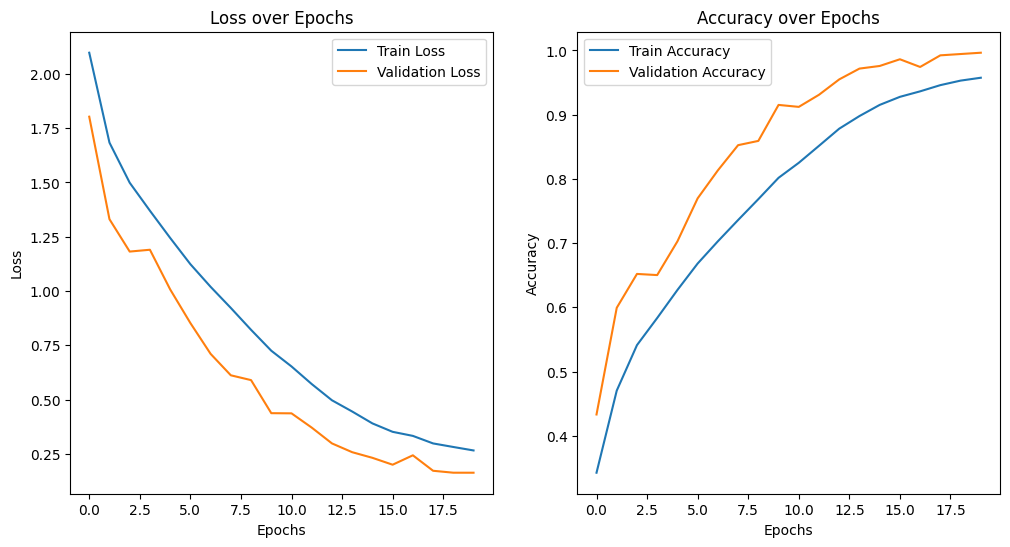

In [ ]:
import matplotlib.pyplot as plt

# Graficar la pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 6))

# Pérdida de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


##Variables separables

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Construcción del modelo con los hiperparámetros sugeridos y convoluciones separables
model = Sequential([
    layers.Input(shape=(64, 64, 3)),

    # Primera capa convolucional separable
    layers.SeparableConv2D(112, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Segunda capa convolucional separable
    layers.SeparableConv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Tercera capa convolucional separable
    layers.SeparableConv2D(448, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Capa de Flatten
    layers.Flatten(),

    # Primera capa densa
    layers.Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l2(9.276619228759568e-05)),
    layers.Dropout(0.30460042455187464),

    # Segunda capa densa
    layers.Dense(160, activation='relu',
                 kernel_regularizer=regularizers.l2(9.276619228759568e-05)),
    layers.Dropout(0.30460042455187464),

    # Capa de salida
    layers.Dense(10, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5.764804762892899e-05),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Configurar callbacks para guardar el mejor modelo y detener temprano
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
earlystop = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=10, verbose=1)

# Entrenamiento del modelo
history = model.fit(
    train_dataset, validation_data=val_dataset, epochs=20,
    callbacks=[checkpoint, earlystop], verbose=1
)


Epoch 1/20
    573/Unknown 148s 243ms/step - accuracy: 0.2546 - loss: 2.3800
Epoch 1: val_loss improved from inf to 2.28840, saving model to best_model.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 159s 263ms/step - accuracy: 0.2546 - loss: 2.3796 - val_accuracy: 0.3090 - val_loss: 2.2884
Epoch 2/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.4038 - loss: 1.8641
Epoch 2: val_loss improved from 2.28840 to 1.47630, saving model to best_model.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 158s 266ms/step - accuracy: 0.4038 - loss: 1.8640 - val_accuracy: 0.5390 - val_loss: 1.4763
Epoch 3/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.4775 - loss: 1.6393
Epoch 3: val_loss improved from 1.47630 to 1.33498, saving model to best_model.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 153s 259ms/step - accuracy: 0.4775 - loss: 1.6393 - val_accuracy: 0.5797 - val_loss: 1.3350
Epoch 4/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.5286 - loss: 1.4922
Epoch 4: val_loss improved from 1.33498 to 1.

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9951 - loss: 0.1643
Test loss: 0.1640365570783615
Test accuracy: 0.9951629042625427


In [ ]:
# Guardar el modelo completo (arquitectura y pesos)
model.save('final_model_consepara.keras')

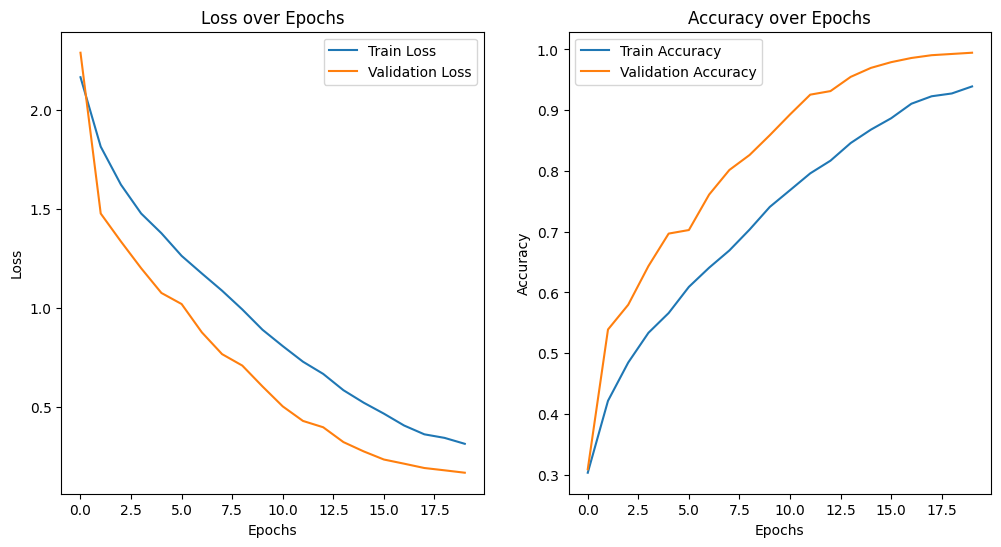

In [ ]:
import matplotlib.pyplot as plt

# Graficar la pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 6))

# Pérdida de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


##Variables separables con valores de optuna

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Construcción del modelo con los hiperparámetros sugeridos y convoluciones separables
model = Sequential([
    layers.Input(shape=(64, 64, 3)),

    # Primera capa convolucional separable
    layers.SeparableConv2D(48, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Segunda capa convolucional separable
    layers.SeparableConv2D(96, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Tercera capa convolucional separable
    layers.SeparableConv2D(512, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Capa de Flatten
    layers.Flatten(),

    # Primera capa densa
    layers.Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l2(1.5673678153872976e-05)),
    layers.Dropout(0.39194740374803294),

    # Segunda capa densa
    layers.Dense(160, activation='relu',
                 kernel_regularizer=regularizers.l2(9.276619228759568e-05)),
    layers.Dropout(0.39194740374803294),

    # Capa de salida
    layers.Dense(10, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00012216588809486765),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Configurar callbacks para guardar el mejor modelo y detener temprano
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
earlystop = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=10, verbose=1)

# Entrenamiento del modelo
history = model.fit(
    train_dataset, validation_data=val_dataset, epochs=20,
    callbacks=[checkpoint, earlystop], verbose=1
)


Epoch 1/20
    573/Unknown 72s 113ms/step - accuracy: 0.2321 - loss: 2.5058

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: val_loss improved from inf to 4.55218, saving model to best_model.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 80s 127ms/step - accuracy: 0.2322 - loss: 2.5053 - val_accuracy: 0.1979 - val_loss: 4.5522
Epoch 2/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.3726 - loss: 1.8637
Epoch 2: val_loss improved from 4.55218 to 1.42269, saving model to best_model.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 76s 124ms/step - accuracy: 0.3727 - loss: 1.8636 - val_accuracy: 0.5380 - val_loss: 1.4227
Epoch 3/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4457 - loss: 1.6371
Epoch 3: val_loss improved from 1.42269 to 1.32087, saving model to best_model.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 76s 125ms/step - accuracy: 0.4457 - loss: 1.6371 - val_accuracy: 0.5642 - val_loss: 1.3209
Epoch 4/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5180 - loss: 1.4537
Epoch 4: val_loss improved from 1.32087 to 1.16844, saving model to best_model.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 77s 125ms/

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

In [ ]:
# Guardar el modelo completo (arquitectura y pesos)
model.save('final_model_sepa2.keras')

In [ ]:
import matplotlib.pyplot as plt

# Graficar la pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 6))

# Pérdida de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
